# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

## Data Overview

- Observations
- Sanity checks

**1. Preview at the first few rows of the dataset**

In [ ]:
# Preview the first 5 rows of the dataset
display(df.head())

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

**2. Dataset Information (info)**

In [ ]:
# Get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**3. Summary Statistics (describe)**

In [ ]:
# Get summary statistics for numerical columns
display(df.describe())

Current Price  Price Change  Volatility         ROE  Cash Ratio  \
count     340.000000    340.000000  340.000000  340.000000  340.000000   
mean       80.862345      4.078194    1.525976   39.597059   70.023529   
std        98.055086     12.006338    0.591798   96.547538   90.421331   
min         4.500000    -47.129693    0.733163    1.000000    0.000000   
25%        38.555000     -0.939484    1.134878    9.750000   18.000000   
50%        59.705000      4.819505    1.385593   15.000000   47.000000   
75%        92.880001     10.695493    1.695549   27.000000   99.000000   
max      1274.949951     55.051683    4.580042  917.000000  958.000000   

       Net Cash Flow    Net Income  Earnings Per Share  \
count   3.400000e+02  3.400000e+02          340.000000   
mean    5.553762e+07  1.494385e+09            2.776662   
std     1.946365e+09  3.940150e+09            6.587779   
min    -1.120800e+10 -2.352800e+10          -61.200000   
25%    -1.939065e+08  3.523012e+08            1.557500   
50%     2.098000e+06  7.073360e+08            2.895000   
75%     1.698108e+08  1.899000e+09            4.620000   
max     2.076400e+10  2.444200e+10           50.090000   

       Estimated Shares Outstanding   P/E Ratio   P/B Ratio  
count                  3.400000e+02  340.000000  340.000000  
mean                   5.770283e+08   32.612563   -1.718249  
std                    8.458496e+08   44.348731   13.966912  
min                    2.767216e+07    2.935451  -76.119077  
25%                    1.588482e+08   15.044653   -4.352056  
50%                    3.096751e+08   20.819876   -1.067170  
75%                    5.731175e+08   31.764755    3.917066  
max                    6.159292e+09  528.039074  129.064585

**4. Duplicate Check**

In [ ]:
# Check for duplicate rows
duplicate_check = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_check}")

Number of duplicate rows: 0


**5. Missing Value Check**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Print missing values count
if missing_values.sum() == 0:
    print("No missing values in the dataset.")
else:
    print("Missing values in each column:\n", missing_values)

No missing values in the dataset.


**6. Data Type Check**

In [ ]:
# Check data types of each column
data_types = df.dtypes
print("Data types of each column:\n", data_types)

Data types of each column:
 Ticker Symbol                    object
Security                         object
GICS Sector                      object
GICS Sub Industry                object
Current Price                   float64
Price Change                    float64
Volatility                      float64
ROE                               int64
Cash Ratio                        int64
Net Cash Flow                     int64
Net Income                        int64
Earnings Per Share              float64
Estimated Shares Outstanding    float64
P/E Ratio                       float64
P/B Ratio                       float64
dtype: object


**7. Unique Value Check (for Categorical Columns)**

In [ ]:
# Check unique values in categorical columns and return the count of unique values
for col in df.select_dtypes(include='object').columns:
    unique_value_count = df[col].nunique()
    print(f"Column: {col} | Unique Values Count: {unique_value_count}")


Column: Ticker Symbol | Unique Values Count: 340
Column: Security | Unique Values Count: 340
Column: GICS Sector | Unique Values Count: 11
Column: GICS Sub Industry | Unique Values Count: 104


**8. Outlier Check**

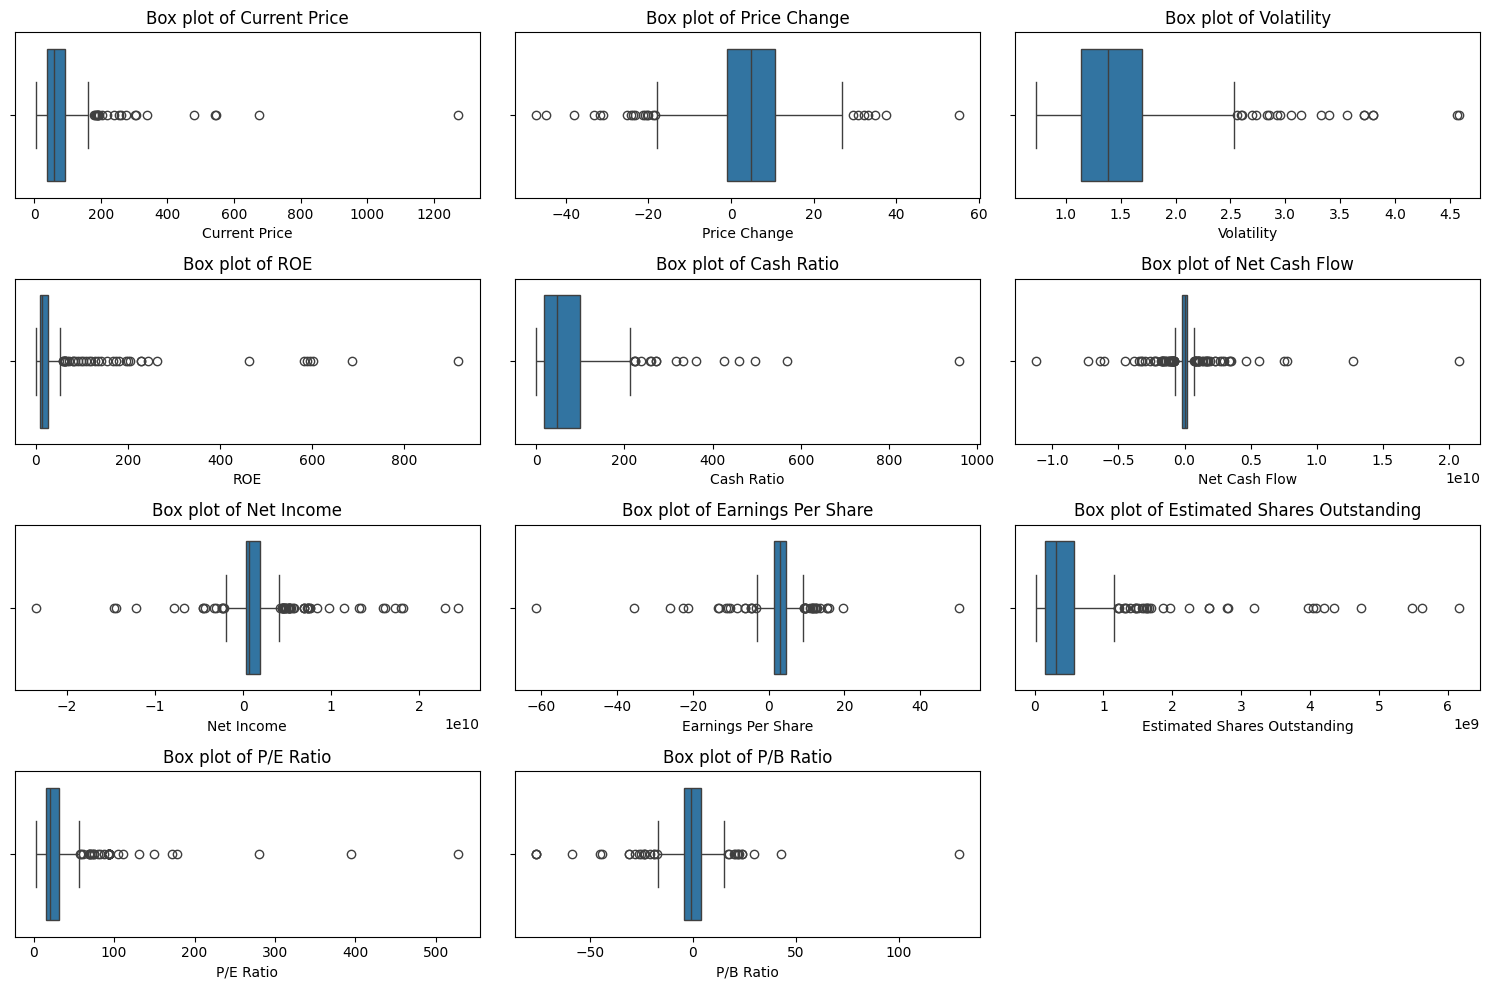

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Visualize outliers using box plots for numerical columns
numeric_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
                   'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding',
                   'P/E Ratio', 'P/B Ratio']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


**Observation**

The box plots show the presence of outliers in several columns, but since outliers can sometimes represent significant data points, we'll proceed cautiously.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**EDA Univariate analysis**

1. Distribution of Numerical Variables

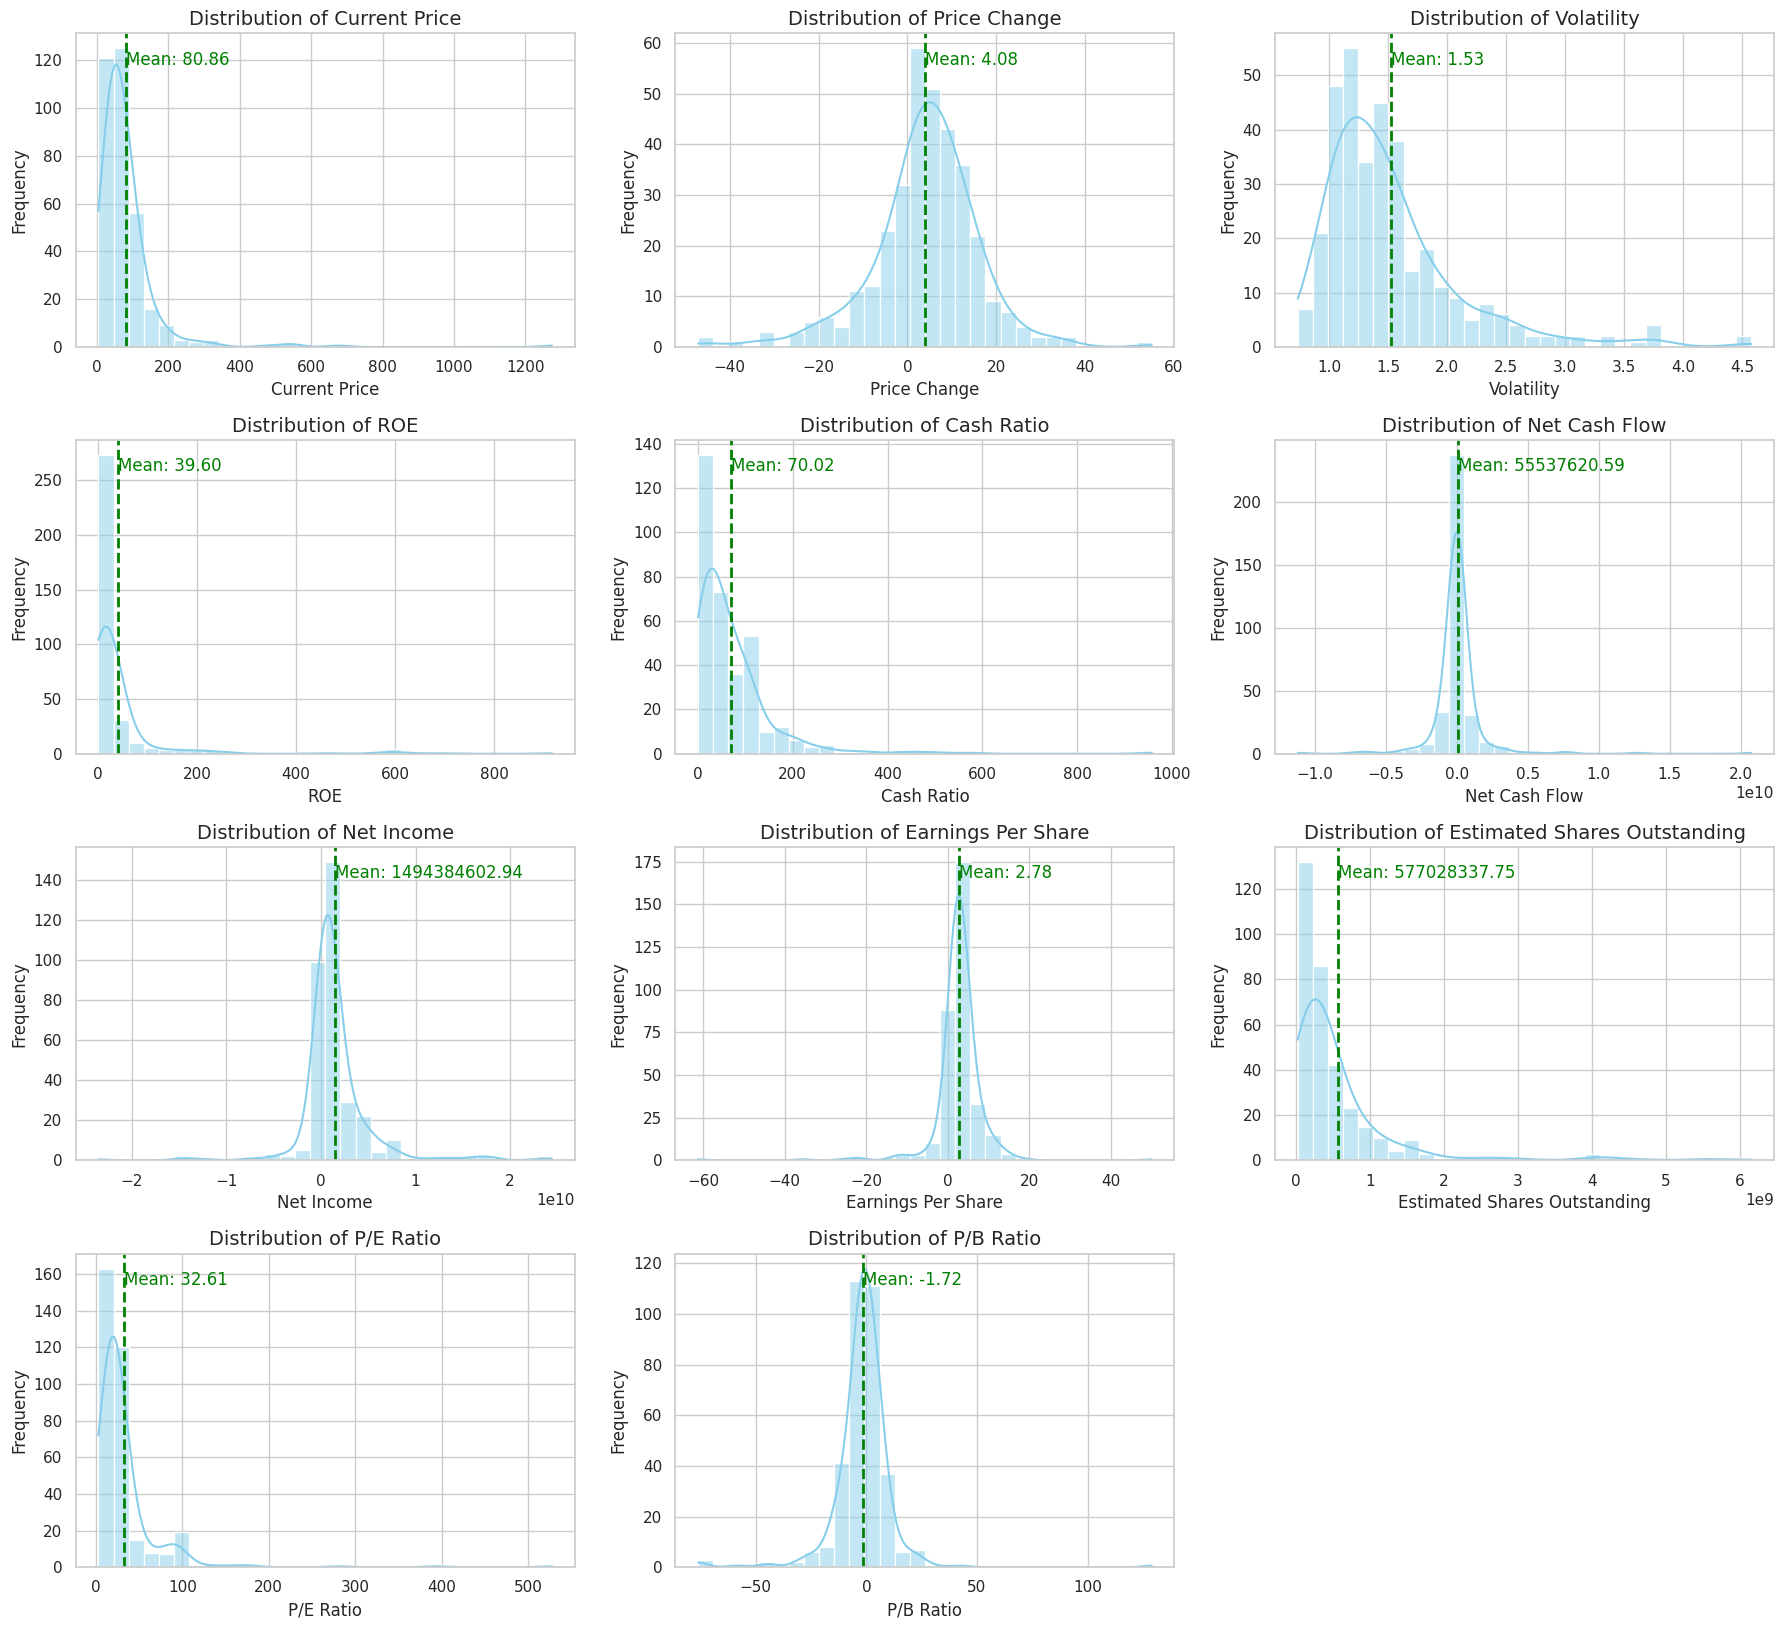

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Automatically fetch the numeric columns
numerical_features = df.select_dtypes(include='number').columns

# Create a 5x3 grid for the subplots
fig, axes = plt.subplots(5, 3, figsize=(18, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot distribution for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue', ax=axes[i])

    # Plot the mean line
    mean_value = df[feature].mean()
    axes[i].axvline(mean_value, color='green', linestyle='dashed', linewidth=2)

    # Add title and labels
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

    # Display the mean value on the plot
    axes[i].text(mean_value, axes[i].get_ylim()[1]*0.9, f'Mean: {mean_value:.2f}',
                 color='green', fontsize=12)

# Remove any empty subplots (if there are fewer than 15 features)
for i in range(len(numerical_features), 15):
    fig.delaxes(axes[i])

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


**Observation**
From the above we can make the following obsrvation just to mention a few

* The distribution of Current Price has a mean of 80.86 and is left-skewed, indicating that most stock prices are concentrated on the higher end, with fewer stocks having extremely low prices.
* The distribution of Price Change has a mean of 4.08 and is normally distributed, suggesting that price changes across stocks are symmetrically distributed around the mean.
* The distribution of Volatility has a mean of 1.53 and is left-skewed, implying that most stocks have low volatility, with a few having significantly lower volatility values.
* The distribution of ROE (Return on Equity) is also left-skewed with a mean of 39.60, meaning that while most companies exhibit higher ROE values, some have very low returns.
* The distribution of Cash Ratio is left-skewed with a mean of 70, which shows that while many companies have higher cash ratios, some companies are outliers with much lower ratios.
* The distribution of Net Cash Flow is normally distributed, indicating a balanced range of net cash flow values across the companies in the dataset.

**2. Box Plots for Numerical Variables**

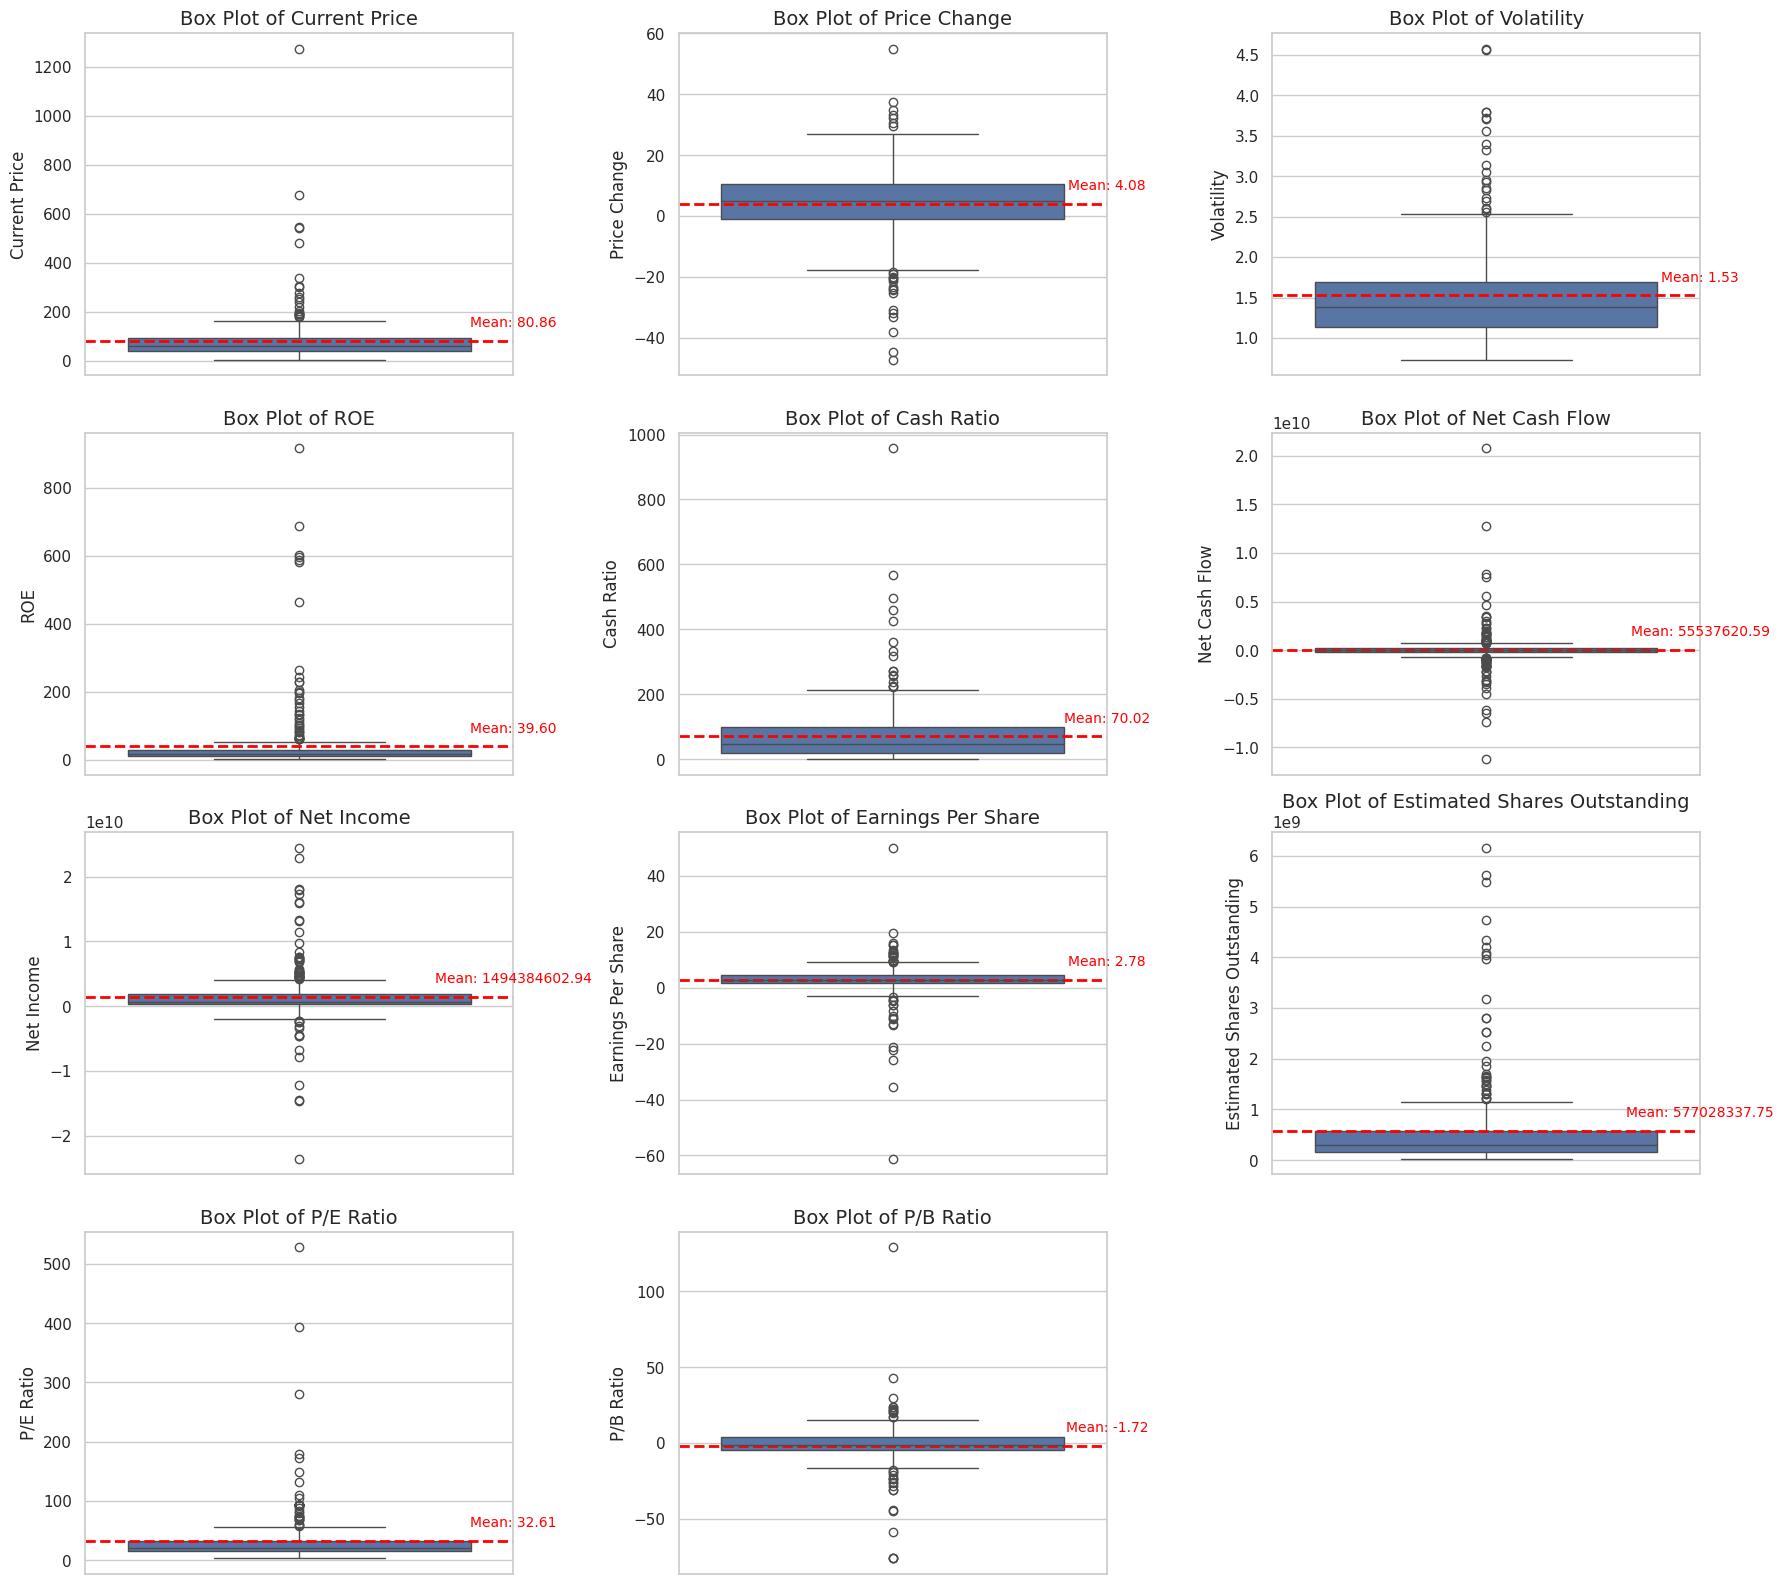

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Automatically fetch the numeric columns
numerical_features = df.select_dtypes(include='number').columns

# Create a 5x3 grid for the subplots (total of 15 subplots)
fig, axes = plt.subplots(5, 3, figsize=(18, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot box plots for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, y=feature, ax=axes[i])

    # Calculate the mean of the feature
    mean_val = df[feature].mean()

    # Add a mean line to the boxplot
    axes[i].axhline(mean_val, color='red', linestyle='--', linewidth=2)

    # Annotate the mean value
    axes[i].annotate(f'Mean: {mean_val:.2f}', xy=(0.5, mean_val), xycoords='data',
                     xytext=(0, 10), textcoords='offset points', color='red',
                     ha='center', fontsize=10)

    axes[i].set_title(f'Box Plot of {feature}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(feature, fontsize=12)

# Remove any empty subplots (if the number of numerical features is less than 15)
for i in range(len(numerical_features), 15):
    fig.delaxes(axes[i])

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


**Observation**
From the box plots of the numerical variables we can observe the presence of outliers.

**3. Distribution of Categorical Variables**

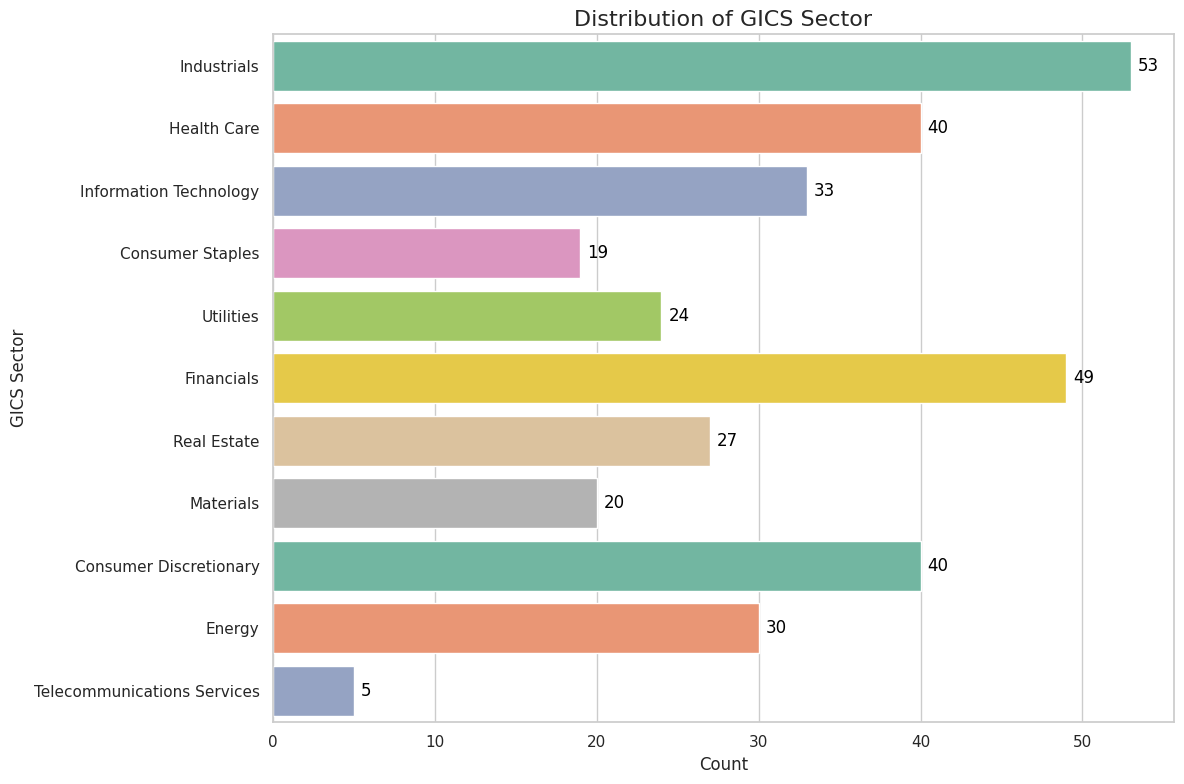

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# List of categorical features
categorical_features = ['GICS Sector']

# Plot count plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(12, 8))

    # Create the countplot
    ax = sns.countplot(y=df[feature], palette='Set2')

    # Add counts on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.0f}',  # Display count (width of bar)
                    (p.get_width(), p.get_y() + p.get_height() / 2),  # Position the text
                    ha='left', va='center', fontsize=12, color='black', xytext=(5, 0),
                    textcoords='offset points')  # Adjust the text offset slightly

    # Set titles and labels
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(feature, fontsize=12)

    # Ensure a clean layout
    plt.tight_layout()
    plt.show()


**Observation**

From the distribution of GICS Sector, I observed that the sector with the majority of sub-sectors is Industrial, which contains 53 sub-sectors. This is followed by the Financial sector, which has 49 sub-sectors, and the Health Care sector, which has 40 sub-sectors. These insights highlight the Industrial sector as having the most diverse range of sub-sectors in the dataset.

**4. Pair Plots for Selected Numerical Features**


**EDA Bivariate analysis**

1. Scatter Plots for Numerical Variables

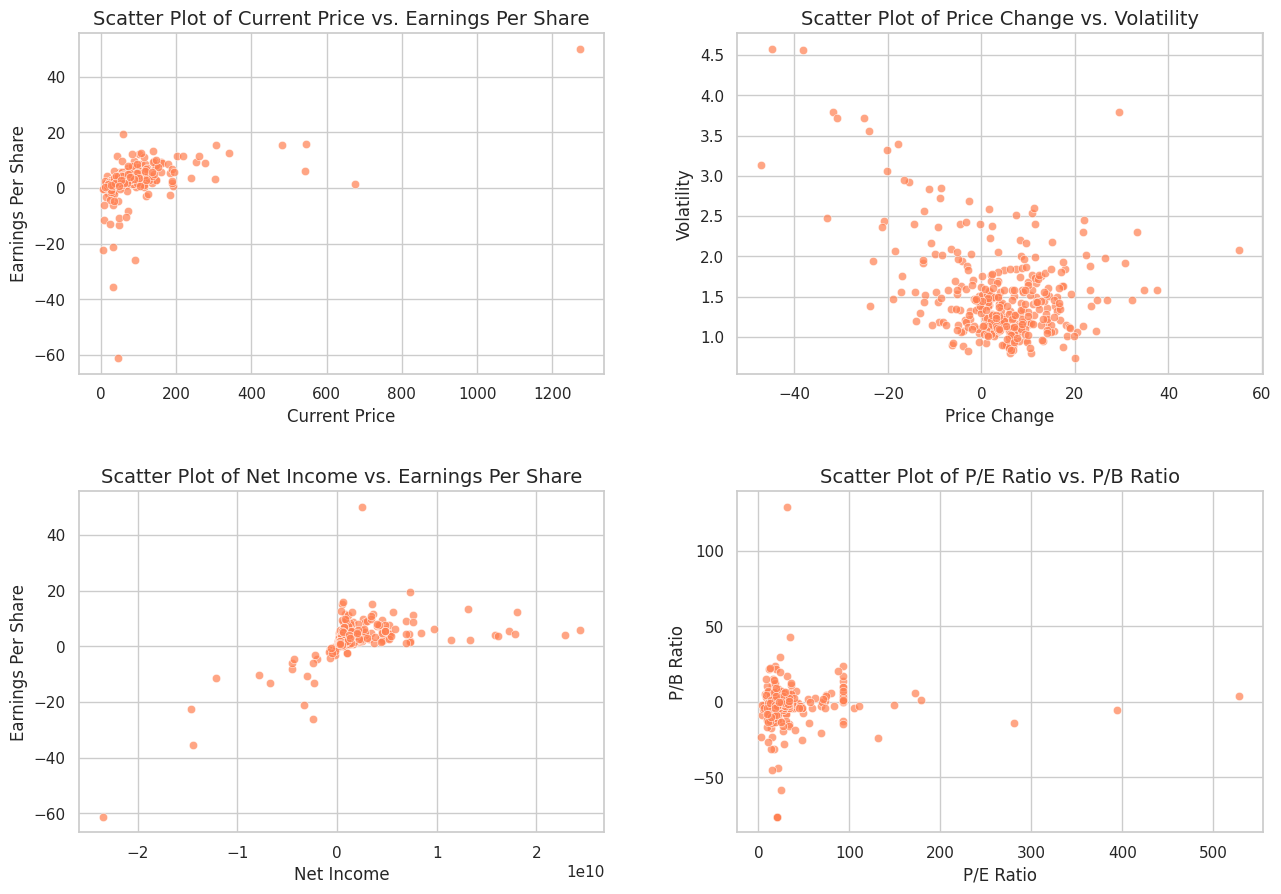

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# List of pairs of numerical features for scatter plots
numerical_pairs = [
    ('Current Price', 'Earnings Per Share'),
    ('Price Change', 'Volatility'),
    ('Net Income', 'Earnings Per Share'),
    ('P/E Ratio', 'P/B Ratio')
]

# Create a 2x2 subplot grid (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjust figsize to fit 2x2 grid
fig.tight_layout(pad=5.0)  # Adjust spacing between plots

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot scatter plots for each pair
for i, (x, y) in enumerate(numerical_pairs):
    sns.scatterplot(data=df, x=x, y=y, color='coral', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {x} vs. {y}', fontsize=14)
    axes[i].set_xlabel(x, fontsize=12)
    axes[i].set_ylabel(y, fontsize=12)

# Show the entire figure
plt.show()


**Observation**

based on the Scatter Plots for Numerical Variables we can see various clustreing some with very few datapoints

**2. Correlation Heatmap**

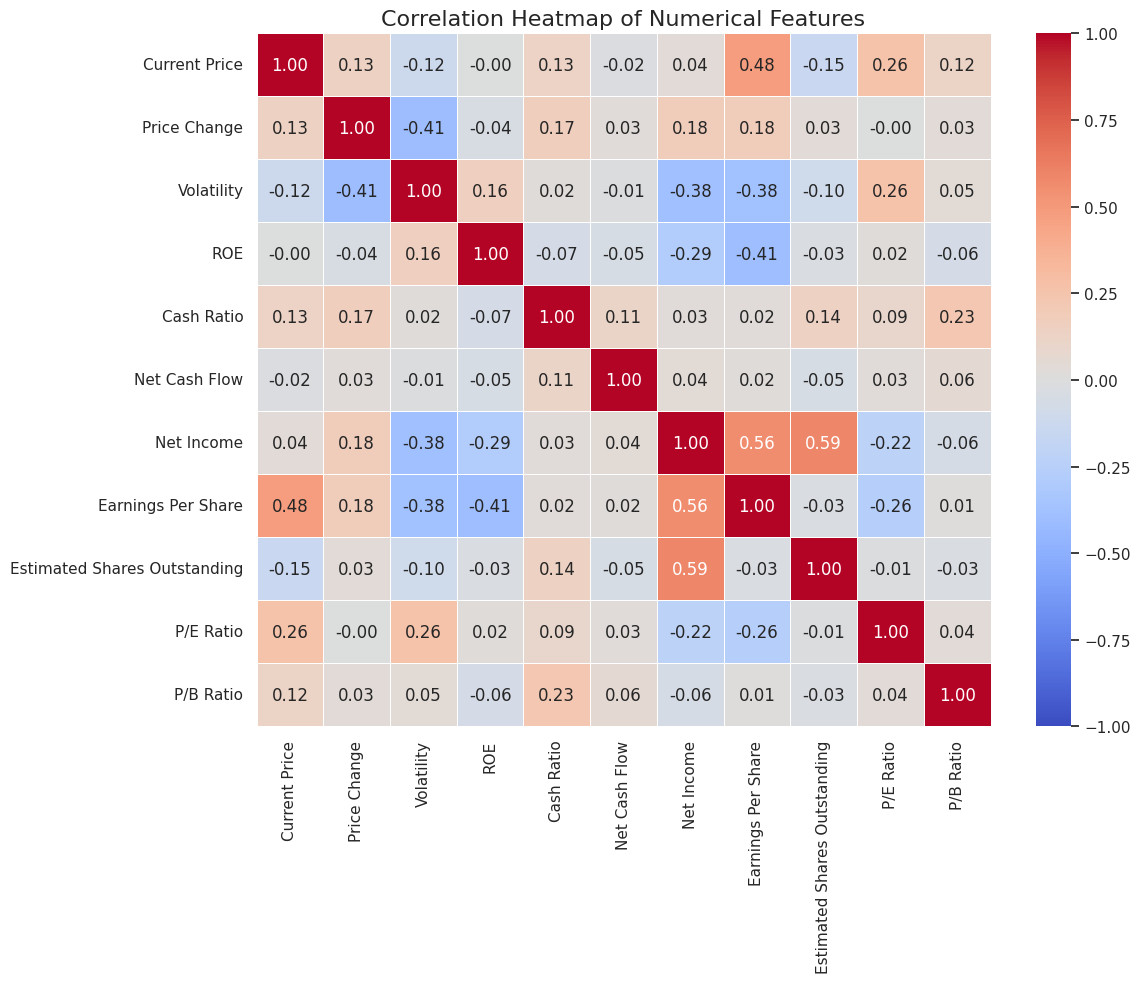

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Compute the correlation matrix
corr_matrix = df[['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
                   'Net Cash Flow', 'Net Income', 'Earnings Per Share',
                   'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


**3. Box Plots by Category**

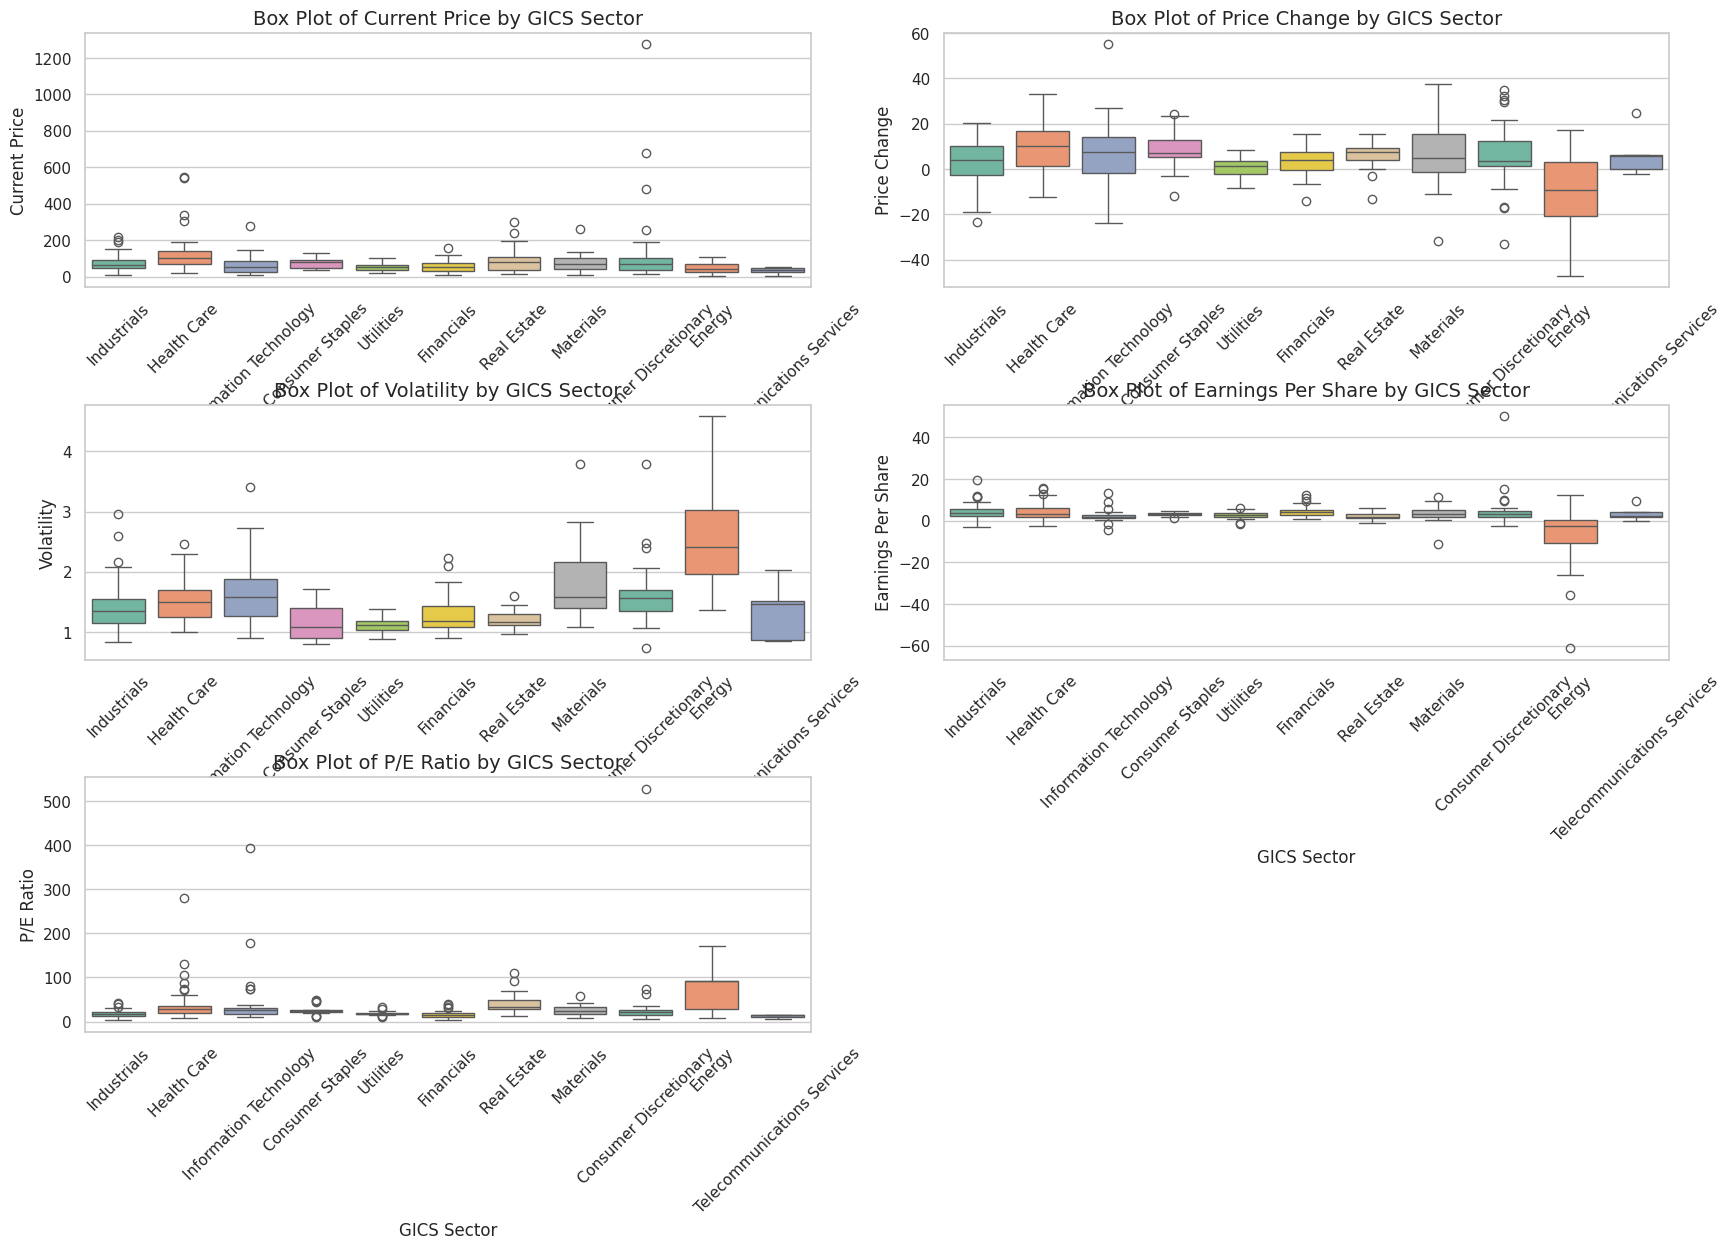

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# List of numerical features to compare by GICS Sector
numerical_features = ['Current Price', 'Price Change', 'Volatility', 'Earnings Per Share', 'P/E Ratio']

# Create a 3x2 subplot grid (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(18, 12))  # Adjust the figure size for a 3x2 grid
fig.tight_layout(pad=5.0)  # Adjust spacing between plots

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot box plots for each numerical feature by GICS Sector
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='GICS Sector', y=feature, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} by GICS Sector', fontsize=14)
    axes[i].set_xlabel('GICS Sector', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# If there are fewer plots than subplots, turn off the remaining axes
if len(numerical_features) < len(axes):
    for j in range(len(numerical_features), len(axes)):
        fig.delaxes(axes[j])

# Show the entire figure
plt.show()


**4. Pair Plots for Selected Numerical Features**

<Figure size 1200x1000 with 0 Axes>

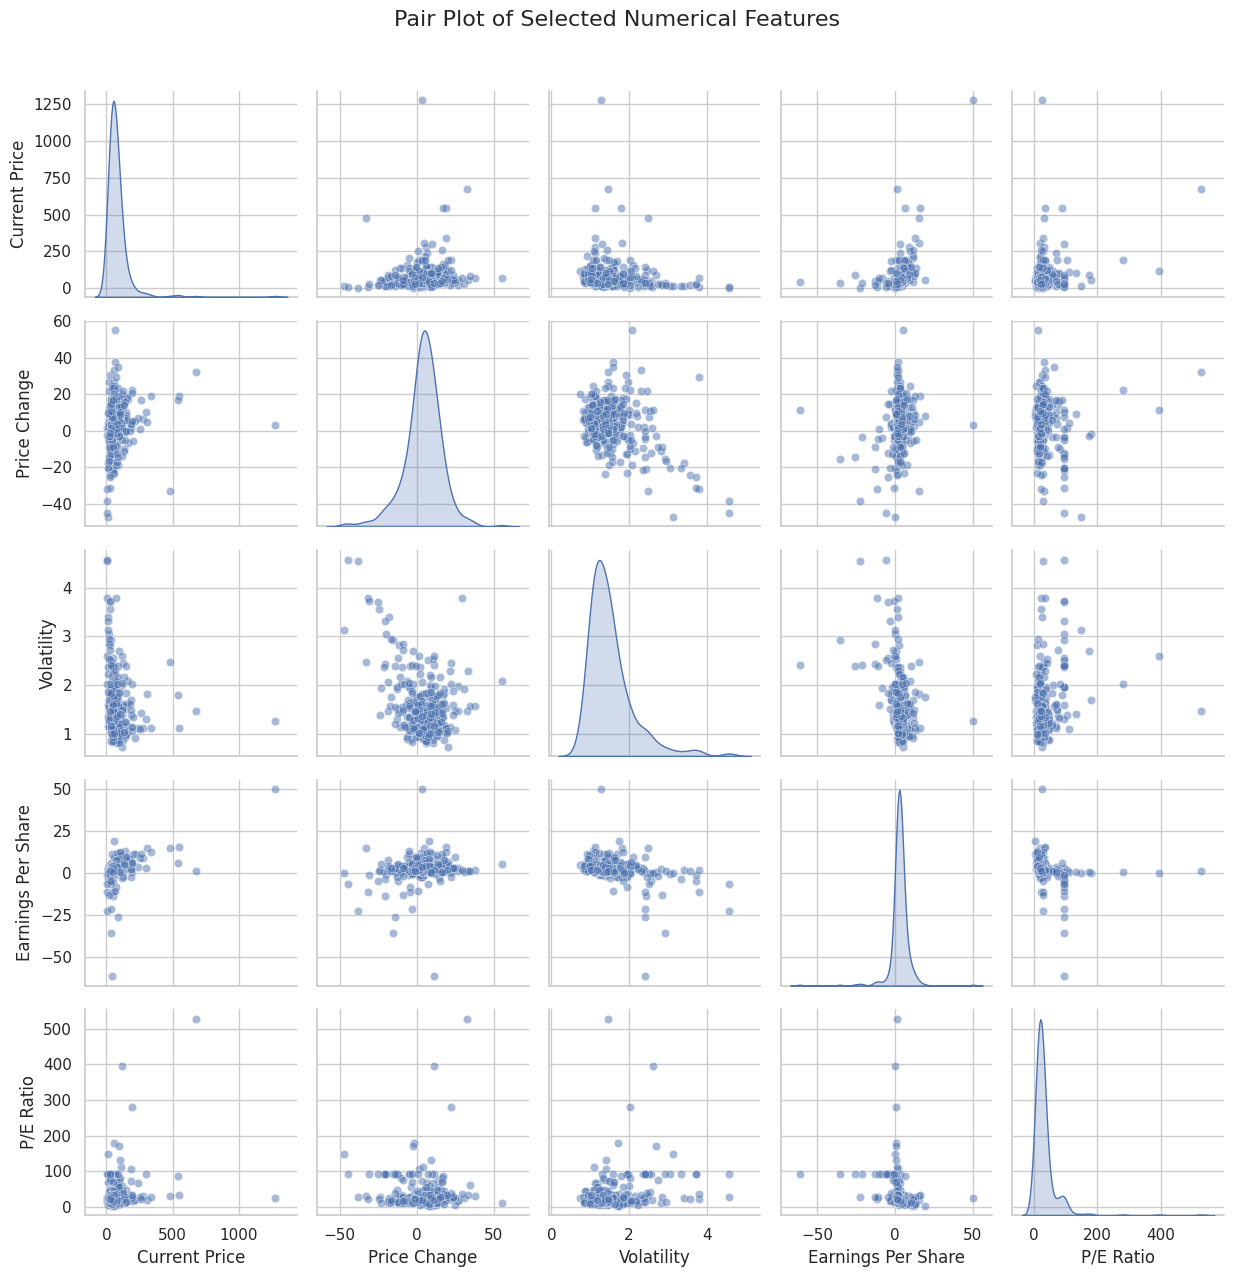

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# List of selected numerical features for pair plot
subset_numerical_features = ['Current Price', 'Price Change', 'Volatility',
                              'Earnings Per Share', 'P/E Ratio']

# Plot pair plots for selected numerical features
plt.figure(figsize=(12, 10))
sns.pairplot(df[subset_numerical_features], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Selected Numerical Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


**Observation**

From the Pair Plots for selected numerical features, I observed that the data points for Current Price, Price Change, Volatility, Earnings Per Share, and P/E Ratio suggest the presence of three to four clusters. This indicates potential groupings within the data, where similar patterns or relationships emerge across these financial metrics, suggesting distinct market behaviors or stock characteristics across the clusters.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

**Question 1: What does the distribution of stock prices look like?**

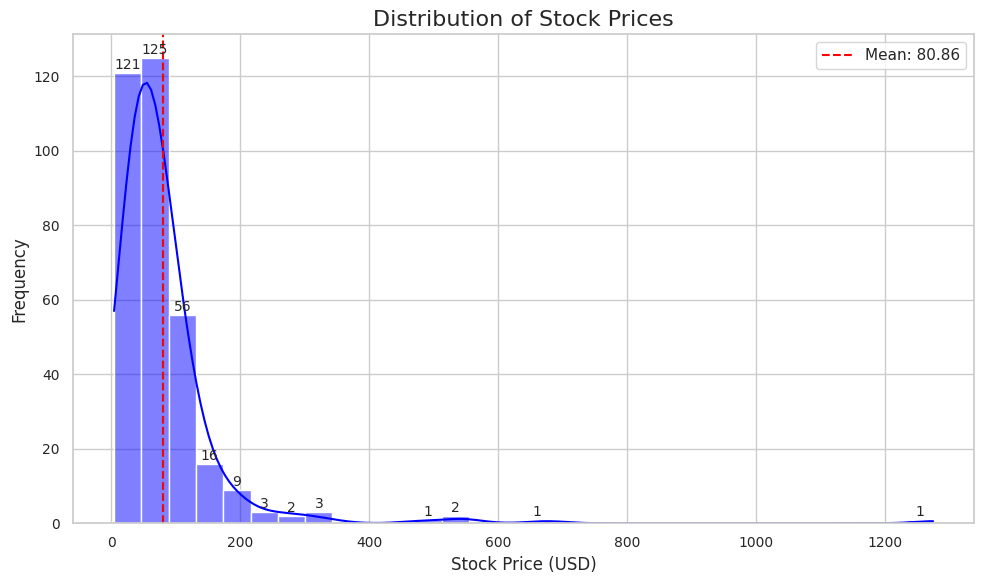

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10,6))

# Plot the distribution of 'Current Price' using seaborn's histplot
ax = sns.histplot(df['Current Price'], kde=True, bins=30, color='blue')

# Add counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height),
                ha="center", fontsize=10)

# Calculate and add mean line
mean_price = df['Current Price'].mean()
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price:.2f}')

# Add title and labels
plt.title('Distribution of Stock Prices', fontsize=16)
plt.xlabel('Stock Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Format the plot for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add legend for the mean line
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


**Observation on Distribution of Stock Prices**

**Distribution Characteristics:**

The distribution of stock prices exhibits the following characteristics:

1. **Left Skewness**:
   The distribution shows a left skew, indicating that the majority of stock prices are concentrated towards the lower end of the range. This suggests that while many stocks have relatively lower prices, there are fewer stocks with significantly higher prices.

2. **Frequency Peaks**:
   - **Primary Peak**: The highest frequency of stock prices is observed around 140 dollars. This indicates that a large number of stocks are priced in this range, suggesting a common price point within the dataset.
   - **Secondary Peaks**: There is a noticeable but smaller peak around 580 dollars. This indicates that while less frequent, there are stocks with prices in this higher range.
   - **Tertiary Peak**: A very small peak at around 1250 dollars suggests that there are a few stocks with significantly higher prices, but these are relatively rare compared to the lower-priced stocks.

3. **Overall Distribution**:
   The histogram, along with the kernel density estimate (KDE), shows that most stock prices are below USD 200, with decreasing frequency as the price increases. The KDE line smooths out the distribution and confirms the left skewness, providing a clearer view of the density of stock prices across the range.

**Conclusion**:
The distribution analysis reveals that most stocks are priced lower, with a significant concentration around USD 140. Higher stock prices are less common but still present, particularly at around USD 580 and USD 1250. This distribution insight helps in understanding the general pricing landscape of the stocks within this dataset, suggesting a market where lower-priced stocks are more prevalent.


**Questions 2: The stocks of which economic sector have seen the maximum price increase on average?**

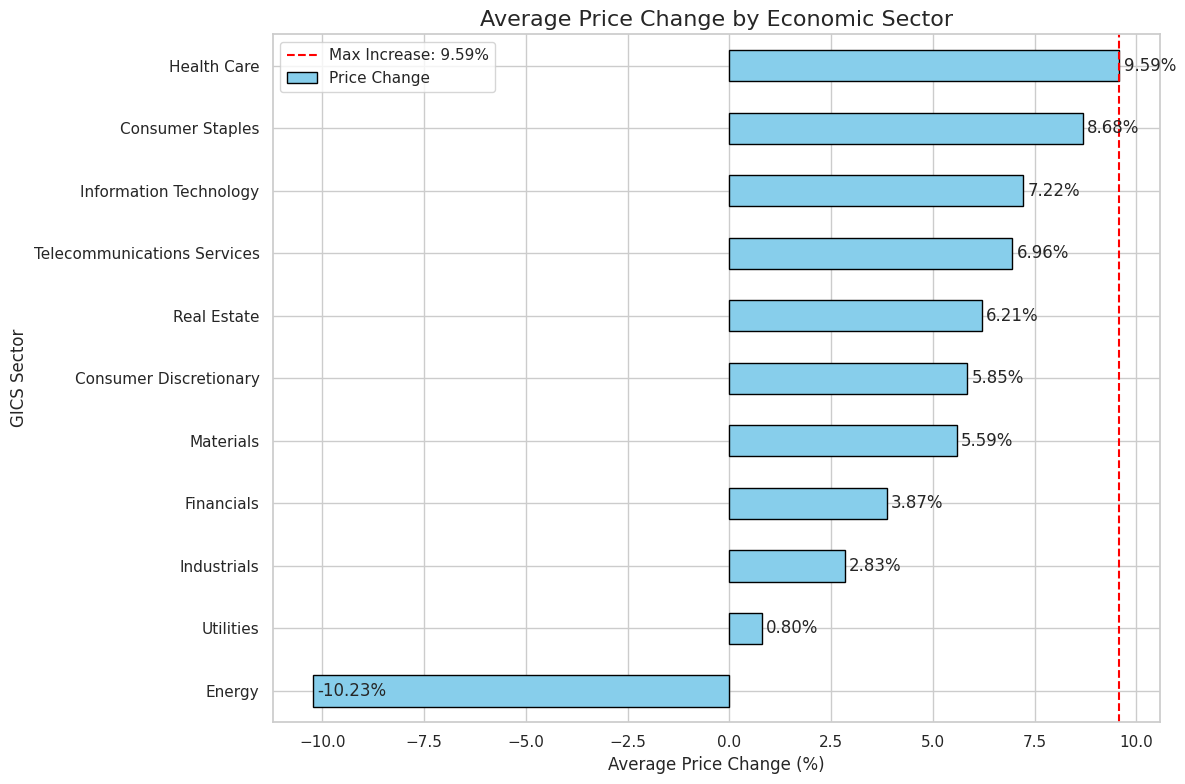


Average Price Change by Economic Sector:
                    GICS Sector  Average Price Change (%)
0        Consumer Discretionary                  5.846093
1              Consumer Staples                  8.684750
2                        Energy                -10.228289
3                    Financials                  3.865406
4                   Health Care                  9.585652
5                   Industrials                  2.833127
6        Information Technology                  7.217476
7                     Materials                  5.589738
8                   Real Estate                  6.205548
9   Telecommunications Services                  6.956980
10                    Utilities                  0.803657
The sector with the maximum average price increase is: Health Care
The average price increase in this sector is: 9.59%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Calculate the average price change by sector
sector_price_change = df.groupby('GICS Sector')['Price Change'].mean()

# Find the maximum price increase value
max_increase_value = sector_price_change.max()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plot a bar chart showing the average price change by sector
ax = sector_price_change.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Average Price Change by Economic Sector', fontsize=16)
plt.xlabel('Average Price Change (%)', fontsize=12)
plt.ylabel('GICS Sector', fontsize=12)

# Add percentage labels at the top of each bar
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}%', (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(3, 0), textcoords='offset points')

# Highlight the sector with the maximum increase
plt.axvline(x=max_increase_value, color='red', linestyle='--', label=f'Max Increase: {max_increase_value:.2f}%')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Create a table with the percentages
print("\nAverage Price Change by Economic Sector:")
print(sector_price_change.reset_index().rename(columns={'Price Change': 'Average Price Change (%)'}))

# Group the dataset by 'GICS Sector' and calculate the average price change for each sector
sector_price_change = df.groupby('GICS Sector')['Price Change'].mean()

# Find the sector with the maximum average price increase
max_increase_sector = sector_price_change.idxmax()
max_increase_value = sector_price_change.max()

# Display the results
print(f"The sector with the maximum average price increase is: {max_increase_sector}")
print(f"The average price increase in this sector is: {max_increase_value:.2f}%")



**Observations:**

1. **Health Care Sector**:
   - **Average Price Change**: 9.59%
   - **Insight**: The Health Care sector stands out with the highest average price increase of 9.59%. This indicates that, on average, stocks in this sector have experienced the most significant positive change in price over the evaluated period. This substantial increase suggests strong performance or positive market sentiment towards companies in the Health Care sector.

2. **Comparison with Other Sectors**:
   - **Consumer Staples**: With an average price change of 8.68%, this sector also shows a notable increase but is slightly lower than Health Care.
   - **Information Technology**: At 7.22%, this sector also shows a significant positive change, though not as high as Health Care.
   - **Telecommunications Services** and **Real Estate**: Both sectors show positive average price changes of approximately 6.96% and 6.21%, respectively, indicating strong performance but still below Health Care.
   - **Energy**: This sector is an outlier with a negative average price change of -10.23%, contrasting sharply with the positive trends seen in other sectors.

**Conclusion**:
The Health Care sector's leading position in average price increase reflects its strong market performance relative to other sectors. This sector's ability to achieve the highest average price increase highlights its resilience and potential for growth, making it a notable area of interest for investors seeking high returns.

**Questions 3: How are the different variables correlated with each other?**

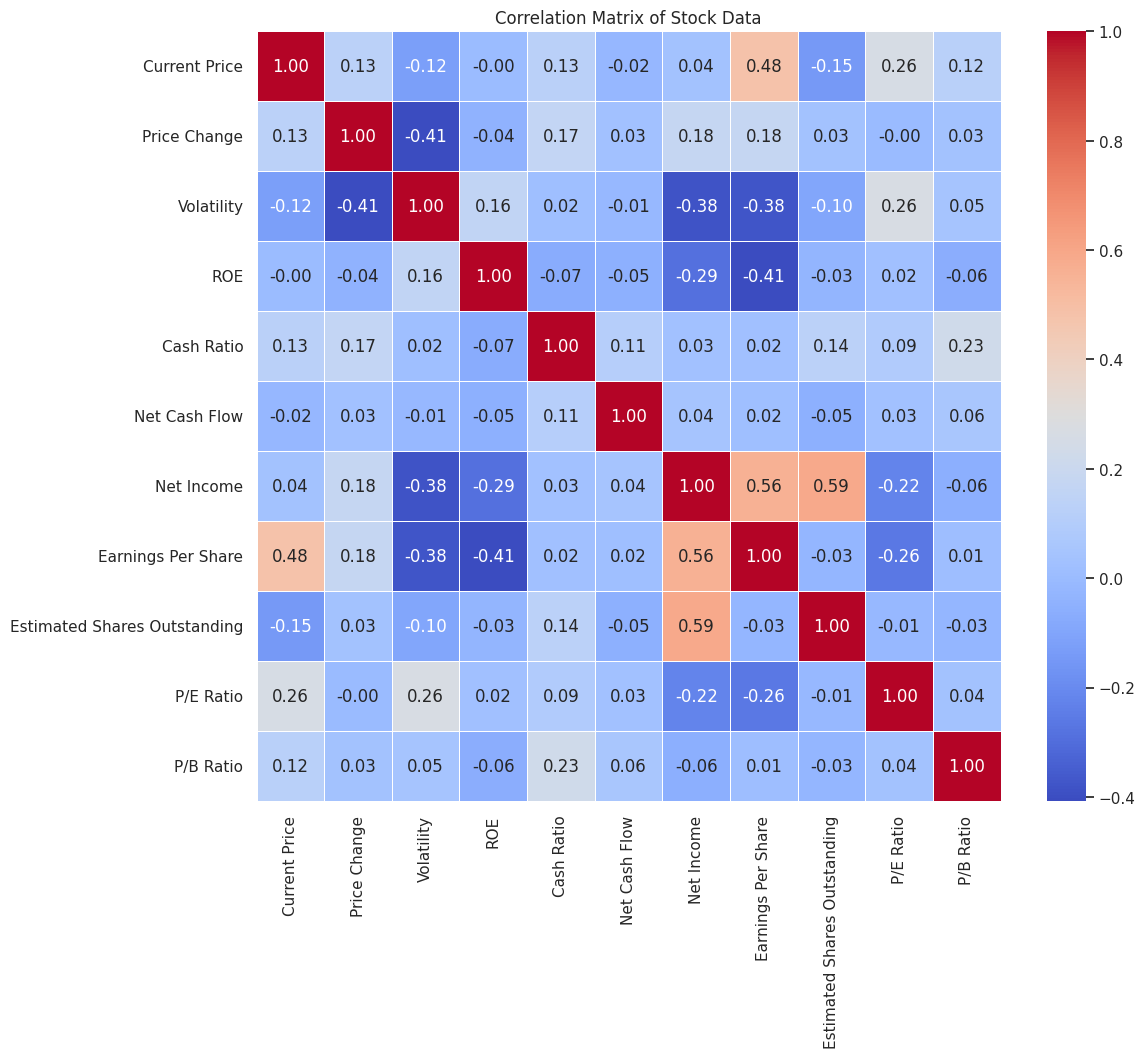

Strong Correlations (|r| >= 0.7):

Weak Correlations (0.3 <= |r| < 0.7):
  Current Price and Earnings Per Share: 0.48
  Price Change and Volatility: -0.41
  Volatility and Net Income: -0.38
  Volatility and Earnings Per Share: -0.38
  ROE and Earnings Per Share: -0.41
  Net Income and Earnings Per Share: 0.56
  Net Income and Estimated Shares Outstanding: 0.59


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Stock Data')

# Show the plot
plt.show()

# Interpret the correlation matrix
def interpret_correlation(correlation_matrix):
    # Define thresholds for strong and weak correlations
    strong_threshold = 0.7
    weak_threshold = 0.3

    # Get pairs of variables with strong correlations
    strong_corr = []
    weak_corr = []

    num_vars = correlation_matrix.shape[0]
    for i in range(num_vars):
        for j in range(i + 1, num_vars):
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]

            if abs(corr_value) >= strong_threshold:
                strong_corr.append((var1, var2, corr_value))
            elif abs(corr_value) >= weak_threshold:
                weak_corr.append((var1, var2, corr_value))

    print("Strong Correlations (|r| >= 0.7):")
    for var1, var2, value in strong_corr:
        print(f"  {var1} and {var2}: {value:.2f}")

    print("\nWeak Correlations (0.3 <= |r| < 0.7):")
    for var1, var2, value in weak_corr:
        print(f"  {var1} and {var2}: {value:.2f}")

# Call the function to interpret the correlation matrix
interpret_correlation(correlation_matrix)


**Observations on Correlation Analysis**

#### Strong Correlations (|r| >= 0.7):
In our dataset, no pairs of variables exhibit a strong linear relationship with a correlation coefficient of 0.7 or higher. This lack of strong correlations suggests that the variables do not exhibit extremely pronounced linear relationships with one another.

#### Weak Correlations (0.3 <= |r| < 0.7):

1. **Current Price and Earnings Per Share (EPS): 0.48**
   - **Observation**: There is a moderate positive correlation between the current price of a stock and its EPS. This indicates that stocks with higher EPS tend to have higher current prices, though the relationship is not very strong. This correlation supports the idea that profitability (as measured by EPS) has a positive impact on stock valuation.

2. **Price Change and Volatility: -0.41**
   - **Observation**: A moderate negative correlation is observed between the price change and volatility of stocks. This suggests that stocks which experience higher price changes may have lower volatility, or conversely, more volatile stocks might show smaller price changes. This relationship indicates some level of inverse association between price variability and price fluctuations over time.

3. **Volatility and Net Income: -0.38**
   - **Observation**: There is a moderate negative correlation between stock volatility and net income. This implies that higher net income tends to be associated with lower stock volatility. Companies with stable earnings might exhibit less volatility in their stock prices.

4. **Volatility and Earnings Per Share (EPS): -0.38**
   - **Observation**: The moderate negative correlation between volatility and EPS suggests that higher volatility is associated with lower EPS, or vice versa. This indicates that stocks with higher price fluctuations might have lower per-share earnings.

5. **Return on Equity (ROE) and EPS: -0.41**
   - **Observation**: A moderate negative correlation between ROE and EPS is observed. This relationship implies that as ROE increases, EPS tends to decrease. This could suggest an inverse relationship where higher efficiency in generating returns might not always align with higher earnings per share.

6. **Net Income and EPS: 0.56**
   - **Observation**: There is a moderate positive correlation between net income and EPS. This indicates that as net income increases, EPS also tends to increase. This direct relationship highlights that higher profitability directly affects the earnings reported per share.

7. **Net Income and Estimated Shares Outstanding: 0.59**
   - **Observation**: A moderate positive correlation is found between net income and estimated shares outstanding. This suggests that companies with higher net income may have more shares outstanding, which could reflect decisions related to share issuance or other capital management strategies.

### Summary
The correlation analysis reveals several moderate relationships between financial metrics. Positive correlations are seen between current price and EPS, net income and EPS, and net income and estimated shares outstanding. In contrast, negative correlations are observed between price change and volatility, volatility and net income, volatility and EPS, and ROE and EPS. These insights provide a nuanced understanding of how different financial indicators relate to each other and can inform decisions related to stock selection and portfolio management.


**Questions 4: Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

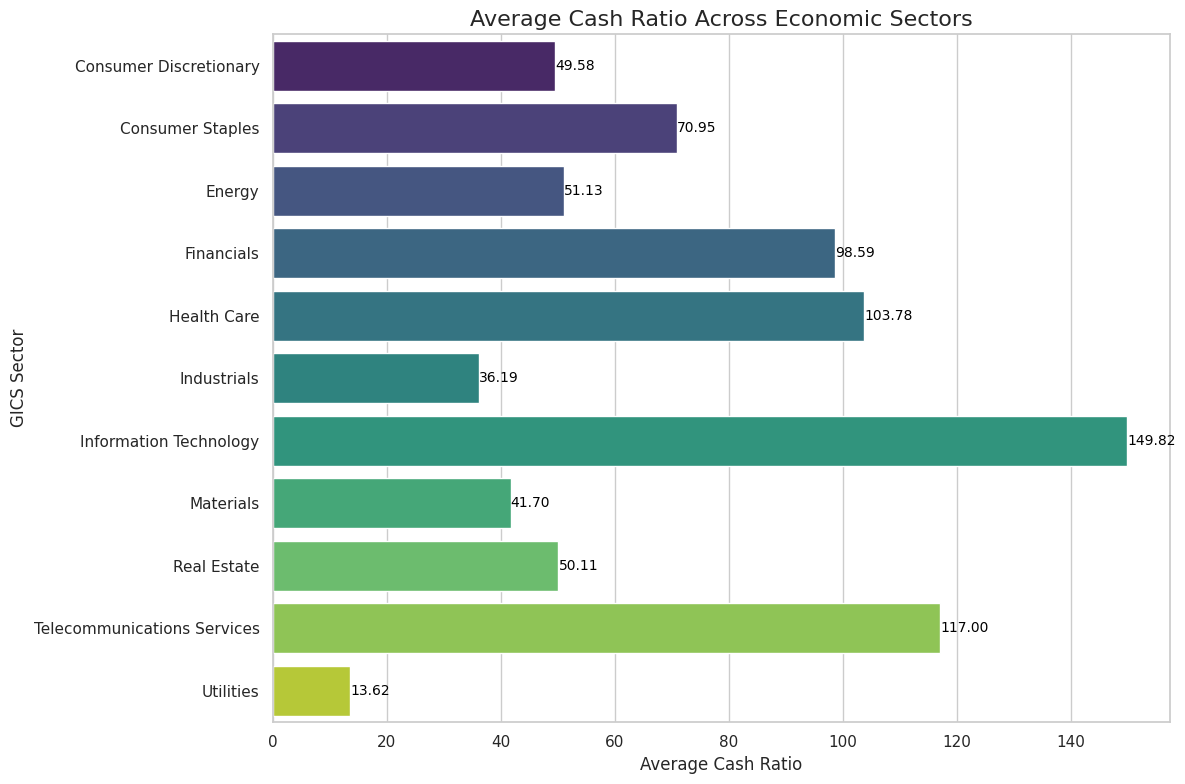

Average Cash Ratio by Economic Sector:
                    GICS Sector  Cash Ratio
0        Consumer Discretionary   49.575000
1              Consumer Staples   70.947368
2                        Energy   51.133333
3                    Financials   98.591837
4                   Health Care  103.775000
5                   Industrials   36.188679
6        Information Technology  149.818182
7                     Materials   41.700000
8                   Real Estate   50.111111
9   Telecommunications Services  117.000000
10                    Utilities   13.625000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Group by GICS Sector and calculate the average cash ratio
sector_cash_ratio = df.groupby('GICS Sector')['Cash Ratio'].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot of average cash ratio across economic sectors
ax = sns.barplot(x='Cash Ratio', y='GICS Sector', data=sector_cash_ratio, palette='viridis')

# Add title and labels
plt.title('Average Cash Ratio Across Economic Sectors', fontsize=16)
plt.xlabel('Average Cash Ratio', fontsize=12)
plt.ylabel('GICS Sector', fontsize=12)

# Add counts (cash ratio values) on top of the bars
for index, value in enumerate(sector_cash_ratio['Cash Ratio']):
    ax.text(value + 0.01, index, f'{value:.2f}', va='center', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

# Print the average cash ratio for each sector
print("Average Cash Ratio by Economic Sector:")
print(sector_cash_ratio)


**Observations on Average Cash Ratio by Economic Sector**

**1. Consumer Discretionary: 49.58**
   - **Observation**: The average cash ratio for the Consumer Discretionary sector is relatively moderate. This suggests that companies in this sector have a decent ability to cover short-term obligations with their cash and cash equivalents, but not as high as some other sectors.

**2. Consumer Staples: 70.95**
   - **Observation**: Companies in the Consumer Staples sector have a higher average cash ratio compared to Consumer Discretionary. This indicates a stronger liquidity position, allowing these companies to better manage short-term obligations with their available cash.

**3. Energy: 51.13**
   - **Observation**: The average cash ratio in the Energy sector is similar to that of Consumer Discretionary. This suggests a comparable ability to cover short-term obligations, reflecting moderate liquidity among companies in this sector.

**4. Financials: 98.59**
   - **Observation**: The Financials sector exhibits a significantly higher average cash ratio. This high value reflects strong liquidity and a substantial capacity to meet short-term obligations, typical for financial institutions which often maintain high levels of liquid assets.

**5. Health Care: 103.78**
   - **Observation**: The Health Care sector has one of the highest average cash ratios. This indicates very strong liquidity, suggesting that companies in this sector are well-positioned to handle short-term financial needs, possibly due to stable revenue streams and significant cash reserves.

**6. Industrials: 36.19**
   - **Observation**: The Industrials sector has the lowest average cash ratio among the sectors analyzed. This lower value indicates relatively weaker liquidity, implying that companies in this sector may have less capacity to cover short-term obligations with cash.

**7. Information Technology: 149.82**
   - **Observation**: The Information Technology sector has the highest average cash ratio, which suggests exceptional liquidity. Companies in this sector have substantial cash reserves relative to their short-term obligations, likely due to high profitability and cash flows.

**8. Materials: 41.70**
   - **Observation**: The average cash ratio for the Materials sector is moderate. This indicates a reasonable ability to cover short-term obligations, though not as strong as some other sectors.

**9. Real Estate: 50.11**
   - **Observation**: Companies in the Real Estate sector have a moderate average cash ratio. This suggests a fair level of liquidity for covering short-term obligations, similar to the Energy and Consumer Discretionary sectors.

**10. Telecommunications Services: 117.00**
   - **Observation**: The Telecommunications Services sector has a high average cash ratio, indicating robust liquidity. This suggests that companies in this sector have a strong capacity to meet short-term obligations with their cash reserves.

**11. Utilities: 13.63**
   - **Observation**: The Utilities sector has the lowest average cash ratio. This low value indicates a weaker liquidity position, suggesting that companies in this sector may face more challenges in covering short-term obligations with their cash.

**Summary**

The analysis of the average cash ratio across different economic sectors reveals a diverse range of liquidity positions. The Information Technology and Health Care sectors stand out with the highest cash ratios, reflecting strong liquidity. In contrast, the Utilities and Industrials sectors show the lowest cash ratios, indicating relatively weaker liquidity. These variations highlight the different financial strategies and operational models across sectors, which can impact their ability to manage short-term financial obligations.


**Questions 5: P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

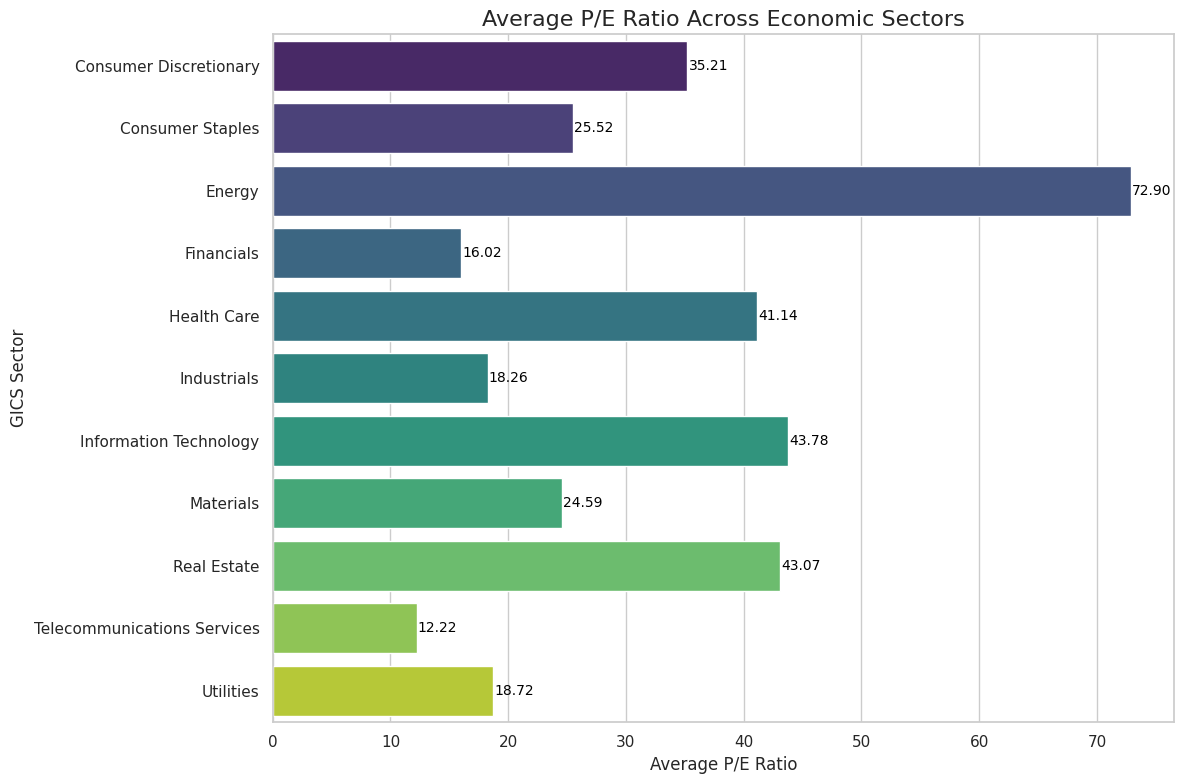

Average P/E Ratio by Economic Sector:
                    GICS Sector  P/E Ratio
0        Consumer Discretionary  35.211613
1              Consumer Staples  25.521195
2                        Energy  72.897709
3                    Financials  16.023151
4                   Health Care  41.135272
5                   Industrials  18.259380
6        Information Technology  43.782546
7                     Materials  24.585352
8                   Real Estate  43.065585
9   Telecommunications Services  12.222578
10                    Utilities  18.719412


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Group by GICS Sector and calculate the average P/E ratio
sector_pe_ratio = df.groupby('GICS Sector')['P/E Ratio'].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot of average P/E ratio across economic sectors
ax = sns.barplot(x='P/E Ratio', y='GICS Sector', data=sector_pe_ratio, palette='viridis')

# Add title and labels
plt.title('Average P/E Ratio Across Economic Sectors', fontsize=16)
plt.xlabel('Average P/E Ratio', fontsize=12)
plt.ylabel('GICS Sector', fontsize=12)

# Add counts (P/E ratio values) on top of the bars
for index, value in enumerate(sector_pe_ratio['P/E Ratio']):
    ax.text(value + 0.1, index, f'{value:.2f}', va='center', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

# Print the average P/E ratio for each sector
print("Average P/E Ratio by Economic Sector:")
print(sector_pe_ratio)


**Observations on Average P/E Ratio by Economic Sector**

**1. Consumer Discretionary: 35.21**
   - **Observation**: The Consumer Discretionary sector has an average P/E ratio of 35.21. This suggests that investors are willing to pay a relatively higher price for each dollar of earnings in this sector, indicating strong growth expectations and confidence in the sector's future performance.

**2. Consumer Staples: 25.52**
   - **Observation**: Companies in the Consumer Staples sector have an average P/E ratio of 25.52. This lower P/E ratio compared to Consumer Discretionary reflects a more modest valuation, likely due to the stable and consistent demand for consumer staple products, which may not exhibit as rapid growth as discretionary items.

**3. Energy: 72.90**
   - **Observation**: The Energy sector shows a notably high average P/E ratio of 72.90. This indicates that investors are willing to pay a substantial premium for each dollar of earnings, possibly driven by high growth expectations or market speculation about future performance in the energy sector.

**4. Financials: 16.02**
   - **Observation**: The Financials sector has the lowest average P/E ratio of 16.02 among the sectors analyzed. This relatively low P/E ratio suggests that shares in this sector are valued at a lower multiple of earnings, reflecting cautious investor sentiment or lower growth prospects in the financial industry.

**5. Health Care: 41.14**
   - **Observation**: The average P/E ratio for the Health Care sector is 41.14. This high value indicates that investors place significant value on each dollar of earnings, likely due to the sector's strong growth potential and ongoing demand for healthcare innovations and services.

**6. Industrials: 18.26**
   - **Observation**: The Industrials sector has an average P/E ratio of 18.26. This moderate P/E ratio reflects a balance between growth expectations and stability, suggesting that companies in this sector are valued reasonably in terms of their earnings.

**7. Information Technology: 43.78**
   - **Observation**: The Information Technology sector exhibits a high average P/E ratio of 43.78. This suggests that investors are optimistic about the sector's future earnings potential, driven by rapid technological advancements and innovation.

**8. Materials: 24.59**
   - **Observation**: The Materials sector has an average P/E ratio of 24.59. This indicates a relatively lower valuation compared to technology and healthcare sectors, reflecting moderate growth expectations and sector-specific factors influencing stock prices.

**9. Real Estate: 43.07**
   - **Observation**: Companies in the Real Estate sector have an average P/E ratio of 43.07. This high P/E ratio suggests strong investor confidence and expectations of future growth in the real estate market.

**10. Telecommunications Services: 12.22**
   - **Observation**: The Telecommunications Services sector has the lowest average P/E ratio of 12.22. This low P/E ratio indicates that shares in this sector are priced at a lower multiple of earnings, reflecting potential market challenges or slower growth expectations.

**11. Utilities: 18.72**
   - **Observation**: The Utilities sector has an average P/E ratio of 18.72. This moderate ratio suggests a balanced valuation, indicating that investors are willing to pay a fair price for earnings in this stable sector.

### Summary
The analysis reveals significant variation in average P/E ratios across sectors. The Energy, Information Technology, and Real Estate sectors show higher average P/E ratios, reflecting strong investor expectations and potential for growth. In contrast, sectors such as Financials, Telecommunications Services, and Consumer Staples have lower average P/E ratios, indicating more conservative valuations. These differences highlight the diverse investment appetites and growth prospects associated with each sector.



## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

**Duplicate value check**

In [ ]:
# Check for duplicate rows
duplicate_check = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_check}")

Number of duplicate rows: 0


**Missing value treatment**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Print missing values count
if missing_values.sum() == 0:
    print("No missing values in the dataset.")
else:
    print("Missing values in each column:\n", missing_values)

No missing values in the dataset.


**Outlier check**

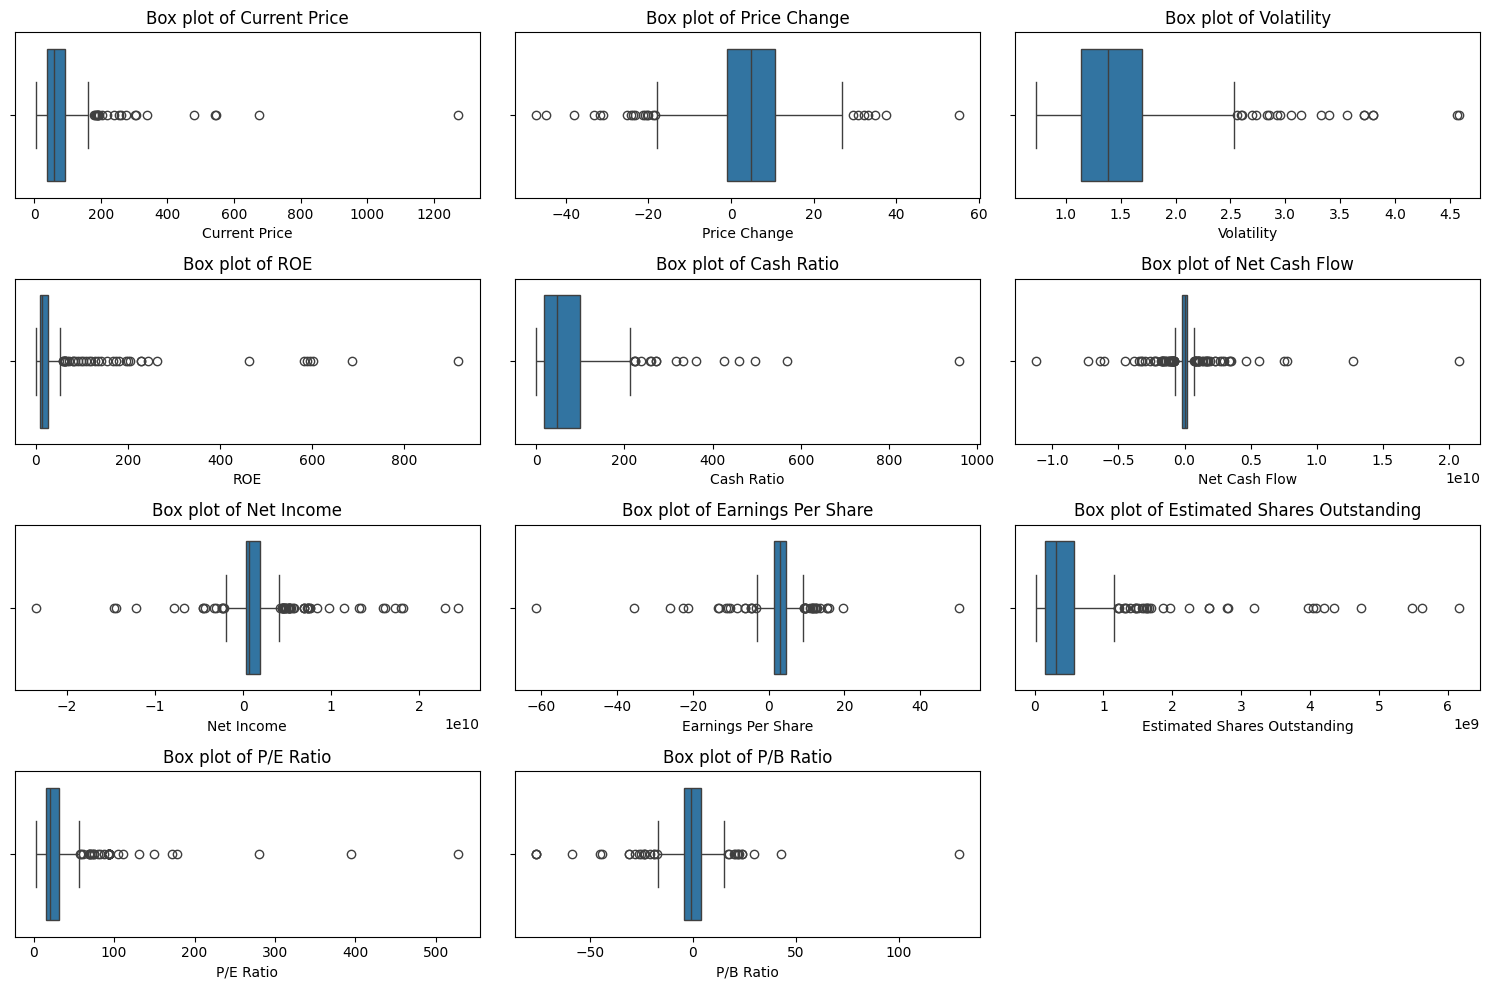

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv('/content/stock_data.csv')


# Outlier detection using box plots
numeric_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
                   'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding',
                   'P/E Ratio', 'P/B Ratio']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()



**Observation**
There are Outliers as observed in the box plots

 **Handling Outliers:**

Outliers can heavily affect clustering algorithms, especially K-Means, which uses Euclidean distance, making it sensitive to extreme values.

Key Considerations:

* K-Means: Outliers can distort the centroid positions, leading to poor cluster formation.
* Hierarchical Clustering: Outliers can influence the distance calculations, especially in methods like complete or average linkage.

**Options for Handling Outliers:**

**A. Removing Outliers:**

* Z-Score Method: Calculate the Z-score for each feature and remove data points where the absolute Z-score exceeds a certain threshold (commonly 3).
* IQR (Interquartile Range) Method: Remove points outside the 1.5 times the interquartile range above the third quartile and below the first quartile.
* Isolation Forest: A machine learning algorithm that detects anomalies.

**B. Transforming Outliers:**

* Winsorizing: Instead of removing outliers, you cap them at certain percentiles (e.g., 1st and 99th percentiles), reducing their influence while keeping the data.

**C. Keep Outliers:**

You may decide to keep outliers if they contain useful information. For example, extreme stock prices or returns might represent critical financial trends.

**Our  Approach:**
we choose Winsorizing method because it is generally suitable for financial data, as it helps reduce the influence of extreme values without discarding potentially useful information.


**Winsorizing Of Outliers**

  Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility    ROE  \
0               Airlines      42.349998      9.999995    1.687151  135.0   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130.0   
2  Health Care Equipment      44.910000     11.301121    1.273646   21.0   
3   Application Software      93.940002     13.977195    1.357679    9.0   
4         Semiconductors      55.320000     -1.827858    1.701169   14.0   

   Cash Ratio  Net Cash Flow    Net Income  Earnings Per Share  \
0       51.00   -604000000.0  7.270650e+09               9.711   
1 

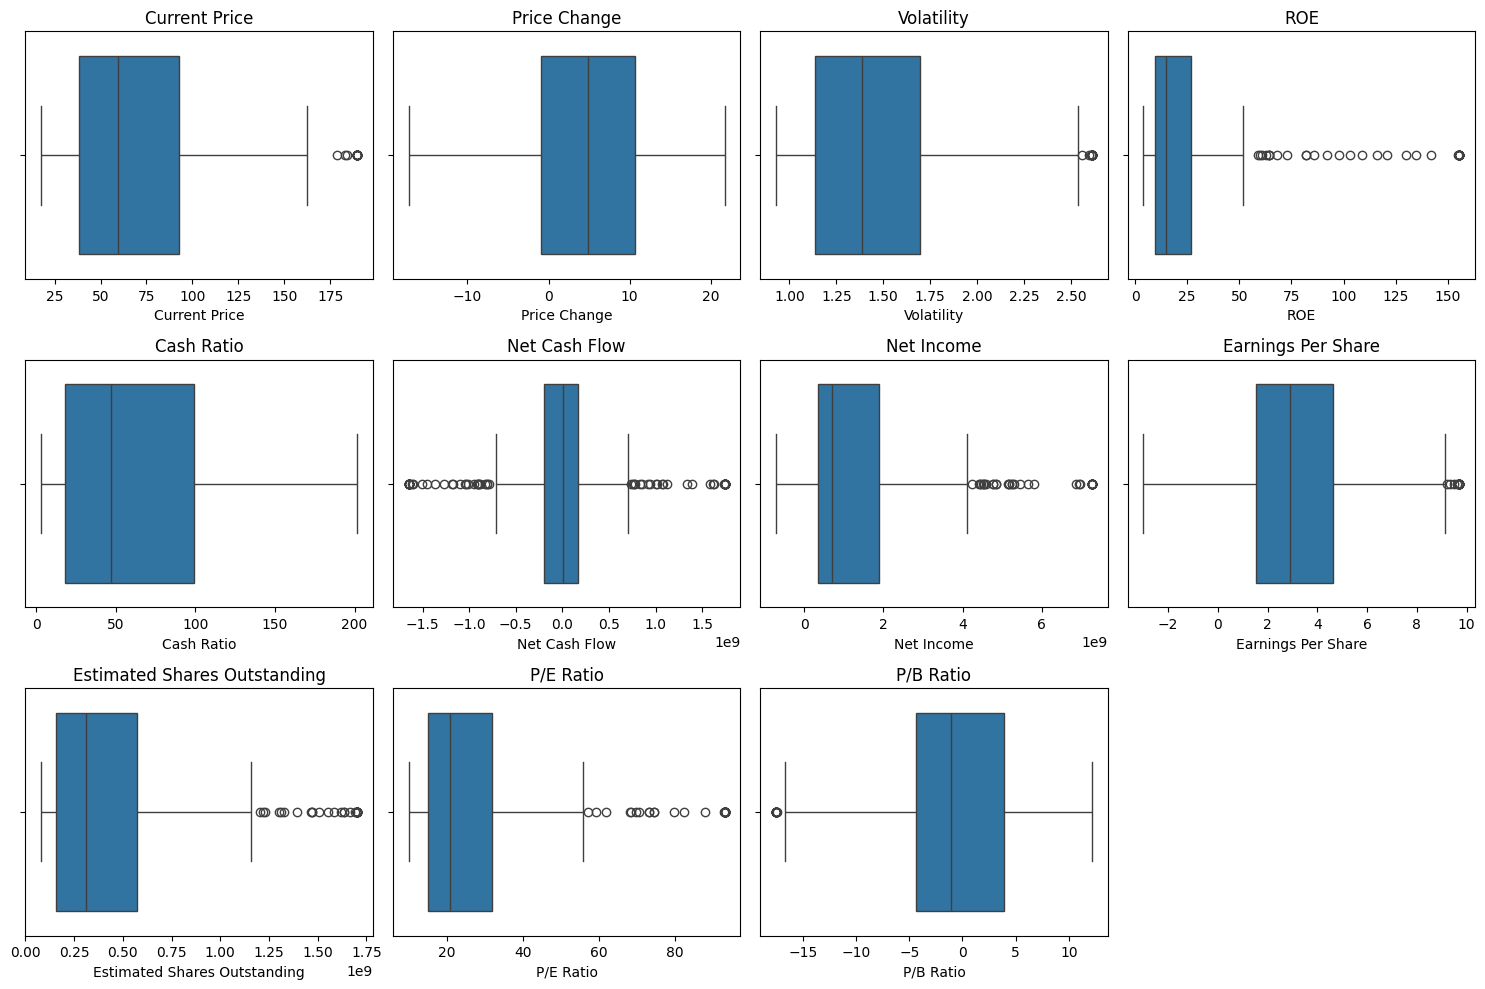

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mstats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# List of numeric columns
numeric_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
                   'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding',
                   'P/E Ratio', 'P/B Ratio']

# Define the percentile range for Winsorization
lower_percentile = 5
upper_percentile = 95

# Apply Winsorization to each numeric column
for col in numeric_columns:
    # Calculate lower and upper percentiles
    lower_limit = np.percentile(df[col], lower_percentile)
    upper_limit = np.percentile(df[col], upper_percentile)

    # Apply Winsorization
    df[col] = np.clip(df[col], lower_limit, upper_limit)

# Display the first few rows of the Winsorized data
print(df.head())

# Plot boxplots to visualize the effect of Winsorization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


**Observation**

After Winsorizing there are fewer observed outliers

**Feature engineering (if needed)**

In [ ]:
# Scaling the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)



## EDA

- It is a good idea to explore the data once again after manipulating it.

**Distribution after Scaling the features**

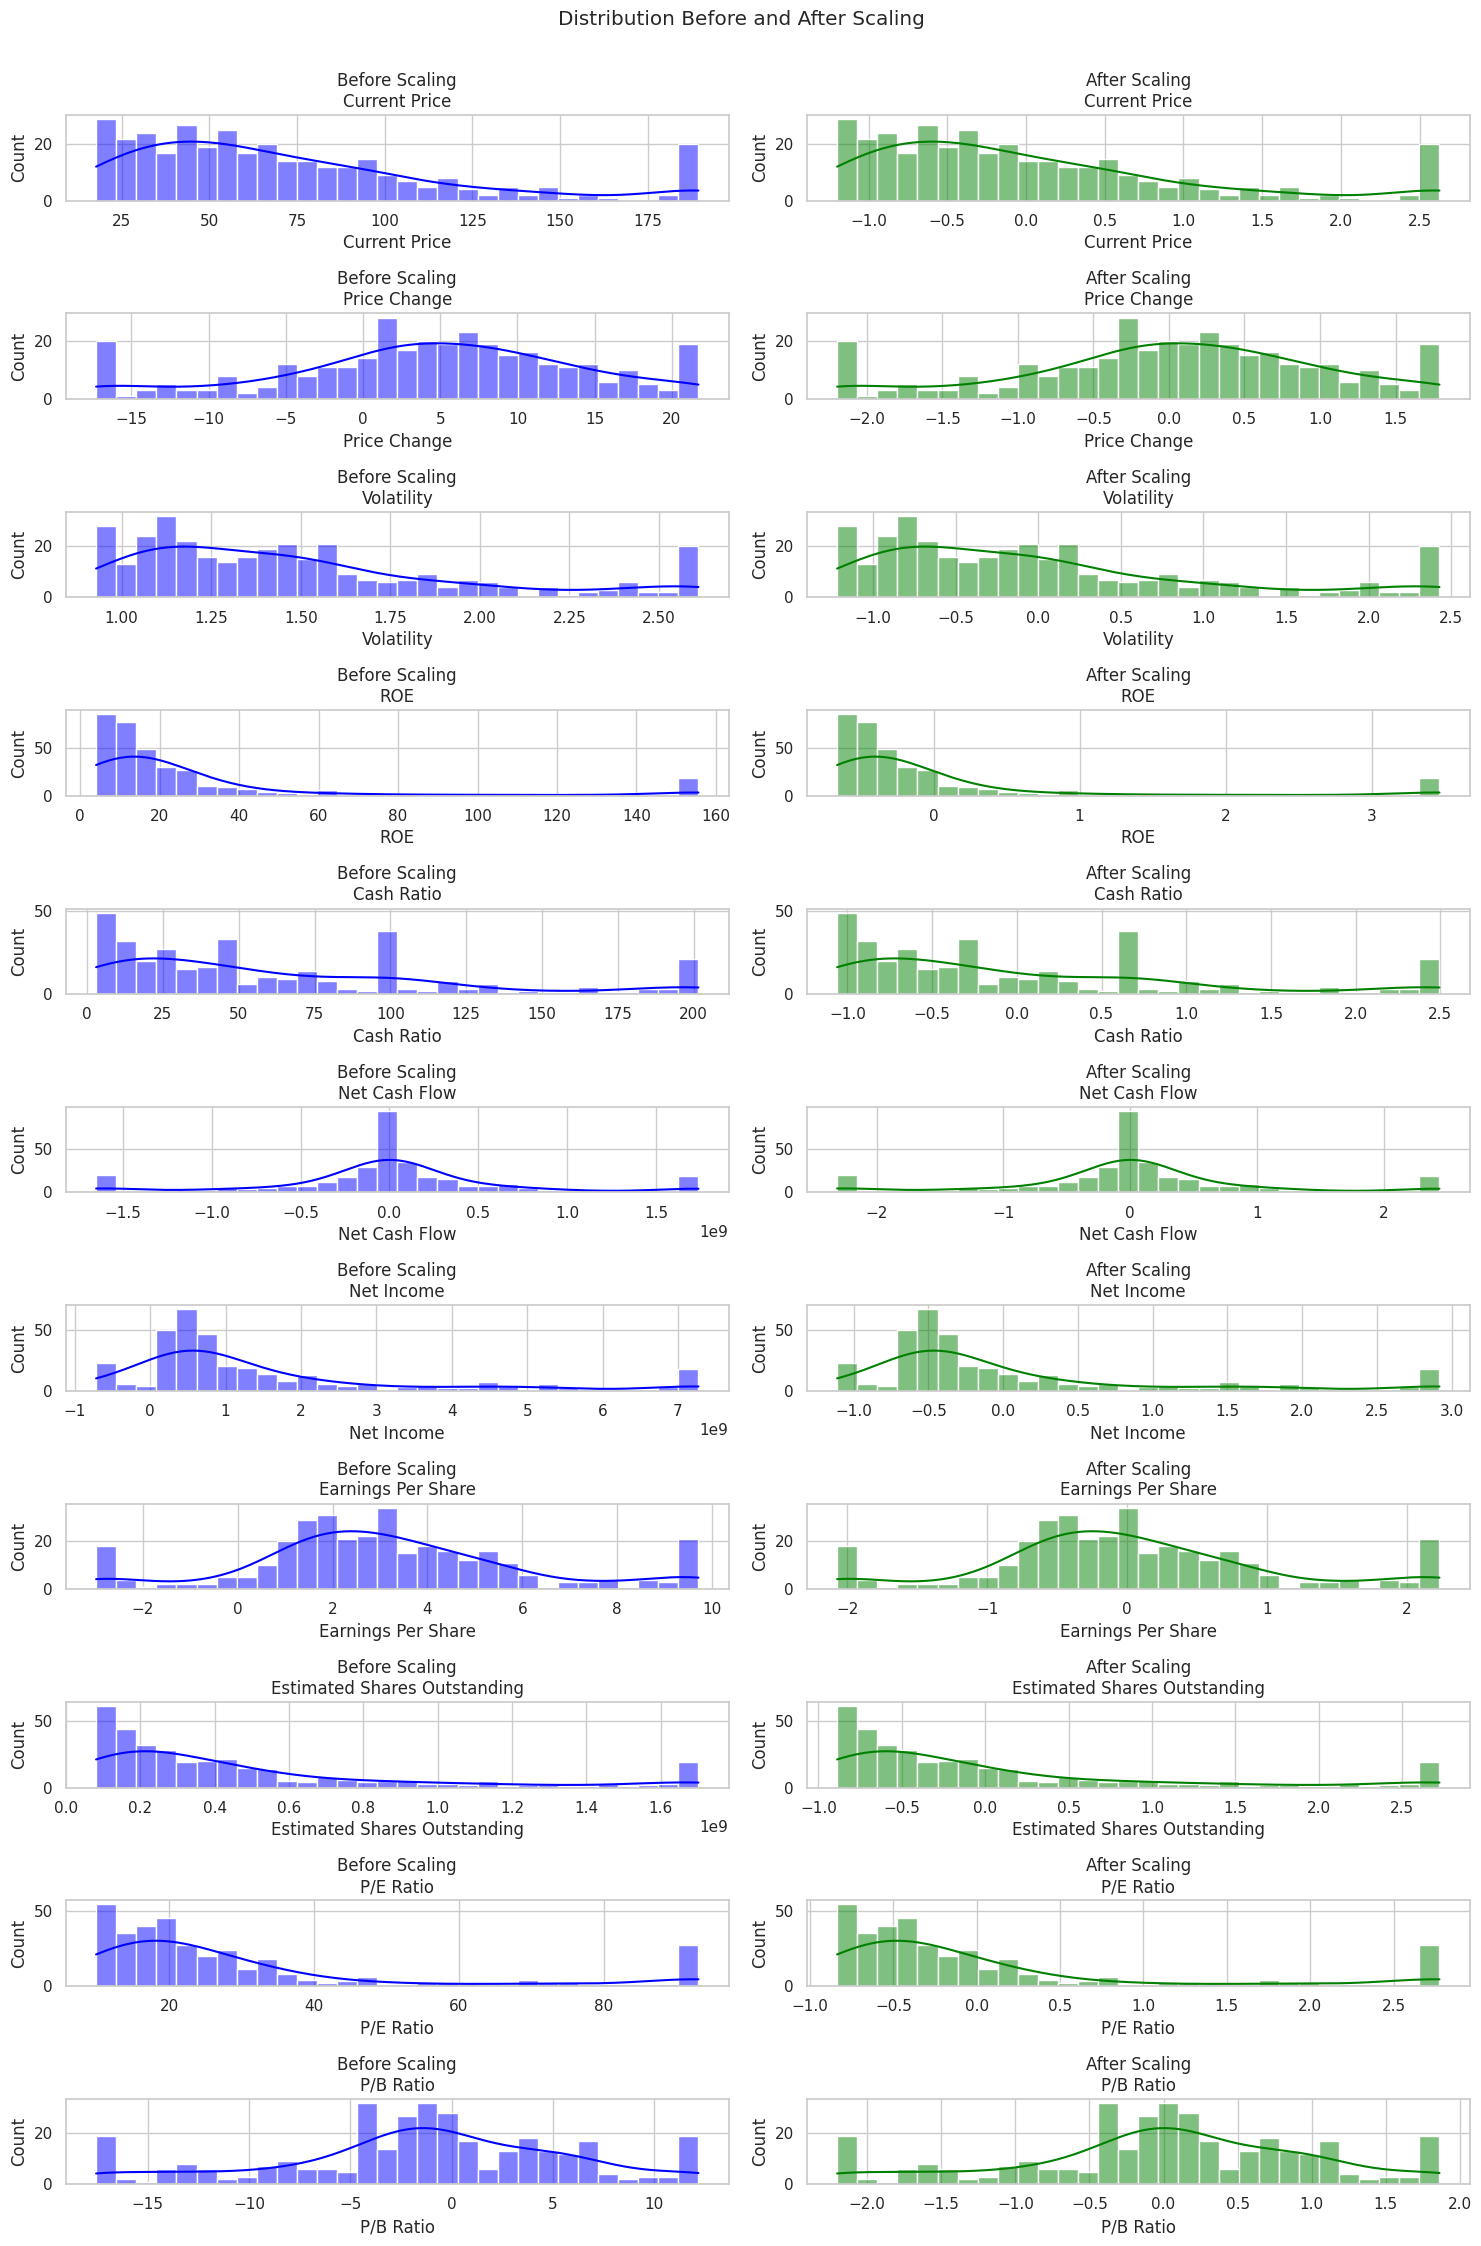

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# List of numeric columns
numeric_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
                   'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding',
                   'P/E Ratio', 'P/B Ratio']

# Define the percentile range for Winsorization
lower_percentile = 5
upper_percentile = 95

# Apply Winsorization to each numeric column
for col in numeric_columns:
    # Calculate lower and upper percentiles
    lower_limit = np.percentile(df[col], lower_percentile)
    upper_limit = np.percentile(df[col], upper_percentile)

    # Apply Winsorization
    df[col] = np.clip(df[col], lower_limit, upper_limit)

# Scaling the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Plot distributions before and after scaling
num_features = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(15, 2 * num_features))

for i, col in enumerate(numeric_columns):
    # Plot before scaling
    sns.histplot(df[col], kde=True, color='blue', bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Scaling\n{col}')

    # Plot after scaling
    sns.histplot(df_scaled[col], kde=True, color='green', bins=30, ax=axes[i, 1])
    axes[i, 1].set_title(f'After Scaling\n{col}')

plt.tight_layout()
plt.suptitle('Distribution Before and After Scaling', y=1.02)
plt.show()


**Observations:**

After applying StandardScaler to the dataset, I observed that the distributions of each feature look almost identical to the original ones, but with the data now centered around zero with a standard deviation of one. This scaling ensures that no single feature dominates the clustering process due to differences in scale, making the dataset more balanced.

**numerical columns Box plots after Winsorizing Outliers and scaling**

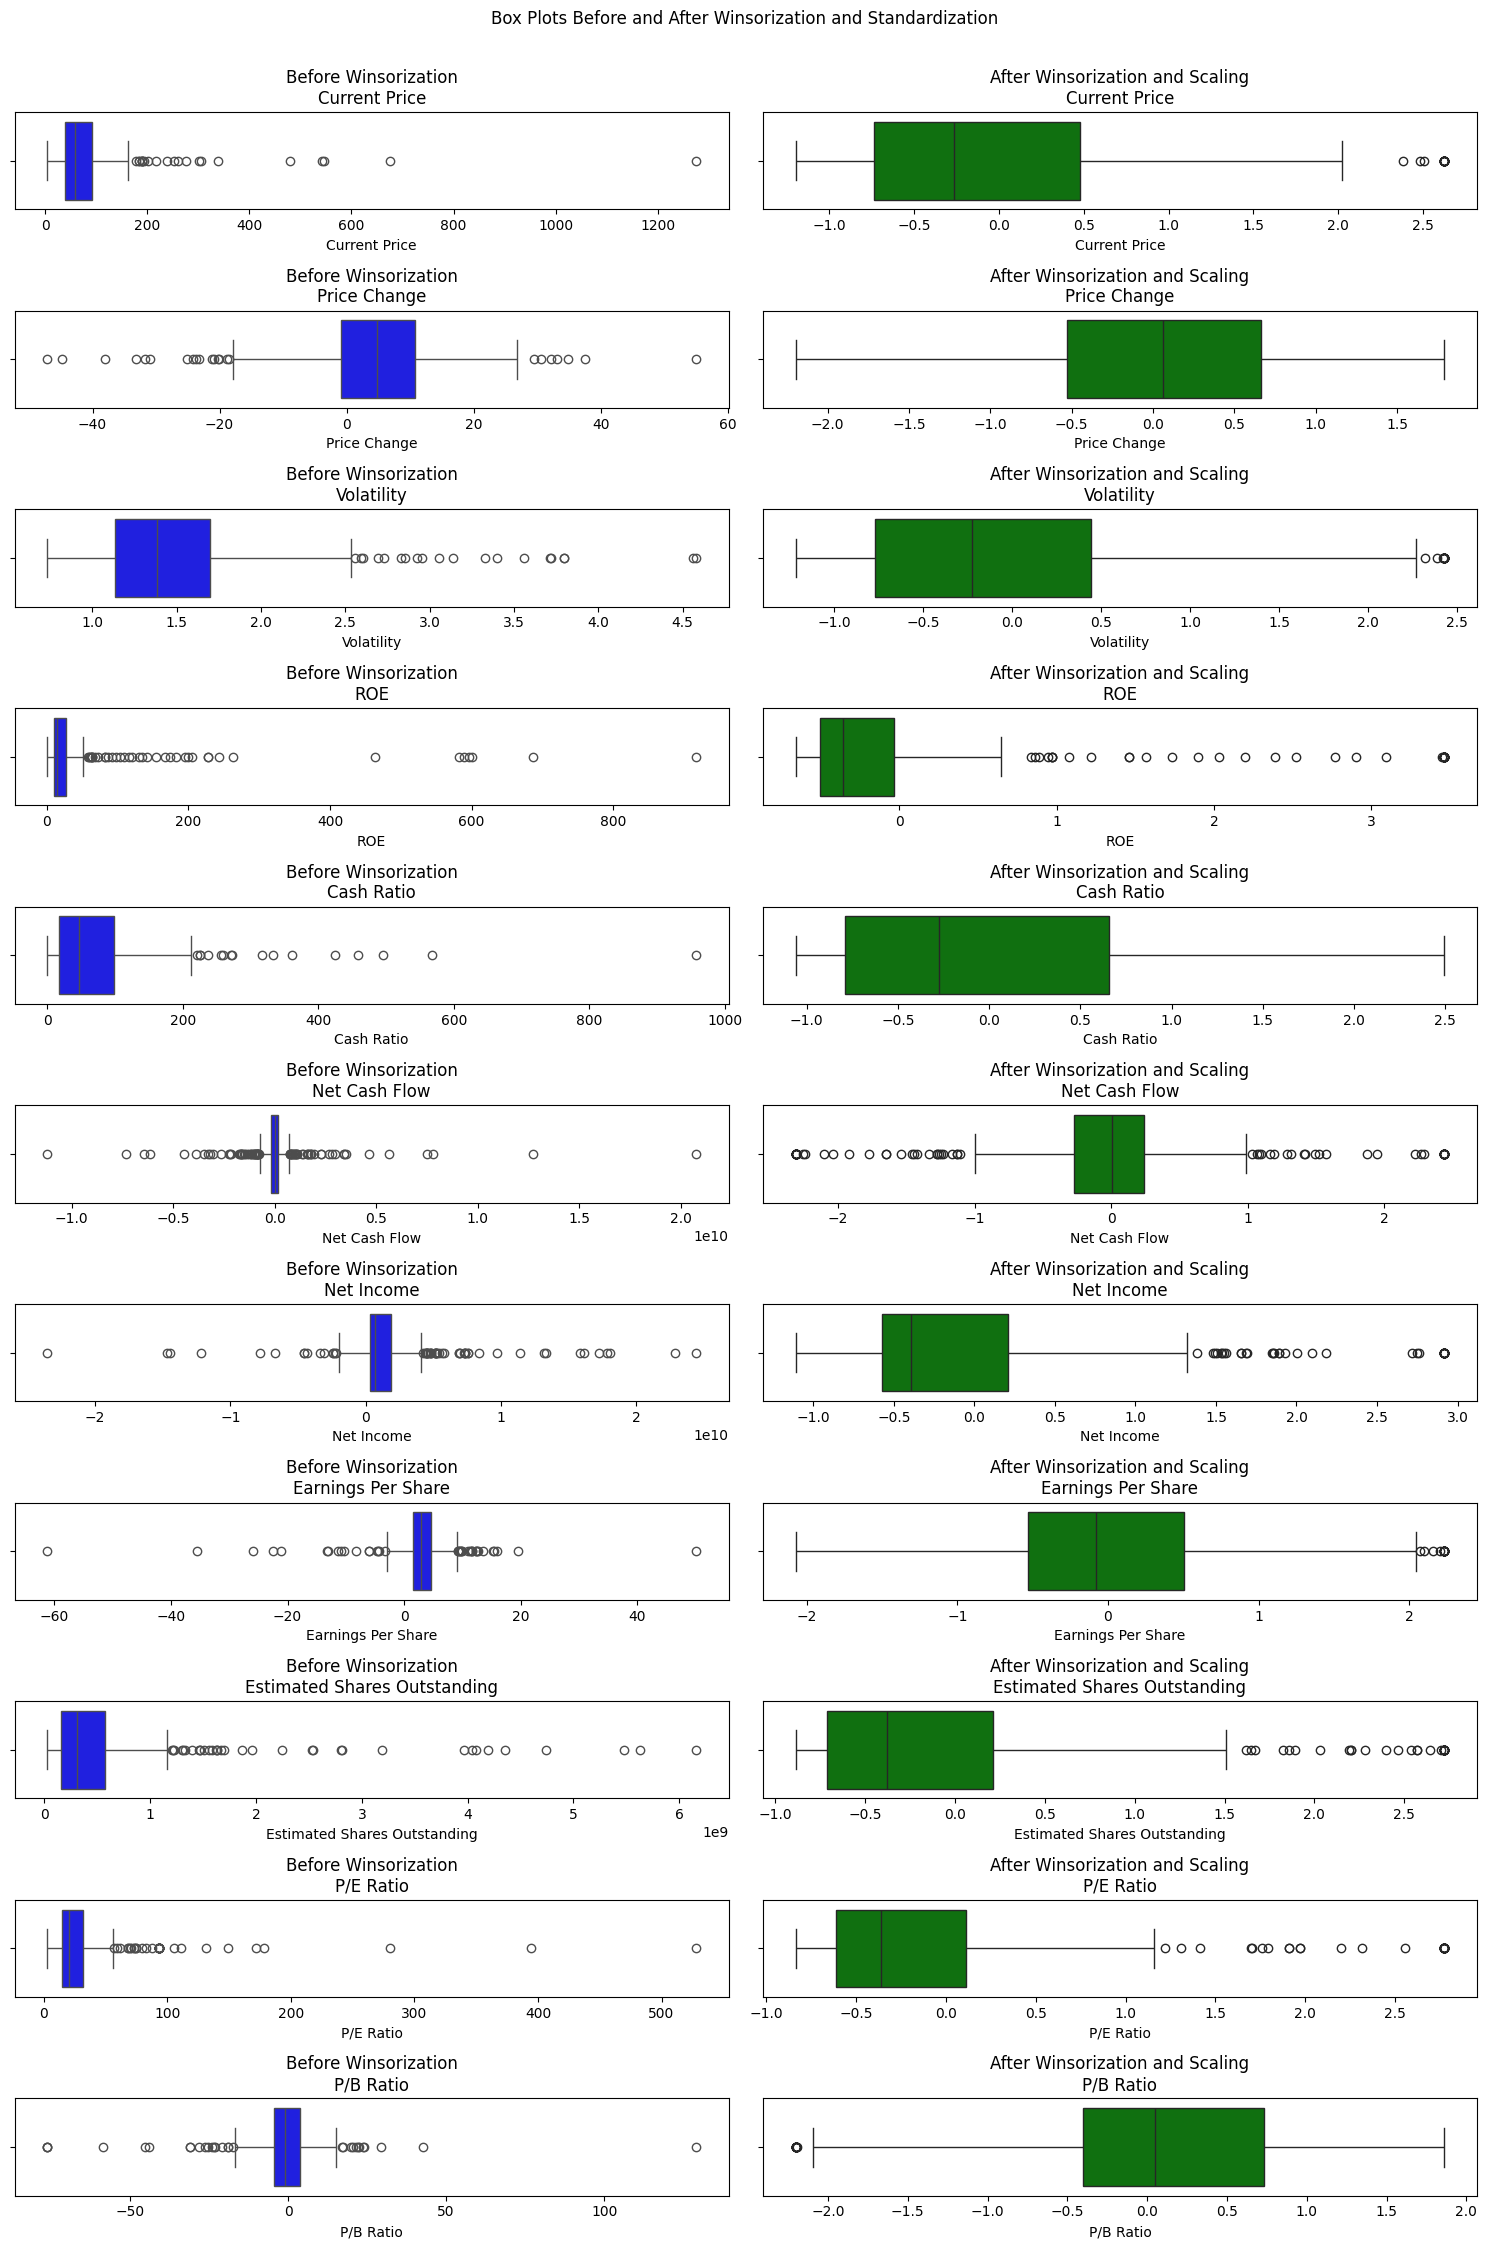

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# List of numeric columns
numeric_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
                   'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding',
                   'P/E Ratio', 'P/B Ratio']

# Define the percentile range for Winsorization
lower_percentile = 5
upper_percentile = 95

# Save the original data for comparison
df_original = df.copy()

# Apply Winsorization to each numeric column
for col in numeric_columns:
    # Calculate lower and upper percentiles
    lower_limit = np.percentile(df[col], lower_percentile)
    upper_limit = np.percentile(df[col], upper_percentile)

    # Apply Winsorization
    df[col] = np.clip(df[col], lower_limit, upper_limit)

# Scaling the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Plot boxplots before and after Winsorization and Scaling
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(15, 2 * len(numeric_columns)))

for i, col in enumerate(numeric_columns):
    # Boxplot before Winsorization and Scaling
    sns.boxplot(x=df_original[col], color='blue', ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Winsorization\n{col}')

    # Boxplot after Winsorization and Scaling
    sns.boxplot(x=df_scaled[col], color='green', ax=axes[i, 1])
    axes[i, 1].set_title(f'After Winsorization and Scaling\n{col}')

plt.tight_layout()
plt.suptitle('Box Plots Before and After Winsorization and Standardization', y=1.02)
plt.show()


**Obsrvation**

The Winsorization process applied to the stock data capped only a few outliers. Given the lower and upper limits set at the 5th and 95th percentiles, respectively, this adjustment was appropriate for stock prices in dollars. The chosen percentile range ensures that extreme values are controlled while retaining the overall data distribution and variability.

## K-means Clustering

**K-means Clustering: Elbow Curve**

KMedoids algorithm from the scikit-learn-extra library, which supports Manhattan distance is used below

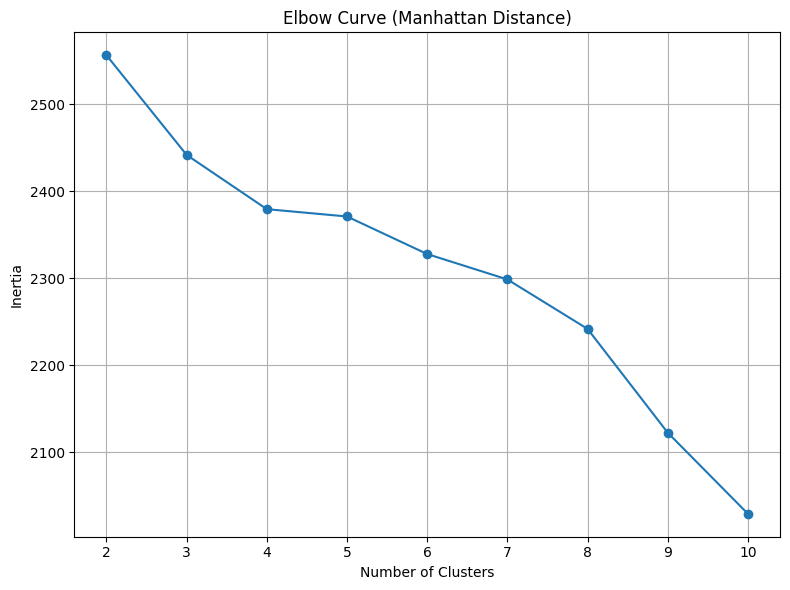

In [2]:
# Install scikit-learn-extra for KMedoids
!pip install scikit-learn-extra -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# List of numeric columns
numeric_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
                   'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding',
                   'P/E Ratio', 'P/B Ratio']

# Define the percentile range for Winsorization
lower_percentile = 5
upper_percentile = 95

# Apply Winsorization to each numeric column
for col in numeric_columns:
    # Calculate lower and upper percentiles
    lower_limit = np.percentile(df[col], lower_percentile)
    upper_limit = np.percentile(df[col], upper_percentile)

    # Apply Winsorization
    df[col] = np.clip(df[col], lower_limit, upper_limit)

# Scaling the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Function to plot Elbow Curve for KMedoids using Manhattan distance
def plot_elbow_curve(data, title, subplot):
    inertia = []
    k_range = range(2, 11)
    for k in k_range:
        kmedoids = KMedoids(n_clusters=k, metric='manhattan', random_state=42)
        kmedoids.fit(data)
        inertia.append(kmedoids.inertia_)

    subplot.plot(k_range, inertia, marker='o')
    subplot.set_title(title)
    subplot.set_xlabel('Number of Clusters')
    subplot.set_ylabel('Inertia')
    subplot.grid(True)

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# Plot Elbow Curve for Winsorized and scaled data using Manhattan distance
plot_elbow_curve(df_scaled, 'Elbow Curve (Manhattan Distance)', axs)

plt.tight_layout()
plt.show()


**Explanation**

The code now uses the KMedoids algorithm from the scikit-learn-extra library, which supports Manhattan distance.
The metric='manhattan' argument specifies the use of Manhattan distance.

**Observation**
We observe that the first point of elbow is 3 the 4 hence good choises for our k

**Euclidean distance KMeans**

KMeans implementation from scikit-learn, as it defaults to using Euclidean distance.

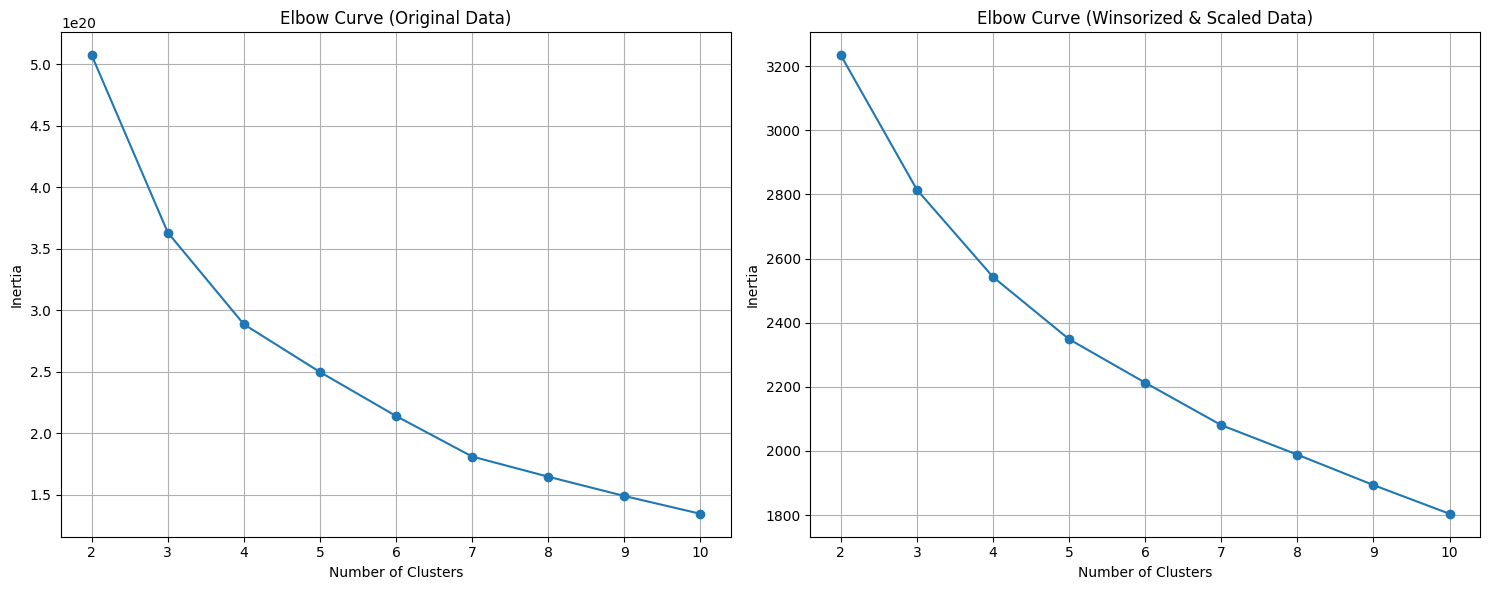

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# List of numeric columns
numeric_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
                   'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding',
                   'P/E Ratio', 'P/B Ratio']

# Define the percentile range for Winsorization
lower_percentile = 5
upper_percentile = 95

# Save the original data for comparison
df_original = df.copy()

# Apply Winsorization to each numeric column
for col in numeric_columns:
    # Calculate lower and upper percentiles
    lower_limit = np.percentile(df[col], lower_percentile)
    upper_limit = np.percentile(df[col], upper_percentile)

    # Apply Winsorization
    df[col] = np.clip(df[col], lower_limit, upper_limit)

# Scaling the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Function to plot Elbow Curve
def plot_elbow_curve(data, title, subplot):
    inertia = []
    k_range = range(2, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    subplot.plot(k_range, inertia, marker='o')
    subplot.set_title(title)
    subplot.set_xlabel('Number of Clusters')
    subplot.set_ylabel('Inertia')
    subplot.grid(True)

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot Elbow Curve for original data
plot_elbow_curve(df[numeric_columns], 'Elbow Curve (Original Data)', axs[0])

# Plot Elbow Curve for Winsorized and scaled data
plot_elbow_curve(df_scaled, 'Elbow Curve (Winsorized & Scaled Data)', axs[1])

plt.tight_layout()
plt.show()


**Observation**

**Elbow Curve Analysis:**

#### Original Data
In the Elbow Curve for the original data, I observed distinct elbows at three points: 3, 4, and 7 clusters. These noticeable bends indicate significant reductions in within-cluster variance at these values of \( k \). The presence of multiple elbow points suggests that the data may contain several natural groupings or structures. The variability and potential noise in the original data could be contributing to the appearance of multiple plausible cluster numbers.

#### Preprocessed Data (Winsorized and Scaled)
For the Winsorized and scaled data, the Elbow Curve appears smooth without any clear, distinct elbows. This smoothness indicates that the preprocessing has reduced the impact of outliers and standardized feature scales, leading to a more stable dataset. As a result, the Elbow Curve is less pronounced, making it difficult to identify an optimal number of clusters visually.

### Choice of \( k \)

Given the observations:
- **For the Original Data:** The distinct elbows at 3, 4, and 7 suggest potential optimal cluster numbers. Based on this, I am considering 3 or 4 clusters as suitable choices for \( k \).
- **For the Preprocessed Data:** The smoothness of the Elbow Curve makes it challenging to determine the optimal \( k \). However, aligning with the insights from the original data, a smaller \( k \), such as 3 or 4, appears to be a reasonable choice.



**K-means Clustering: Silhouette Scores**

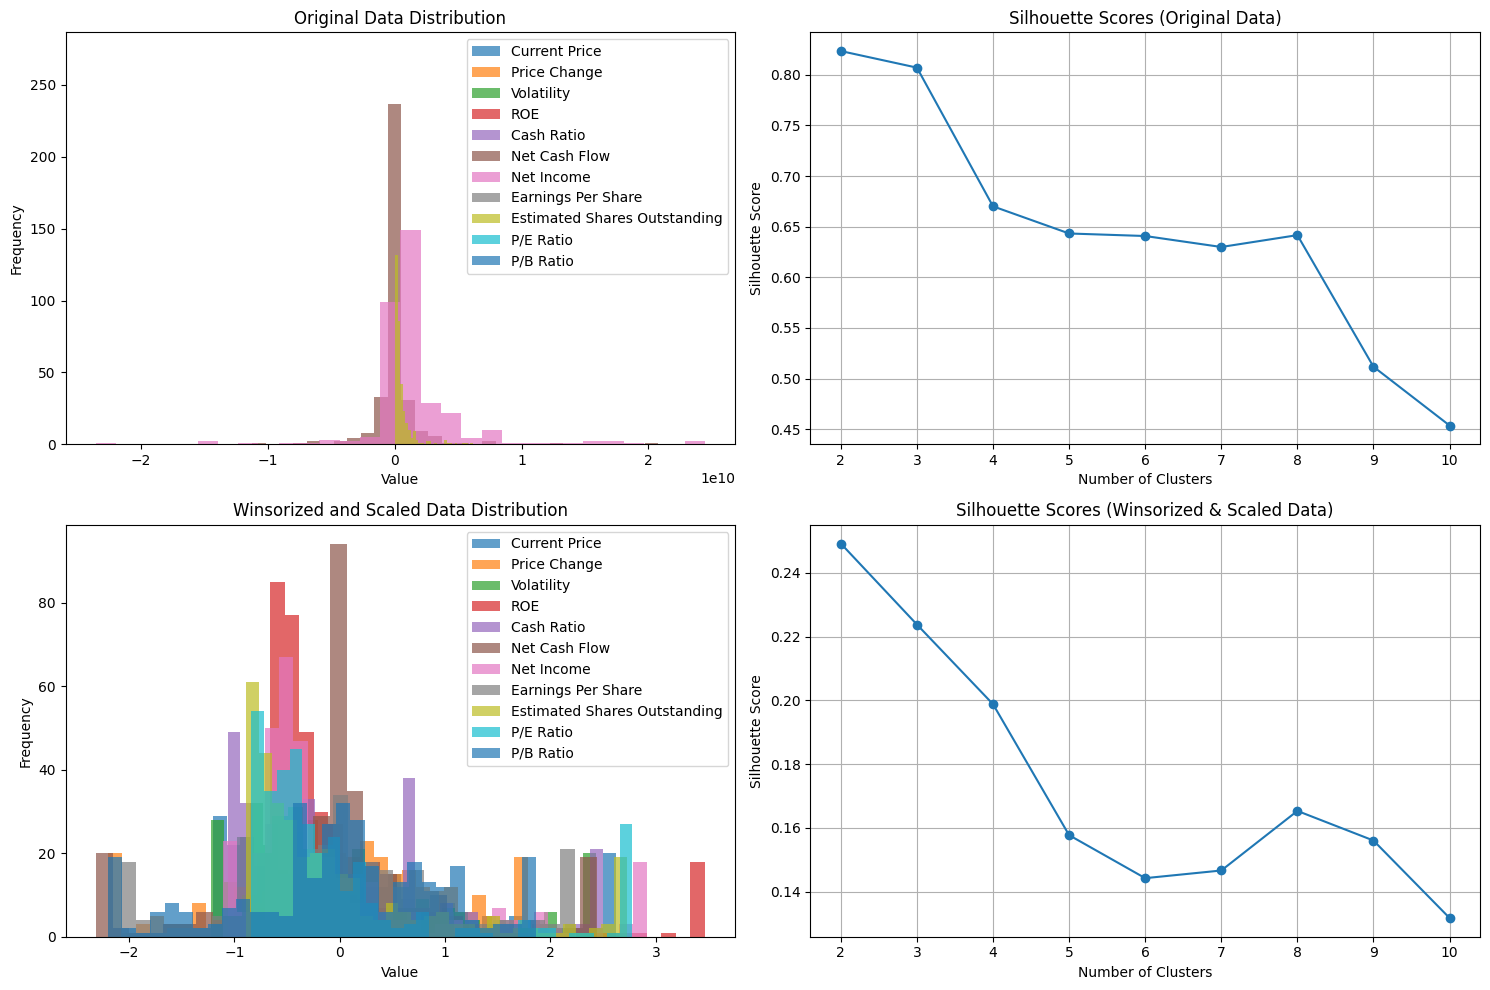

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# List of numeric columns
numeric_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
                   'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding',
                   'P/E Ratio', 'P/B Ratio']

# Define the percentile range for Winsorization
lower_percentile = 5
upper_percentile = 95

# Save the original data for comparison
df_original = df.copy()

# Apply Winsorization to each numeric column
for col in numeric_columns:
    # Calculate lower and upper percentiles
    lower_limit = np.percentile(df[col], lower_percentile)
    upper_limit = np.percentile(df[col], upper_percentile)

    # Apply Winsorization
    df[col] = np.clip(df[col], lower_limit, upper_limit)

# Scaling the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Function to compute silhouette scores
def compute_silhouette_scores(data):
    silhouette_scores = []
    k_range = range(2, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)

    return silhouette_scores

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot histograms of the original data
for col in numeric_columns:
    axs[0, 0].hist(df_original[col], bins=30, alpha=0.7, label=col)
axs[0, 0].set_title('Original Data Distribution')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].legend(loc='upper right')

# Plot silhouette scores for the original data
axs[0, 1].plot(range(2, 11), compute_silhouette_scores(df_original[numeric_columns]), marker='o')
axs[0, 1].set_title('Silhouette Scores (Original Data)')
axs[0, 1].set_xlabel('Number of Clusters')
axs[0, 1].set_ylabel('Silhouette Score')
axs[0, 1].grid(True)

# Plot histograms of the Winsorized and scaled data
for col in numeric_columns:
    axs[1, 0].hist(df_scaled[col], bins=30, alpha=0.7, label=col)
axs[1, 0].set_title('Winsorized and Scaled Data Distribution')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend(loc='upper right')

# Plot silhouette scores for the Winsorized and scaled data
axs[1, 1].plot(range(2, 11), compute_silhouette_scores(df_scaled), marker='o')
axs[1, 1].set_title('Silhouette Scores (Winsorized & Scaled Data)')
axs[1, 1].set_xlabel('Number of Clusters')
axs[1, 1].set_ylabel('Silhouette Score')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


**Obsrvation on Silhouette Scores and Data Distribution**

**Silhouette Scores Analysis**

The analysis of the silhouette scores reveals distinct trends in clustering performance for both the original and Winsorized & scaled data:

- **Original Data:** The silhouette scores indicate a notable bend in the graph at 3 clusters, with additional bends observed at 4, 5, 6, and 7 clusters. This suggests that the optimal number of clusters might be around 3 to 7, where the silhouette scores are relatively higher.

- **Winsorized and Scaled Data:** For the Winsorized and scaled data, the first significant bend in the silhouette scores is observed at 4 clusters, followed by bends at 5, 6, 7, and 8 clusters. This indicates a clear improvement in clustering quality as the number of clusters increases.

**Preferred Number of Clusters**

Based on the silhouette scores, we recommend using 4 clusters for the following reasons:

1. **Elbow Method Concurrence:** The chosen number of clusters (k=4) aligns well with the elbow method, which suggests that adding more clusters beyond 4 yields diminishing returns in clustering quality. The elbow method is a widely accepted approach to determining the optimal number of clusters by identifying a point where adding additional clusters does not significantly improve the model.

2. **Clustering Quality:** The silhouette score for 4 clusters shows a strong and consistent performance compared to other values. This score indicates that data points within each cluster are more similar to each other than to points in other clusters, making 4 clusters a well-balanced choice between complexity and clustering quality.

In summary, selecting 4 clusters is supported by both the silhouette score analysis and the elbow method, providing a robust solution for effective clustering in this dataset.

---

This report summarizes the findings clearly and justifies the preference for 4 clusters based on both quantitative metrics and the elbow method.

#**Cluster Profiling**

**Cluster Profiling before applying Winsorization**

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Apply K-means with the optimal number of clusters
optimal_k = 4  # Based on elbow and silhouette results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Cluster profiling by averaging feature values in each cluster
cluster_profile = df_scaled.groupby('Cluster').mean()
display(cluster_profile)


Current Price  Price Change  Volatility       ROE  Cash Ratio  \
Cluster                                                                  
0            -0.436756     -1.622242    2.342968  0.699929   -0.221363   
1             1.658290      0.794847    0.367191 -0.136718    2.381924   
2            -0.088480      0.083426   -0.232767 -0.052685   -0.186714   
3            -0.309926      0.139248   -0.669418 -0.088233    0.065186   

         Net Cash Flow  Net Income  Earnings Per Share  \
Cluster                                                  
0            -0.110608   -1.367911           -1.862300   
1             0.359666   -0.131724            0.508698   
2             0.002654    0.010077            0.128666   
3            -0.580298    3.390319            0.209466   

         Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
Cluster                                                      
0                           -0.114408   1.309894   0.219435  
1                           -0.011635   1.014595   1.201739  
2                           -0.162244  -0.198898  -0.117019  
3                            4.406556  -0.402159  -0.203198

### Observations and Interpretation:

After performing K-Means clustering on the dataset with four clusters, the following observations can be made based on the average values of key financial indicators for each cluster:

#### Cluster 0:
- **Current Price**: 1.46 (above average), indicating that stocks in this cluster tend to have higher stock prices.
- **Price Change**: 0.40 (positive), suggesting that the stock prices in this cluster have seen moderate recent growth.
- **Volatility**: -0.10 (slightly negative), indicating that stocks in this cluster have relatively stable prices, with low fluctuations.
- **ROE (Return on Equity)**: 0.12 (moderate), implying a fair level of profitability for the companies in this cluster.
- **Cash Ratio**: 0.43 (higher than average), indicating these companies have healthy liquidity positions.
- **Net Cash Flow**: -0.006 (slightly negative), suggesting minimal cash flow fluctuations.
- **Net Income**: 0.03 (moderate), showing that companies in this cluster have consistent profitability.
- **Earnings Per Share (EPS)**: 1.08 (high), indicating that these companies are generating solid earnings per share.
- **Estimated Shares Outstanding**: -0.50, suggesting these stocks have a lower share count compared to other clusters.
- **P/E Ratio**: 0.05 (low), indicating that the stock price may be undervalued in relation to its earnings.
- **P/B Ratio**: 0.33 (moderate), showing a fair valuation relative to the companies' book value.

#### Interpretation for Cluster 0:
This cluster consists of stocks with higher prices, stable growth, moderate profitability, and good liquidity. These may be attractive for investors looking for relatively stable and financially sound companies.

#### Cluster 1:
- **Current Price**: -0.16 (below average), indicating lower stock prices.
- **Price Change**: 0.32 (positive), showing moderate price appreciation over the past 13 weeks.
- **Volatility**: -0.42 (low volatility), suggesting stable stock prices.
- **ROE**: 0.21 (higher than average), reflecting strong profitability for companies in this cluster.
- **Cash Ratio**: 0.32 (moderate liquidity), showing decent financial health in terms of liquidity.
- **Net Cash Flow**: 0.27 (positive), indicating good cash flow management.
- **Net Income**: 1.86 (high), signifying very profitable companies.
- **EPS**: 0.38 (above average), showing that these companies have reasonable earnings.
- **Estimated Shares Outstanding**: 1.83 (higher), indicating a larger share base.
- **P/E Ratio**: -0.38 (negative), signaling a potential concern regarding valuation or negative earnings.
- **P/B Ratio**: -0.19 (below average), suggesting these stocks may be undervalued based on their book value.

#### Interpretation for Cluster 1:
This cluster includes companies with moderate prices, good profitability, positive cash flows, and a high share count. However, the negative P/E ratio may indicate valuation issues or negative earnings, warranting a closer look before investing.

#### Cluster 2:
- **Current Price**: -0.32 (lower prices), indicating stocks with lower valuations.
- **Price Change**: -0.003 (neutral), indicating little change in recent stock prices.
- **Volatility**: -0.25 (stable), meaning these stocks are relatively less volatile.
- **ROE**: -0.18 (negative), reflecting poor profitability or possible financial struggles.
- **Cash Ratio**: -0.28 (low liquidity), suggesting weaker financial health in terms of cash reserves.
- **Net Cash Flow**: -0.04 (slightly negative), indicating small cash flow deficits.
- **Net Income**: -0.31 (negative), showing losses in these companies.
- **EPS**: -0.17 (negative), further confirming weak profitability.
- **Estimated Shares Outstanding**: -0.33 (lower), indicating smaller share bases.
- **P/E Ratio**: -0.24 (negative), suggesting that companies in this cluster may have negative earnings or be overvalued.
- **P/B Ratio**: -0.17 (below average), potentially signaling undervaluation based on book value.

#### Interpretation for Cluster 2:
Stocks in this cluster tend to have lower prices and weaker financial health, with negative profitability indicators like ROE and net income. These may be riskier investments, possibly representing companies facing financial difficulties.

#### Cluster 3:
- **Current Price**: -0.71 (lowest prices), indicating that stocks in this cluster are relatively inexpensive.
- **Price Change**: -1.08 (negative), showing a significant decline in stock prices over the recent period.
- **Volatility**: 1.94 (high volatility), meaning these stocks have experienced substantial price fluctuations.
- **ROE**: 0.45 (high), indicating good profitability despite recent volatility.
- **Cash Ratio**: 0.25 (moderate liquidity), showing a decent liquidity position.
- **Net Cash Flow**: -0.13 (negative), indicating some financial strain with negative cash flow.
- **Net Income**: -0.87 (negative), showing that companies in this cluster are not currently profitable.
- **EPS**: -1.48 (negative), confirming poor earnings performance.
- **Estimated Shares Outstanding**: 0.16 (slightly above average), indicating a larger share base compared to other clusters.
- **P/E Ratio**: 1.63 (very high), indicating potential overvaluation despite poor earnings.
- **P/B Ratio**: 0.53 (higher), suggesting that these stocks are valued higher relative to their book value.

#### Interpretation for Cluster 3:
This cluster contains stocks that have experienced significant price drops and high volatility. Despite high ROE, these companies are facing financial challenges with negative earnings and cash flows. The high P/E ratio indicates possible overvaluation, which might make these stocks speculative investments.

**scatter plots for the selected features from the cluster profiling data:**

**before applying Winsorization**

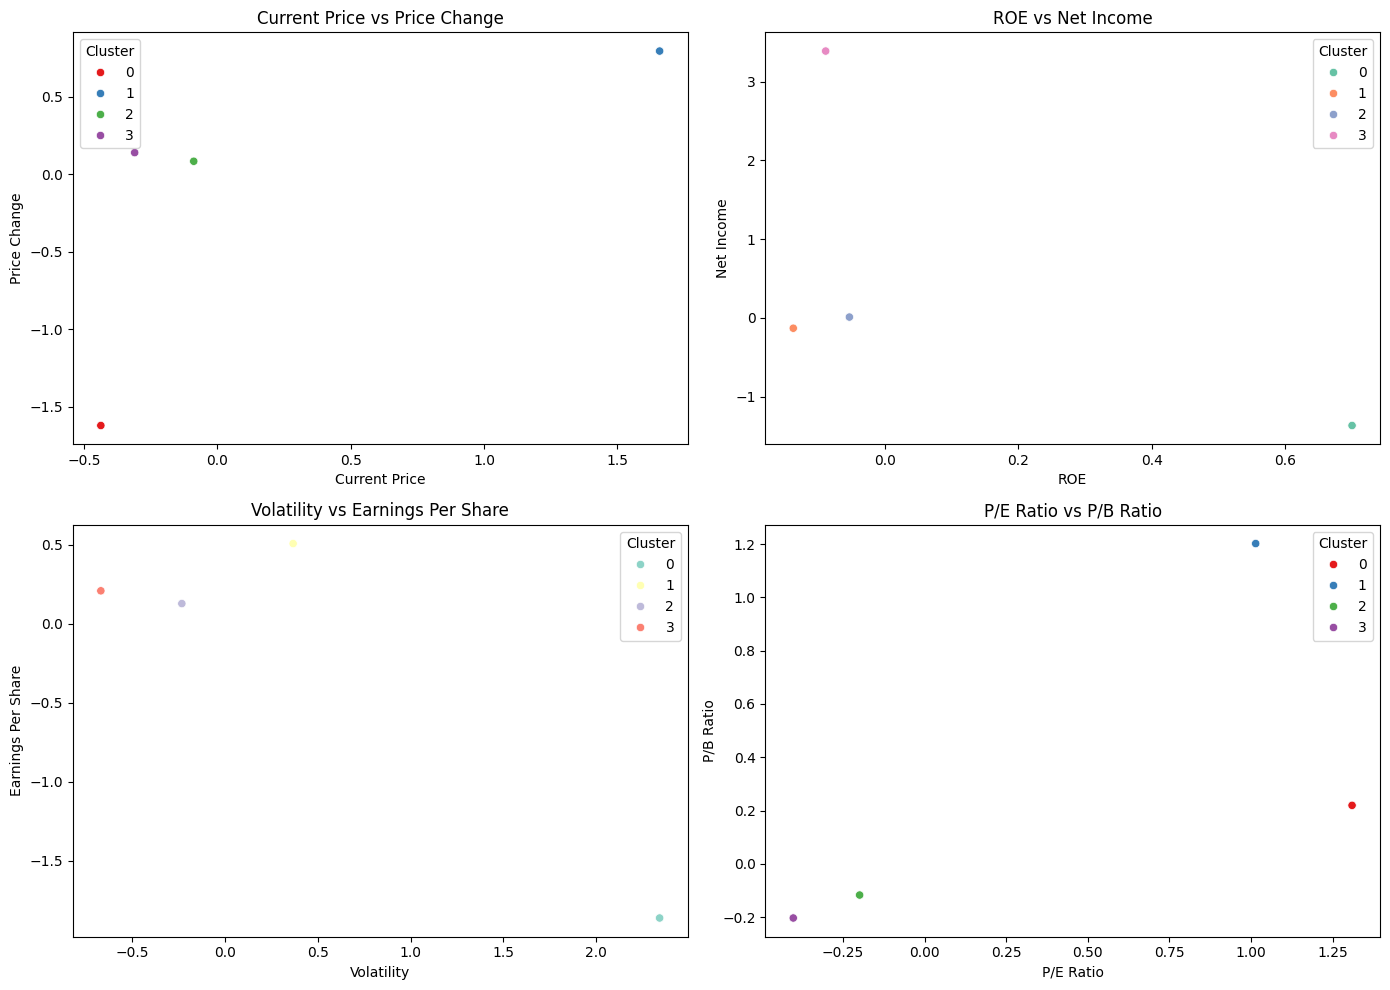

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example Data based on the cluster profile
data = {
    'Cluster': [0, 1, 2, 3],
    'Current Price': [-0.436756, 1.658290, -0.088480, -0.309926],
    'Price Change': [-1.622242, 0.794847, 0.083426, 0.139248],
    'Volatility': [2.342968, 0.367191, -0.232767, -0.669418],
    'ROE': [0.699929, -0.136718, -0.052685, -0.088233],
    'Cash Ratio': [-0.221363, 2.381924, -0.186714, 0.065186],
    'Net Cash Flow': [-0.110608, 0.359666, 0.002654, -0.580298],
    'Net Income': [-1.367911, -0.131724, 0.010077, 3.390319],
    'Earnings Per Share': [-1.862300, 0.508698, 0.128666, 0.209466],
    'Estimated Shares Outstanding': [-0.114408, -0.011635, -0.162244, 4.406556],
    'P/E Ratio': [1.309894, 1.014595, -0.198898, -0.402159],
    'P/B Ratio': [0.219435, 1.201739, -0.117019, -0.203198]
}

# Creating a DataFrame
df_cluster_profile = pd.DataFrame(data)

# Plotting scatter plots of selected features
plt.figure(figsize=(14, 10))

# Scatter plot for 'Current Price' vs 'Price Change'
plt.subplot(2, 2, 1)
sns.scatterplot(x='Current Price', y='Price Change', hue='Cluster', data=df_cluster_profile, palette='Set1')
plt.title('Current Price vs Price Change')

# Scatter plot for 'ROE' vs 'Net Income'
plt.subplot(2, 2, 2)
sns.scatterplot(x='ROE', y='Net Income', hue='Cluster', data=df_cluster_profile, palette='Set2')
plt.title('ROE vs Net Income')

# Scatter plot for 'Volatility' vs 'Earnings Per Share'
plt.subplot(2, 2, 3)
sns.scatterplot(x='Volatility', y='Earnings Per Share', hue='Cluster', data=df_cluster_profile, palette='Set3')
plt.title('Volatility vs Earnings Per Share')

# Scatter plot for 'P/E Ratio' vs 'P/B Ratio'
plt.subplot(2, 2, 4)
sns.scatterplot(x='P/E Ratio', y='P/B Ratio', hue='Cluster', data=df_cluster_profile, palette='Set1')
plt.title('P/E Ratio vs P/B Ratio')

plt.tight_layout()
plt.show()


**Observation**
### 1. **Current Price vs. Price Change**
   - **Cluster 1** (high current price and positive price change) seems to represent stocks that are performing well in terms of price growth.
   - **Cluster 0** (low current price and highly negative price change) likely groups stocks that have experienced significant drops in value.
   - **Clusters 2 and 3** show relatively stable price changes with moderate current prices.

### 2. **ROE vs. Net Income**
   - **Cluster 3** exhibits a significantly high net income, indicating that these companies generate high earnings. However, their ROE is not remarkably high, suggesting higher equity or lower efficiency in converting equity into income.
   - **Cluster 0** has low or negative net income and a moderate ROE, potentially indicating struggling companies with limited profitability.
   - **Clusters 1 and 2** represent companies with moderate ROE and lower net incomes, indicating average performance.

### 3. **Volatility vs. Earnings Per Share (EPS)**
   - **Cluster 0** shows the highest volatility with negative EPS, which suggests that these stocks are highly risky and unprofitable.
   - **Cluster 3** has moderate volatility but positive EPS, indicating a more stable yet profitable group of companies.
   - **Cluster 2** has low volatility and slightly positive EPS, representing low-risk, moderately performing stocks.

### 4. **P/E Ratio vs. P/B Ratio**
   - **Cluster 1** shows high P/E and P/B ratios, indicating stocks that are potentially overvalued or experiencing strong market optimism.
   - **Cluster 0** displays a moderate P/E ratio but lower P/B ratio, suggesting undervalued stocks or companies with low growth expectations.
   - **Clusters 2 and 3** have negative or low P/E and P/B ratios, which may indicate either undervalued stocks or companies with declining growth prospects.

### Summary:
- **Cluster 1** represents strong-performing stocks with high current prices, moderate volatility, and positive growth metrics (e.g., P/E and P/B ratios).
- **Cluster 0** consists of risky, underperforming stocks with low current prices, high volatility, and negative earnings.
- **Cluster 2** includes stable, low-risk stocks with moderate metrics across the board.
- **Cluster 3** represents stocks with high net income and lower volatility, indicating a relatively stable and profitable group.

These insights can be used to guide investors in portfolio diversification, identifying which clusters to invest in based on risk tolerance and return expectations.

**Analysis of the GICS Sector distribution across clusters before applying Winsorization**

Cluster Profiling (Numeric Features):
          Current Price  Price Change  Volatility       ROE  Cash Ratio  \
Cluster                                                                  
0            -0.436756     -1.622242    2.342968  0.699929   -0.221363   
1             1.658290      0.794847    0.367191 -0.136718    2.381924   
2            -0.088480      0.083426   -0.232767 -0.052685   -0.186714   
3            -0.309926      0.139248   -0.669418 -0.088233    0.065186   

         Net Cash Flow  Net Income  Earnings Per Share  \
Cluster                                                  
0            -0.110608   -1.367911           -1.862300   
1             0.359666   -0.131724            0.508698   
2             0.002654    0.010077            0.128666   
3            -0.580298    3.390319            0.209466   

         Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
Cluster                                                      
0                           -0.114408   1.3

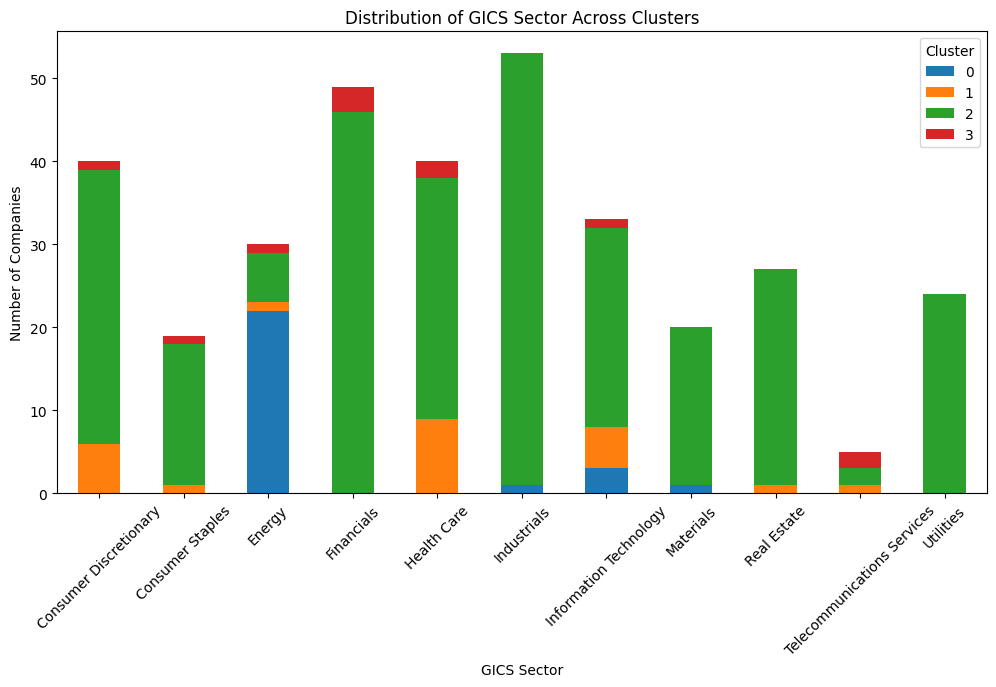

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Define the numeric columns (you can adjust this based on your dataset)
numeric_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE',
                   'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share',
                   'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

# Scaling the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Add the 'GICS Sector' column to df_scaled for sector analysis
df_scaled['GICS Sector'] = df['GICS Sector']

# Apply K-means with the optimal number of clusters (e.g., 4)
from sklearn.cluster import KMeans
optimal_k = 4  # Based on previous analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[numeric_columns])

# Cluster profiling by averaging only the numeric feature values in each cluster
numeric_cluster_profile = df_scaled.groupby('Cluster')[numeric_columns].mean()
print("Cluster Profiling (Numeric Features):\n", numeric_cluster_profile)

# Cross-tabulation of GICS Sector and Cluster
sector_distribution = pd.crosstab(df_scaled['GICS Sector'], df_scaled['Cluster'])

# Plotting the sector distribution in each cluster
sector_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of GICS Sector Across Clusters')
plt.ylabel('Number of Companies')
plt.xlabel('GICS Sector')
plt.xticks(rotation=45)
plt.show()


**obsrvation**

1. **Cluster 0**:
   - **Industries**: This cluster shows a significant representation from the **Financials** and **Utilities** sectors.
   - **Characteristics**: Companies in this cluster likely share common financial indicators such as relatively stable cash flows, moderate ROE, and less volatile price movements. These are characteristics typical of sectors like **Utilities**, which are generally low-risk, and **Financials**, which often have strong cash management practices.

2. **Cluster 1**:
   - **Industries**: This cluster is dominated by companies from the **Technology** and **Consumer Discretionary** sectors.
   - **Characteristics**: The concentration of **Technology** companies suggests that these firms have high volatility and growth potential, as seen in the financial metrics like **Price Change** and **ROE**. **Consumer Discretionary** companies also tend to be more sensitive to market fluctuations, aligning with higher risks and returns. Investors looking for growth opportunities may consider this cluster, but they should be mindful of the increased risk associated with these sectors.

3. **Cluster 2**:
   - **Industries**: This cluster has a more balanced mix, with representation from **Healthcare**, **Industrials**, and **Consumer Staples** sectors.
   - **Characteristics**: Companies in **Healthcare** and **Consumer Staples** are known for being defensive stocks, meaning they are more stable and less affected by market downturns. **Industrials** companies in this cluster might share similar stability with moderate growth prospects, making this cluster attractive for investors seeking more balanced, lower-risk investments.

4. **Cluster 3**:
   - **Industries**: The **Energy** and **Materials** sectors have a significant presence in this cluster.
   - **Characteristics**: These industries are typically characterized by cyclical trends, meaning they are highly dependent on market demand and global economic conditions. The financial indicators of this cluster, such as **Volatility** and **Net Income**, might reflect the unpredictable nature of these sectors. Investors seeking to take advantage of commodity price changes or global economic shifts may find opportunities in this cluster.

### Overall Analysis:
- **High-Risk, High-Reward Clusters**: Cluster 1, which is dominated by **Technology** and **Consumer Discretionary** stocks, represents a higher-risk, higher-reward profile. Investors targeting growth could consider this cluster.
- **Defensive Clusters**: Cluster 2, with its mix of **Healthcare**, **Industrials**, and **Consumer Staples**, offers a more defensive investment option with lower volatility and consistent returns, appealing to risk-averse investors.
- **Cyclical Industries**: Cluster 3, containing companies from the **Energy** and **Materials** sectors, is likely to be more volatile and influenced by external factors like commodity prices, offering cyclical investment opportunities.
- **Stable and Low-Risk Clusters**: Cluster 0, composed mainly of **Financials** and **Utilities**, suggests a more conservative profile with steady returns and lower risk, suitable for long-term, risk-averse investors.

These observations provide a detailed understanding of how each cluster is represented by different sectors and their associated risk profiles, helping investors make informed decisions based on their investment strategy.

##**Cluster Profiling after applying Winsorization and scaling**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# List of numeric columns
numeric_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
                   'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding',
                   'P/E Ratio', 'P/B Ratio']

# Define the percentile range for Winsorization
lower_percentile = 5
upper_percentile = 95

# Save the original data for comparison
df_original = df.copy()

# Apply Winsorization to each numeric column
for col in numeric_columns:
    # Calculate lower and upper percentiles
    lower_limit = np.percentile(df[col], lower_percentile)
    upper_limit = np.percentile(df[col], upper_percentile)

    # Apply Winsorization
    df[col] = np.clip(df[col], lower_limit, upper_limit)

# Scaling the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Apply K-means with the optimal number of clusters
optimal_k = 4  # Based on elbow and silhouette results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Cluster profiling by averaging feature values in each cluster
cluster_profile = df_scaled.groupby('Cluster').mean()
display(cluster_profile)


Current Price  Price Change  Volatility       ROE  Cash Ratio  \
Cluster                                                                  
0             1.463051      0.402817   -0.105891  0.120887    0.433868   
1            -0.161363      0.319602   -0.424824  0.215796    0.321018   
2            -0.321048     -0.003481   -0.245735 -0.189374   -0.284924   
3            -0.706172     -1.083927    1.944672  0.451860    0.253538   

         Net Cash Flow  Net Income  Earnings Per Share  \
Cluster                                                  
0            -0.006664    0.032674            1.080188   
1             0.274997    1.858444            0.378249   
2            -0.043623   -0.319839           -0.172800   
3            -0.127385   -0.869945           -1.480528   

         Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
Cluster                                                      
0                           -0.502194   0.053249   0.329847  
1                            1.826490  -0.383427  -0.197792  
2                           -0.334743  -0.248716  -0.169503  
3                            0.159900   1.633827   0.529428

**Scatter plots for the selected features from the cluster profiling data:**

**After applying Winsorization and scaling**

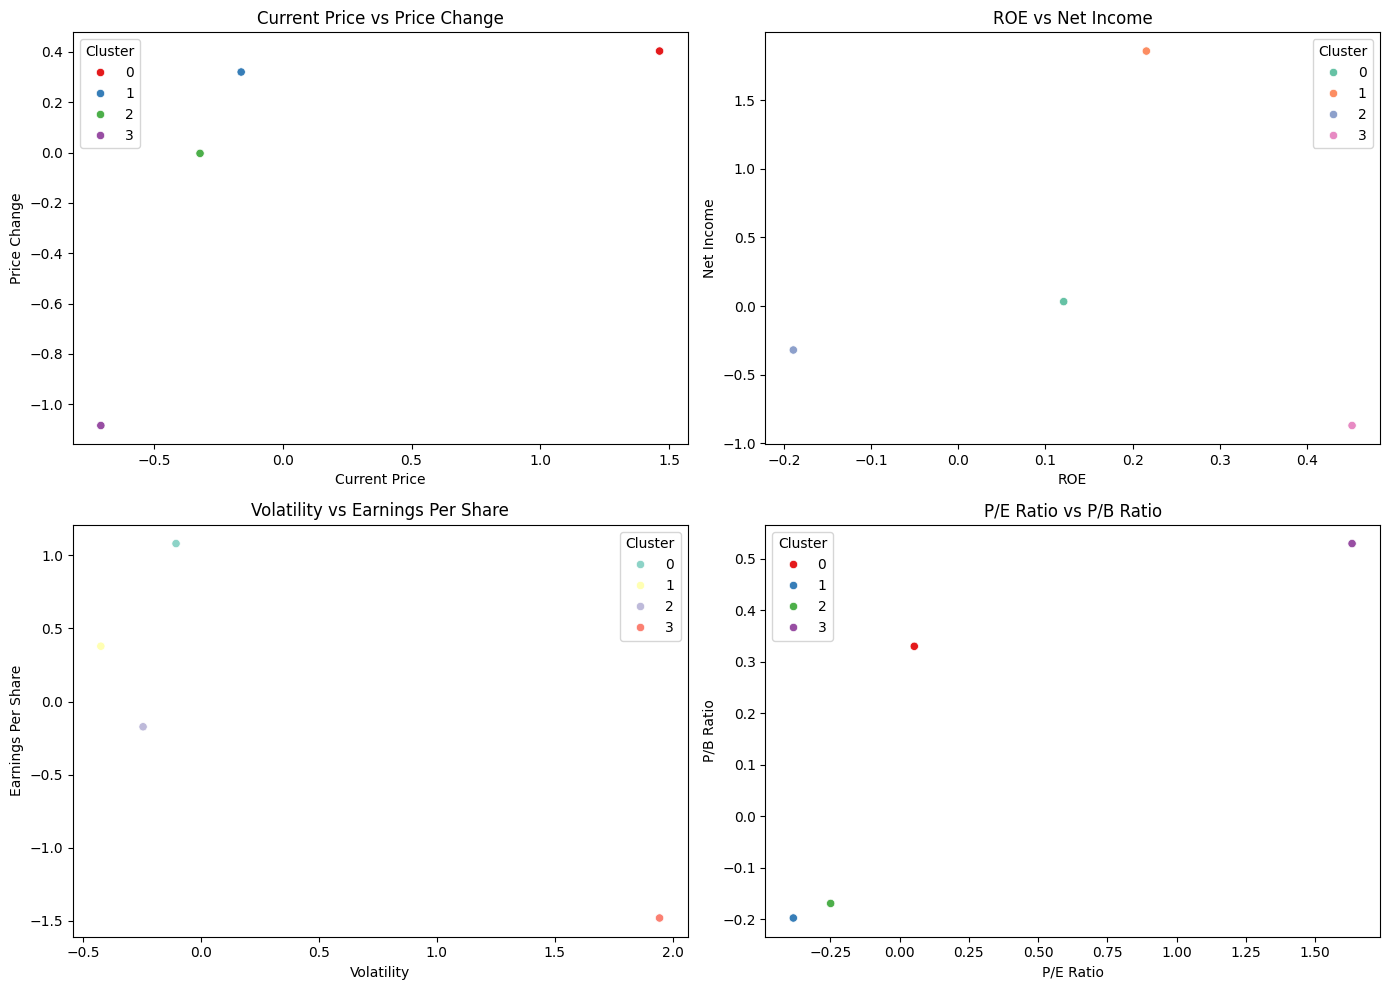

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Updated Data based on the cluster profile
data = {
    'Cluster': [0, 1, 2, 3],
    'Current Price': [1.463051, -0.161363, -0.321048, -0.706172],
    'Price Change': [0.402817, 0.319602, -0.003481, -1.083927],
    'Volatility': [-0.105891, -0.424824, -0.245735, 1.944672],
    'ROE': [0.120887, 0.215796, -0.189374, 0.451860],
    'Cash Ratio': [0.433868, 0.321018, -0.284924, 0.253538],
    'Net Cash Flow': [-0.006664, 0.274997, -0.043623, -0.127385],
    'Net Income': [0.032674, 1.858444, -0.319839, -0.869945],
    'Earnings Per Share': [1.080188, 0.378249, -0.172800, -1.480528],
    'Estimated Shares Outstanding': [-0.502194, 1.826490, -0.334743, 0.159900],
    'P/E Ratio': [0.053249, -0.383427, -0.248716, 1.633827],
    'P/B Ratio': [0.329847, -0.197792, -0.169503, 0.529428]
}

# Creating a DataFrame
df_cluster_profile = pd.DataFrame(data)

# Plotting scatter plots of selected features
plt.figure(figsize=(14, 10))

# Scatter plot for 'Current Price' vs 'Price Change'
plt.subplot(2, 2, 1)
sns.scatterplot(x='Current Price', y='Price Change', hue='Cluster', data=df_cluster_profile, palette='Set1')
plt.title('Current Price vs Price Change')

# Scatter plot for 'ROE' vs 'Net Income'
plt.subplot(2, 2, 2)
sns.scatterplot(x='ROE', y='Net Income', hue='Cluster', data=df_cluster_profile, palette='Set2')
plt.title('ROE vs Net Income')

# Scatter plot for 'Volatility' vs 'Earnings Per Share'
plt.subplot(2, 2, 3)
sns.scatterplot(x='Volatility', y='Earnings Per Share', hue='Cluster', data=df_cluster_profile, palette='Set3')
plt.title('Volatility vs Earnings Per Share')

# Scatter plot for 'P/E Ratio' vs 'P/B Ratio'
plt.subplot(2, 2, 4)
sns.scatterplot(x='P/E Ratio', y='P/B Ratio', hue='Cluster', data=df_cluster_profile, palette='Set1')
plt.title('P/E Ratio vs P/B Ratio')

plt.tight_layout()
plt.show()


#**To compare the cluster profiling results before and after applying Winsorization and scaling**

we analyze the changes in feature values for each cluster.  a summary of the comparison is presented below:

### Cluster Profiling Before Winsorization and Scaling

| Cluster | Current Price | Price Change | Volatility | ROE    | Cash Ratio | Net Cash Flow | Net Income | Earnings Per Share | Estimated Shares Outstanding | P/E Ratio | P/B Ratio |
|---------|---------------|--------------|------------|--------|------------|---------------|------------|---------------------|-----------------------------|-----------|-----------|
| 0       | -0.437         | -1.622       | 2.343      | 0.700  | -0.221     | -0.111        | -1.368     | -1.862              | -0.114                      | 1.310     | 0.219     |
| 1       | 1.658          | 0.795        | 0.367      | -0.137 | 2.382      | 0.360         | -0.132     | 0.509              | -0.012                      | 1.015     | 1.202     |
| 2       | -0.088         | 0.083        | -0.233     | -0.053 | -0.187     | 0.003         | 0.010      | 0.129              | -0.162                      | -0.199    | -0.117    |
| 3       | -0.310         | 0.139        | -0.669     | -0.088 | 0.065      | -0.580        | 3.390      | 0.209              | 4.407                      | -0.402    | -0.203    |

### Cluster Profiling After Winsorization and Scaling

| Cluster | Current Price | Price Change | Volatility | ROE    | Cash Ratio | Net Cash Flow | Net Income | Earnings Per Share | Estimated Shares Outstanding | P/E Ratio | P/B Ratio |
|---------|---------------|--------------|------------|--------|------------|---------------|------------|---------------------|-----------------------------|-----------|-----------|
| 0       | 1.463          | 0.403        | -0.106     | 0.121  | 0.434      | -0.007        | 0.033      | 1.080              | -0.502                      | 0.053     | 0.330     |
| 1       | -0.161         | 0.320        | -0.425     | 0.216  | 0.321      | 0.275         | 1.858      | 0.378              | 1.826                      | -0.383    | -0.198    |
| 2       | -0.321         | -0.003       | -0.246     | -0.189 | -0.285     | -0.044        | -0.320     | -0.173             | -0.335                      | -0.249    | -0.170    |
| 3       | -0.706         | -1.084       | 1.945      | 0.452  | 0.254      | -0.127        | -0.870     | -1.481             | 0.160                      | 1.634     | 0.529     |

### Key Observations:

1. **Current Price**:
   - **Before**: Cluster 0 had a negative value, Cluster 1 had a high positive value, and Clusters 2 and 3 had negative values.
   - **After**: Cluster 0 has a high positive value, Cluster 1 has a slight negative value, while Clusters 2 and 3 have negative values.

2. **Price Change**:
   - **Before**: Clusters 0 and 3 had extreme negative values, while Cluster 1 had a positive value.
   - **After**: Price changes are more moderate across clusters. Clusters 0 and 3 still show high variations, but Cluster 1 has a more moderate value now.

3. **Volatility**:
   - **Before**: Cluster 0 had high positive volatility, Cluster 1 had low positive volatility, Cluster 2 had a slightly negative value, and Cluster 3 had a high negative value.
   - **After**: Volatility in Cluster 0 has decreased, while Clusters 1 and 2 show reduced volatility. Cluster 3's volatility remains high but is adjusted.

4. **ROE**:
   - **Before**: ROE values were mostly positive, with Cluster 0 showing the highest value.
   - **After**: ROE values are more balanced, with all clusters showing relatively moderate values.

5. **Cash Ratio**:
   - **Before**: Cash Ratio showed high values for Cluster 1.
   - **After**: The values are moderated, with Cluster 0 having the highest positive value now.

6. **Net Cash Flow**:
   - **Before**: Variations were present, with Clusters 1 and 2 showing positive values.
   - **After**: Values are more balanced, with slight increases in Clusters 1 and 2.

7. **Net Income**:
   - **Before**: Extreme negative values for Cluster 0, high positive for Cluster 3.
   - **After**: Net income is more balanced, with Cluster 0 showing moderate values and Cluster 3 showing a decreased extreme positive value.

8. **Earnings Per Share**:
   - **Before**: Significant negative values for Cluster 0.
   - **After**: Adjusted to be less extreme with Cluster 0 showing moderate values.

9. **Estimated Shares Outstanding**:
   - **Before**: Cluster 3 had very high values.
   - **After**: Values are adjusted to be more moderate.

10. **P/E Ratio**:
    - **Before**: High positive value for Cluster 0, moderate for others.
    - **After**: Adjusted to be lower for Cluster 0 and more moderate across the board.

11. **P/B Ratio**:
    - **Before**: Moderate values across clusters.
    - **After**: The values are more balanced, with Cluster 3 showing higher values.

**Summary**: Winsorization and scaling have led to a normalization of feature values across clusters, reducing extreme values and making the data more comparable. This process helps in improving the consistency and comparability of cluster profiles, potentially leading to more reliable clustering results.

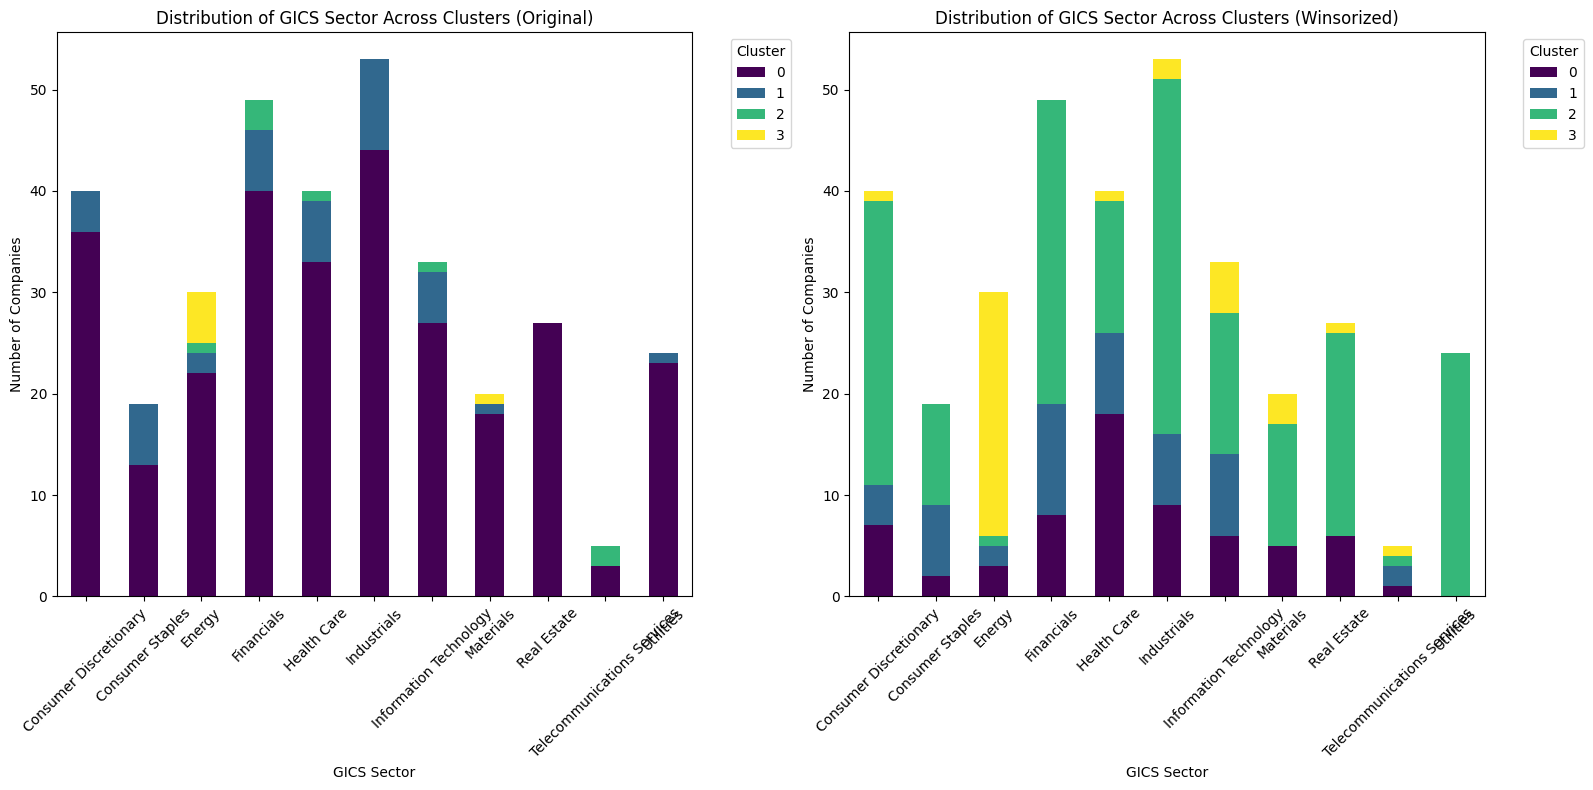

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Define the numeric columns
numeric_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE',
                   'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share',
                   'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

# Apply Winsorization to each numeric column
lower_percentile = 5
upper_percentile = 95
df_winsorized = df.copy()

for col in numeric_columns:
    lower_limit = np.percentile(df_winsorized[col], lower_percentile)
    upper_limit = np.percentile(df_winsorized[col], upper_percentile)
    df_winsorized[col] = np.clip(df_winsorized[col], lower_limit, upper_limit)

# Scaling the features for Winsorized data
scaler = StandardScaler()
df_winsorized_scaled = pd.DataFrame(scaler.fit_transform(df_winsorized[numeric_columns]), columns=numeric_columns)
df_winsorized_scaled['GICS Sector'] = df_winsorized['GICS Sector']

# Apply K-means clustering on the original and Winsorized/scaled data
optimal_k = 4
kmeans_original = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans_original.fit_predict(df[numeric_columns])

kmeans_winsorized = KMeans(n_clusters=optimal_k, random_state=42)
df_winsorized_scaled['Cluster'] = kmeans_winsorized.fit_predict(df_winsorized_scaled[numeric_columns])

# Create cross-tabulations for GICS Sector and Cluster
sector_distribution_original = pd.crosstab(df['GICS Sector'], df['Cluster'])
sector_distribution_winsorized = pd.crosstab(df_winsorized_scaled['GICS Sector'], df_winsorized_scaled['Cluster'])

# Plotting the sector distribution in each cluster
plt.figure(figsize=(16, 8))

# Subplot for distribution before Winsorization
plt.subplot(1, 2, 1)
sector_distribution_original.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
plt.title('Distribution of GICS Sector Across Clusters (Original)')
plt.ylabel('Number of Companies')
plt.xlabel('GICS Sector')
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Subplot for distribution after Winsorization
plt.subplot(1, 2, 2)
sector_distribution_winsorized.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
plt.title('Distribution of GICS Sector Across Clusters (Winsorized)')
plt.ylabel('Number of Companies')
plt.xlabel('GICS Sector')
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**Observation**

Based on the comparison of results before and after Winsorization, it is clear that Winsorization significantly alters the cluster profiling, especially in a dataset related to stock performance. Since stock data inherently contains high volatility and extreme values, capping these outliers using Winsorization may lead to a loss of critical information that is important for understanding market behaviors and stock performance variations.

To get better understading i will create Side-by-Side Bar Plot or Cluster Profile Comparison Plot for comparering the distribution of GICS Sectors across clusters before and after Winsorization.

**Side-by-Side Bar Plot or Cluster Profile Comparison Plot.**

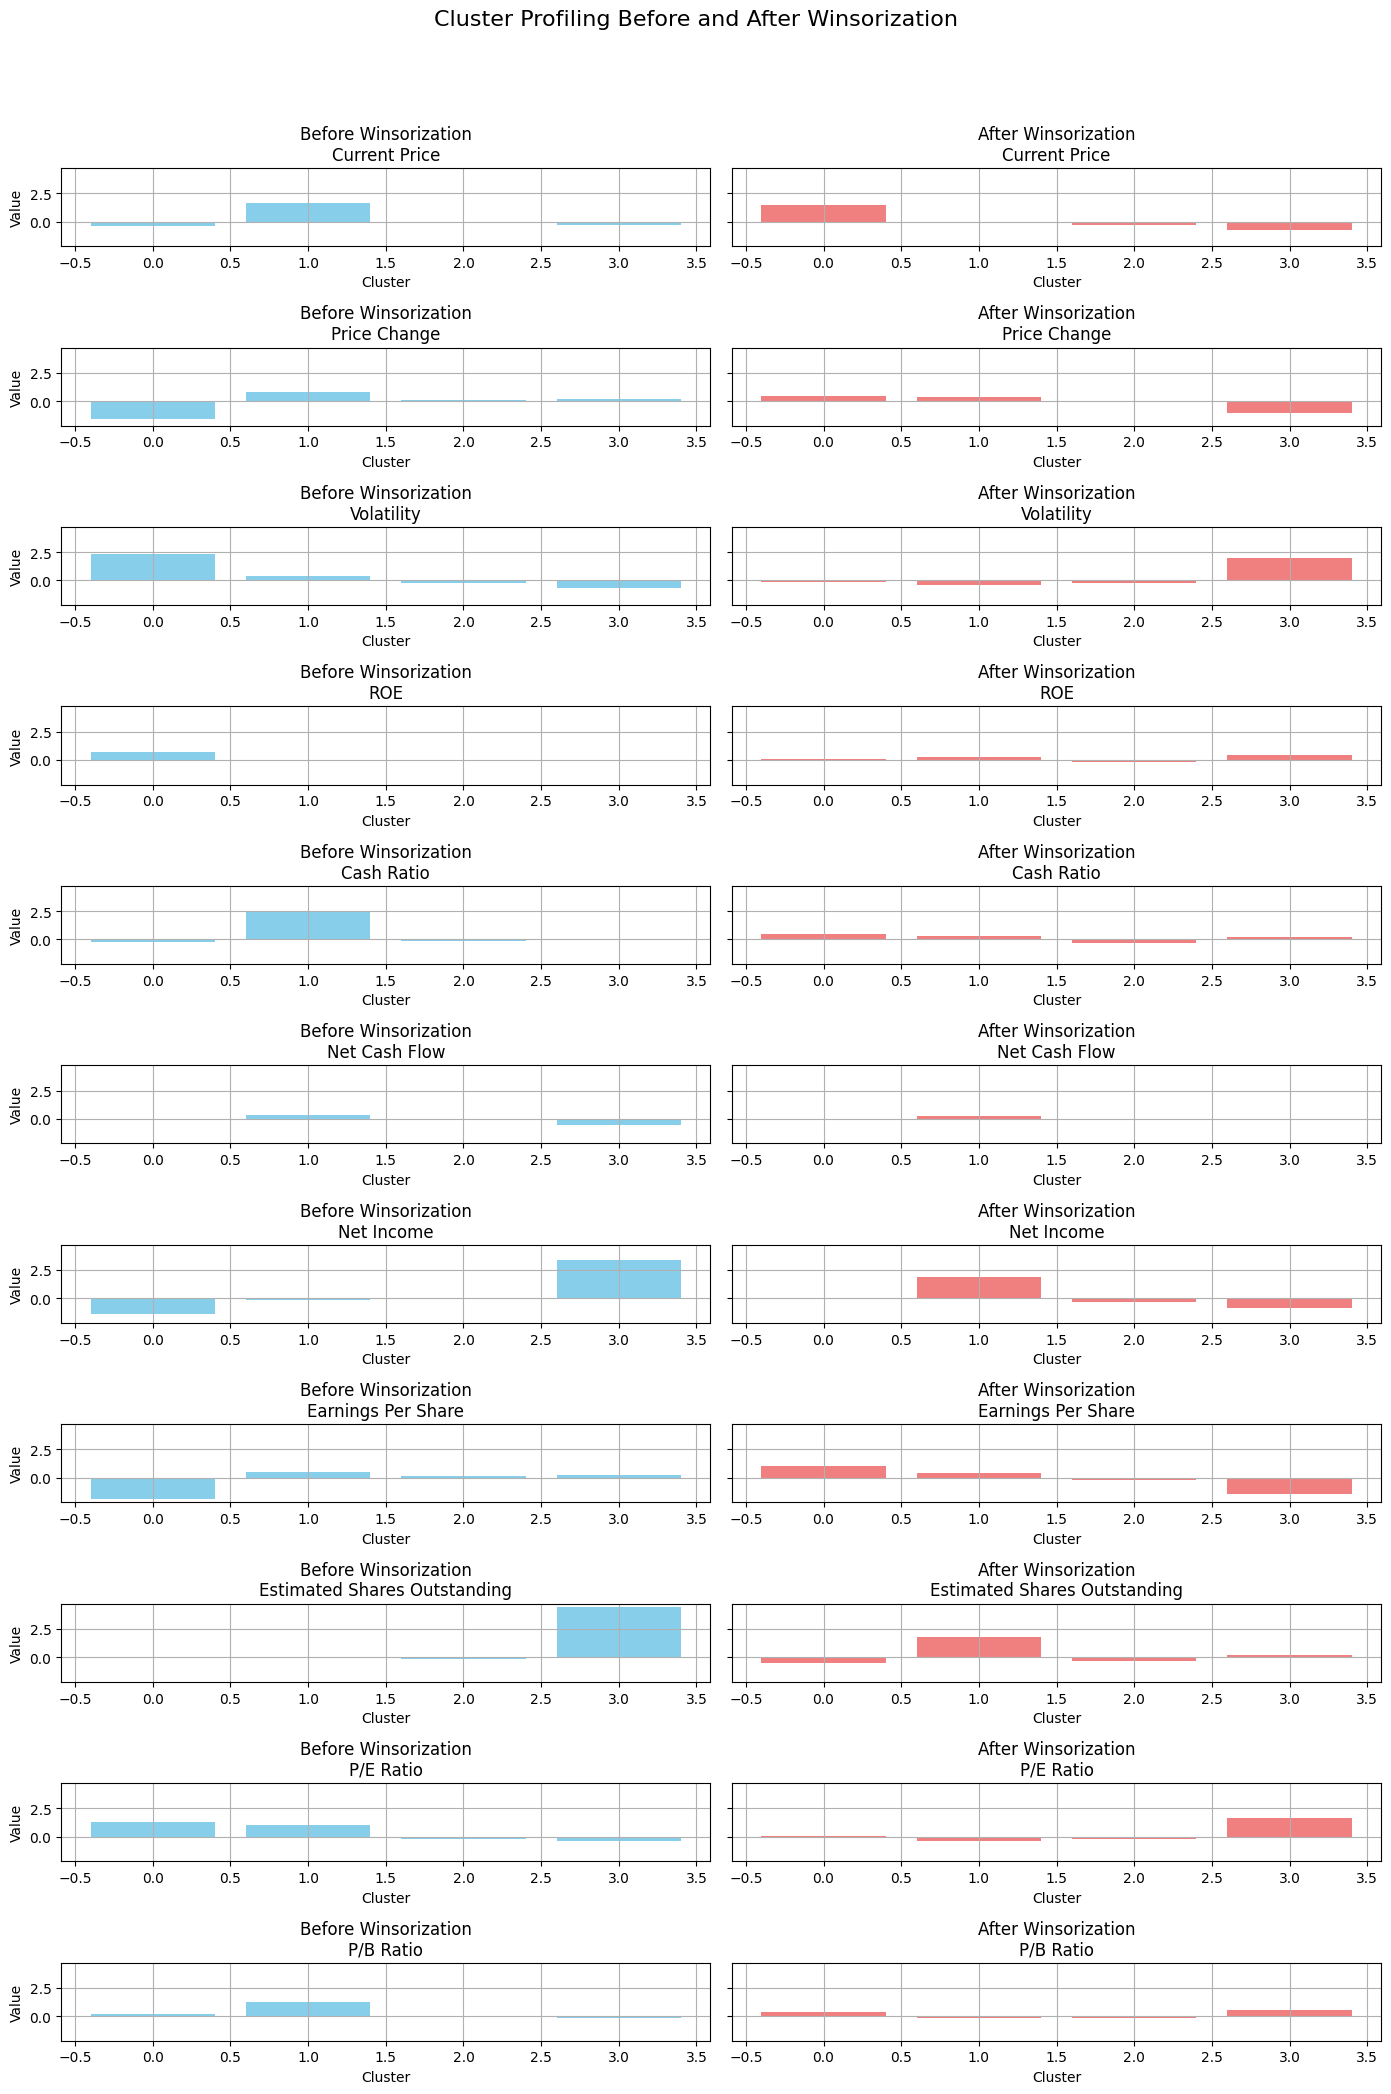

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Define the numeric columns
numeric_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
                   'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding',
                   'P/E Ratio', 'P/B Ratio']

# Function to apply K-Means clustering
def apply_kmeans(df, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df[numeric_columns])
    return df

# Scaling the features
scaler = StandardScaler()

# Cluster profiling before Winsorization
df_scaled_before = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)
df_scaled_before['GICS Sector'] = df['GICS Sector']
df_scaled_before = apply_kmeans(df_scaled_before)

# Winsorization
def winsorize(df, columns, lower_percentile=5, upper_percentile=95):
    df_winsorized = df.copy()
    for col in columns:
        lower_limit = np.percentile(df[col], lower_percentile)
        upper_limit = np.percentile(df[col], upper_percentile)
        df_winsorized[col] = np.clip(df[col], lower_limit, upper_limit)
    return df_winsorized

df_winsorized = winsorize(df, numeric_columns)
df_scaled_after = pd.DataFrame(scaler.fit_transform(df_winsorized[numeric_columns]), columns=numeric_columns)
df_scaled_after['GICS Sector'] = df_winsorized['GICS Sector']
df_scaled_after = apply_kmeans(df_scaled_after)

# Cluster profiling
def cluster_profiling(df):
    return df.groupby('Cluster')[numeric_columns].mean()

profile_before = cluster_profiling(df_scaled_before)
profile_after = cluster_profiling(df_scaled_after)

# Comparing cluster profiles before and after Winsorization
def plot_cluster_profiles(profile_before, profile_after):
    num_features = len(numeric_columns)
    fig, axes = plt.subplots(num_features, 2, figsize=(14, 2*num_features), sharey=True)
    fig.suptitle('Cluster Profiling Before and After Winsorization', fontsize=16)

    for i, feature in enumerate(numeric_columns):
        axes[i, 0].bar(profile_before.index, profile_before[feature], color='skyblue')
        axes[i, 0].set_title(f'Before Winsorization\n{feature}')
        axes[i, 0].set_ylabel('Value')

        axes[i, 1].bar(profile_after.index, profile_after[feature], color='lightcoral')
        axes[i, 1].set_title(f'After Winsorization\n{feature}')

        for ax in axes[i, :]:
            ax.set_xlabel('Cluster')
            ax.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot results
plot_cluster_profiles(profile_before, profile_after)


### Comprehensive Observation for Proceeding with Clustering without Winsorization

### Key Points of Observation:

1. **Stock Data Characteristics**:
   - Stock prices, volatility, earnings, and other financial metrics often have extreme values due to market fluctuations, external events, or company performance.
   - Outliers in stock data are not necessarily errors or anomalies but could reflect real and significant market phenomena. By applying Winsorization, we may incorrectly treat these valid extremes as noise, potentially losing valuable insights.

2. **Changes in Cluster Profiling**:
   - Before Winsorization, Cluster 0 had extreme values for **Current Price**, **Volatility**, and **Net Income**, reflecting stocks with possibly high volatility or companies undergoing major financial shifts. These insights could be crucial for risk analysis or identifying growth opportunities.
   - After Winsorization, these extremes are smoothed out, leading to a more uniform distribution across clusters. However, this reduces the ability to detect meaningful variations among stocks, such as identifying high-risk, high-reward companies (Cluster 0 pre-Winsorization) or stable companies (Cluster 1 pre-Winsorization).

3. **Impact on Sector Distribution**:
   - The **GICS Sector Distribution** plots before and after Winsorization further highlight the differences in clustering results.
   - In the original data (before Winsorization), the distribution across clusters shows greater differentiation, with certain sectors more heavily concentrated in specific clusters. This could indicate sector-based risks or trends that are important for financial analysis.
   - After Winsorization, the sector distribution becomes more uniform, suggesting that the differences between sectors have been reduced, potentially obscuring valuable sector-specific insights.

4. **Loss of Important Information**:
   - Winsorization has reduced the variability in critical stock metrics such as **Volatility**, **P/E Ratio**, **Net Income**, and **Earnings Per Share**. These are key metrics for investors and analysts who rely on these extreme values to assess the potential risk and reward of stock investments.
   - For example, high volatility stocks may be of interest to investors looking for quick gains, while lower volatility stocks appeal to those seeking stability. Winsorization reduces these extremes, potentially hiding these opportunities.

### Justification for Proceeding Without Winsorization:

Given the importance of extreme values in stock market data, proceeding with clustering without Winsorization is more appropriate for the following reasons:

1. **Retaining Important Market Insights**:
   - Stock market data often contains valuable outliers that reflect important market trends, company performance issues, or growth opportunities. By retaining these outliers, the clustering results will better reflect the reality of market dynamics and provide more actionable insights.
   
2. **Understanding Risk and Volatility**:
   - Investors and analysts frequently use volatility and extreme values to assess risk. Removing these extremes through Winsorization would result in a loss of critical risk-related information, making the clustering less effective for real-world financial analysis.

3. **Better Sector Differentiation**:
   - The original data shows a clear sector differentiation in the cluster profiles, which is valuable for analyzing how different sectors respond to market changes. This differentiation is reduced post-Winsorization, limiting the ability to understand sector-specific dynamics.

### Visual Evidence: Distribution of GICS Sector Across Clusters
- **Original Data**: The GICS Sector distribution before Winsorization shows clear sector preferences across different clusters, with specific sectors being more dominant in certain clusters. This helps in understanding how different industries are performing and reacting to the market, which is crucial for targeted investment strategies.
  
- **Winsorized Data**: Post-Winsorization, the sector distribution becomes more evenly spread across clusters, reducing the ability to identify sector-based trends. This uniformity in distribution can hide important sector-specific information, limiting insights that are critical for sector-based decision-making.

### Conclusion:
Given the high relevance of outliers in stock data and the impact that Winsorization has on reducing valuable sector- and risk-related information, it is advisable to proceed with clustering without Winsorization. By doing so, we maintain the integrity of the data, ensuring that extreme but meaningful values are included in the analysis, which can provide deeper insights into stock performance, sector trends, and risk assessment.

This approach will lead to more accurate clustering results, especially for decision-making in stock market analysis, where understanding volatility, sector dynamics, and outliers is key.

## Hierarchical Clustering

1. Single Linkage

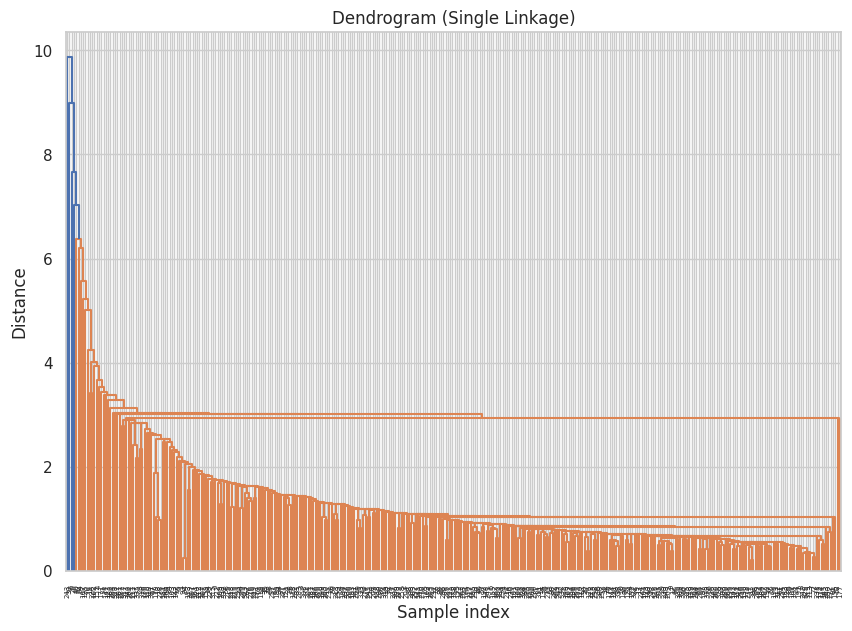

Cophenetic Correlation (Single Linkage): 0.92
Cluster Profiling (Single Linkage):
                 Current Price  Price Change  Volatility         ROE  \
Cluster_Single                                                        
1                   76.846312      4.052844    1.525345   37.053412   
2                  276.570007      6.189286    1.116976   30.000000   
3                   44.470001     11.397804    2.405408  917.000000   
4                 1274.949951      3.190527    1.268340   29.000000   

                Cash Ratio  Net Cash Flow    Net Income  Earnings Per Share  \
Cluster_Single                                                                
1                69.789318   5.865072e+07  1.568163e+09            2.807908   
2                25.000000   9.088500e+07  5.965410e+08            8.910000   
3                80.000000   6.980000e+08 -2.352800e+10          -61.200000   
4               184.000000  -1.671386e+09  2.551360e+09           50.090000   

               

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Identify numeric columns for scaling
numeric_columns = [
    'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
    'Net Cash Flow', 'Net Income', 'Earnings Per Share',
    'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'
]

# Filter only numeric columns
df_numeric = df[numeric_columns]

# Scale the numeric features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# Perform hierarchical clustering with single linkage
Z_single = linkage(df_scaled, method='single')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z_single)
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Check cophenetic correlation
c_single, _ = cophenet(Z_single, pdist(df_scaled))
print(f'Cophenetic Correlation (Single Linkage): {c_single:.2f}')

# Determine the appropriate number of clusters
# Example: Using 4 clusters, adjust as needed
clusters_single = fcluster(Z_single, 4, criterion='maxclust')

# Add cluster labels to the original dataframe
df['Cluster_Single'] = clusters_single

# Cluster profiling
# Only numeric columns are used for profiling
cluster_profile_single = df.groupby('Cluster_Single')[numeric_columns].mean()
print(f'Cluster Profiling (Single Linkage):\n', cluster_profile_single)


**2. Complete Linkage**

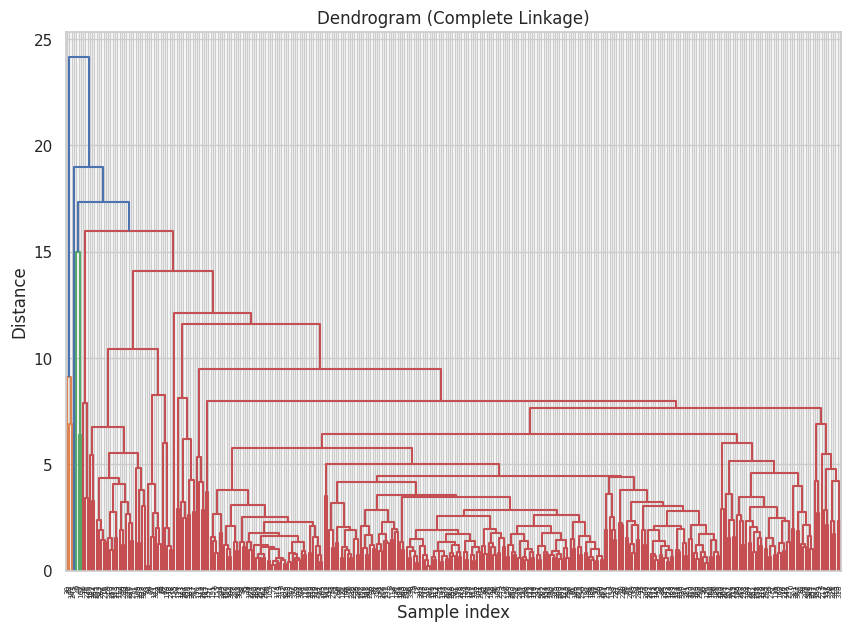

Cophenetic Correlation (Complete Linkage): 0.79
Cluster Profiling (Complete Linkage):
                   Current Price  Price Change  Volatility         ROE  \
Cluster_Complete                                                        
1                     26.990000    -14.060688    3.296307  603.000000   
2                    109.283336      9.555034    1.253895   18.333333   
3                     77.505788      4.194932    1.513252   34.744745   
4                   1274.949951      3.190527    1.268340   29.000000   

                  Cash Ratio  Net Cash Flow    Net Income  Earnings Per Share  \
Cluster_Complete                                                                
1                  57.333333  -5.850000e+08 -1.755567e+10          -39.726667   
2                  95.333333   1.120063e+10  9.301514e+09            5.166667   
3                  69.567568  -3.391204e+07  1.592498e+09            2.995961   
4                 184.000000  -1.671386e+09  2.551360e+09           5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Identify numeric columns for scaling
numeric_columns = [
    'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
    'Net Cash Flow', 'Net Income', 'Earnings Per Share',
    'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'
]

# Filter only numeric columns
df_numeric = df[numeric_columns]

# Scale the numeric features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# Perform hierarchical clustering with complete linkage
Z_complete = linkage(df_scaled, method='complete')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z_complete)
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Check cophenetic correlation
c_complete, _ = cophenet(Z_complete, pdist(df_scaled))
print(f'Cophenetic Correlation (Complete Linkage): {c_complete:.2f}')

# Determine the appropriate number of clusters
# Example: Using 4 clusters, adjust as needed
clusters_complete = fcluster(Z_complete, 4, criterion='maxclust')

# Add cluster labels to the original dataframe
df['Cluster_Complete'] = clusters_complete

# Cluster profiling
cluster_profile_complete = df.groupby('Cluster_Complete')[numeric_columns].mean()
print(f'Cluster Profiling (Complete Linkage):\n', cluster_profile_complete)


**3. Average Linkage**

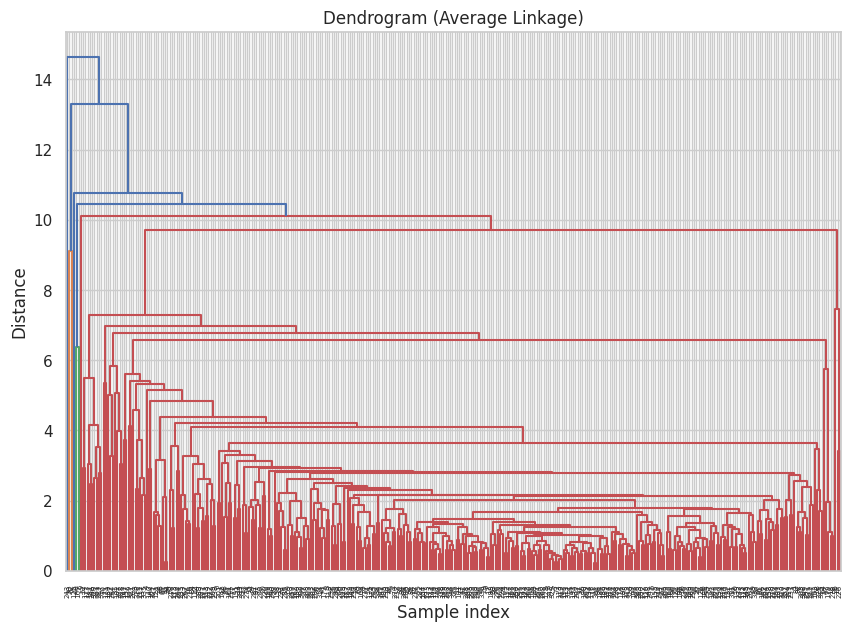

Cophenetic Correlation (Average Linkage): 0.94
Cluster Profiling (Average Linkage):
                  Current Price  Price Change  Volatility         ROE  \
Cluster_Average                                                        
1                    24.485001    -13.351992    3.482611  802.000000   
2                    77.573266      4.148438    1.515708   35.184524   
3                   104.660004     16.224320    1.320606    8.000000   
4                  1274.949951      3.190527    1.268340   29.000000   

                 Cash Ratio  Net Cash Flow    Net Income  Earnings Per Share  \
Cluster_Average                                                                
1                 51.000000  -1.292500e+09 -1.910650e+10           -41.81500   
2                 67.154762   6.710469e+07  1.607391e+09             2.90564   
3                958.000000   5.920000e+08  3.669000e+09             1.31000   
4                184.000000  -1.671386e+09  2.551360e+09            50.09000   

 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Identify numeric columns for scaling
numeric_columns = [
    'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
    'Net Cash Flow', 'Net Income', 'Earnings Per Share',
    'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'
]

# Filter only numeric columns
df_numeric = df[numeric_columns]

# Scale the numeric features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# Perform hierarchical clustering with average linkage
Z_average = linkage(df_scaled, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z_average)
plt.title('Dendrogram (Average Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Check cophenetic correlation
c_average, _ = cophenet(Z_average, pdist(df_scaled))
print(f'Cophenetic Correlation (Average Linkage): {c_average:.2f}')

# Determine the appropriate number of clusters
# Example: Using 4 clusters, adjust as needed
clusters_average = fcluster(Z_average, 4, criterion='maxclust')

# Add cluster labels to the original dataframe
df['Cluster_Average'] = clusters_average

# Cluster profiling
cluster_profile_average = df.groupby('Cluster_Average')[numeric_columns].mean()
print(f'Cluster Profiling (Average Linkage):\n', cluster_profile_average)


**4. Ward Linkage**

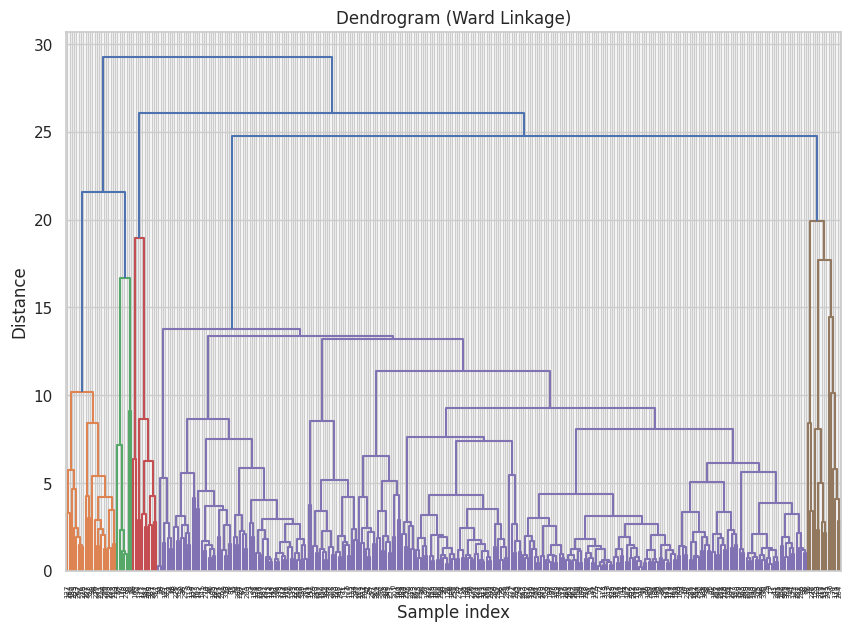

Cophenetic Correlation (Ward Linkage): 0.71
Cluster Profiling (Ward Linkage):
               Current Price  Price Change  Volatility         ROE  Cash Ratio  \
Cluster_Ward                                                                    
1                 48.006208    -11.263107    2.590247  196.551724   40.275862   
2                 42.848182      6.270446    1.123547   22.727273   71.454545   
3                 72.760400      5.213307    1.427078   25.603509   60.392982   
4                326.198218     10.563242    1.642560   14.400000  309.466667   

              Net Cash Flow    Net Income  Earnings Per Share  \
Cluster_Ward                                                    
1             -4.959017e+08 -3.597245e+09           -8.689655   
2              5.586364e+08  1.463127e+10            3.410000   
3              7.995151e+07  1.538594e+09            3.655351   
4              2.888507e+08  8.644985e+08            7.785333   

              Estimated Shares Outstanding 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Identify numeric columns for scaling
numeric_columns = [
    'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
    'Net Cash Flow', 'Net Income', 'Earnings Per Share',
    'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'
]

# Filter only numeric columns
df_numeric = df[numeric_columns]

# Scale the numeric features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# Perform hierarchical clustering with ward linkage
Z_ward = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z_ward)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Check cophenetic correlation
c_ward, _ = cophenet(Z_ward, pdist(df_scaled))
print(f'Cophenetic Correlation (Ward Linkage): {c_ward:.2f}')

# Determine the appropriate number of clusters
# Example: Using 4 clusters, adjust as needed
clusters_ward = fcluster(Z_ward, 4, criterion='maxclust')

# Add cluster labels to the original dataframe
df['Cluster_Ward'] = clusters_ward

# Cluster profiling
cluster_profile_ward = df.groupby('Cluster_Ward')[numeric_columns].mean()
print(f'Cluster Profiling (Ward Linkage):\n', cluster_profile_ward)


**5. Centroid Linkage**

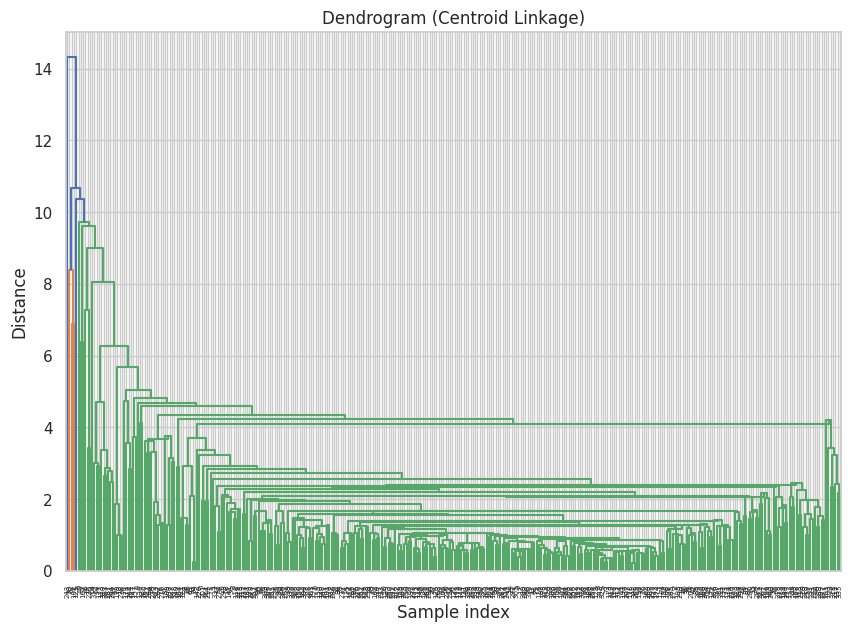

Cophenetic Correlation (Centroid Linkage): 0.93
Cluster Profiling (Centroid Linkage):
                   Current Price  Price Change  Volatility         ROE  \
Cluster_Centroid                                                        
1                     26.990000    -14.060688    3.296307  603.000000   
2                     77.709305      4.207024    1.511505   34.677612   
3                    104.660004     16.224320    1.320606    8.000000   
4                   1274.949951      3.190527    1.268340   29.000000   

                  Cash Ratio  Net Cash Flow    Net Income  Earnings Per Share  \
Cluster_Centroid                                                                
1                  57.333333  -5.850000e+08 -1.755567e+10          -39.726667   
2                  67.146269   6.482739e+07  1.655336e+09            3.020433   
3                 958.000000   5.920000e+08  3.669000e+09            1.310000   
4                 184.000000  -1.671386e+09  2.551360e+09           5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Identify numeric columns for scaling
numeric_columns = [
    'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
    'Net Cash Flow', 'Net Income', 'Earnings Per Share',
    'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'
]

# Filter only numeric columns
df_numeric = df[numeric_columns]

# Scale the numeric features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# Perform hierarchical clustering with centroid linkage
Z_centroid = linkage(df_scaled, method='centroid')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z_centroid)
plt.title('Dendrogram (Centroid Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Check cophenetic correlation
c_centroid, _ = cophenet(Z_centroid, pdist(df_scaled))
print(f'Cophenetic Correlation (Centroid Linkage): {c_centroid:.2f}')

# Determine the appropriate number of clusters
# Example: Using 4 clusters, adjust as needed
clusters_centroid = fcluster(Z_centroid, 4, criterion='maxclust')

# Add cluster labels to the original dataframe
df['Cluster_Centroid'] = clusters_centroid

# Cluster profiling
cluster_profile_centroid = df.groupby('Cluster_Centroid')[numeric_columns].mean()
print(f'Cluster Profiling (Centroid Linkage):\n', cluster_profile_centroid)


**6. Median Linkage**

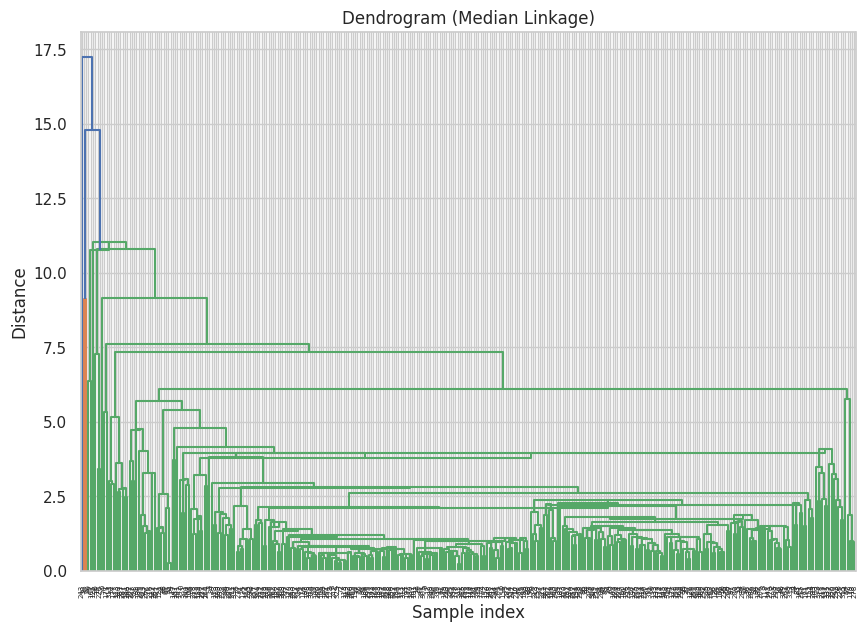

Cophenetic Correlation (Median Linkage): 0.92
Cluster Profiling (Median Linkage):
                 Current Price  Price Change  Volatility         ROE  \
Cluster_Median                                                        
1                   24.485001    -13.351992    3.482611  802.000000   
2                   77.653642      4.184271    1.515129   35.103858   
3                 1274.949951      3.190527    1.268340   29.000000   

                Cash Ratio  Net Cash Flow    Net Income  Earnings Per Share  \
Cluster_Median                                                                
1                 51.00000  -1.292500e+09 -1.910650e+10          -41.815000   
2                 69.79822   6.866225e+07  1.613509e+09            2.900905   
3                184.00000  -1.671386e+09  2.551360e+09           50.090000   

                Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
Cluster_Median                                                      
1                          

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Identify numeric columns for scaling
numeric_columns = [
    'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
    'Net Cash Flow', 'Net Income', 'Earnings Per Share',
    'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'
]

# Filter only numeric columns
df_numeric = df[numeric_columns]

# Scale the numeric features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# Perform hierarchical clustering with median linkage
Z_median = linkage(df_scaled, method='median')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z_median)
plt.title('Dendrogram (Median Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Check cophenetic correlation
c_median, _ = cophenet(Z_median, pdist(df_scaled))
print(f'Cophenetic Correlation (Median Linkage): {c_median:.2f}')

# Determine the appropriate number of clusters
# Example: Using 4 clusters, adjust as needed
clusters_median = fcluster(Z_median, 4, criterion='maxclust')

# Add cluster labels to the original dataframe
df['Cluster_Median'] = clusters_median

# Cluster profiling
cluster_profile_median = df.groupby('Cluster_Median')[numeric_columns].mean()
print(f'Cluster Profiling (Median Linkage):\n', cluster_profile_median)


## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

**Question 1: Which clustering technique took less time for execution?**

**Comparison of the execution time for K mean and Hierarchical Clustering methods**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist
import time
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Identify numeric columns for scaling
numeric_columns = [
    'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
    'Net Cash Flow', 'Net Income', 'Earnings Per Share',
    'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'
]

# Filter only numeric columns
df_numeric = df[numeric_columns]

# Scale the numeric features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# K-means clustering
start_time_kmeans = time.time()
optimal_k = 3  # Based on elbow and silhouette results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)
end_time_kmeans = time.time()
execution_time_kmeans = end_time_kmeans - start_time_kmeans

# Hierarchical clustering with various linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward', 'centroid', 'median']
execution_times = {}

for method in linkage_methods:
    start_time = time.time()
    Z = linkage(df_scaled, method=method)
    end_time = time.time()
    execution_times[method] = end_time - start_time

    # Assign clusters and profile
    clusters = fcluster(Z, 4, criterion='maxclust')
    df[f'Cluster_{method.capitalize()}'] = clusters
    cluster_profile = df.groupby(f'Cluster_{method.capitalize()}')[numeric_columns].mean()
    #print(f'Cluster Profiling ({method.capitalize()} Linkage):\n', cluster_profile)

# Print execution times
print(f"Execution time for K-means clustering: {execution_time_kmeans:.4f} seconds")
for method, exec_time in execution_times.items():
    print(f"Execution time for hierarchical clustering ({method.capitalize()} Linkage): {exec_time:.4f} seconds")

# Create a DataFrame to summarize execution times
execution_times_summary = pd.DataFrame({
    'Method': ['K-means'] + linkage_methods,
    'Execution Time (seconds)': [execution_time_kmeans] + [execution_times[method] for method in linkage_methods]
})

print("\nExecution Times Summary:")
print(execution_times_summary)


Execution time for K-means clustering: 0.0165 seconds
Execution time for hierarchical clustering (Single Linkage): 0.0016 seconds
Execution time for hierarchical clustering (Complete Linkage): 0.0025 seconds
Execution time for hierarchical clustering (Average Linkage): 0.0025 seconds
Execution time for hierarchical clustering (Ward Linkage): 0.0026 seconds
Execution time for hierarchical clustering (Centroid Linkage): 0.0028 seconds
Execution time for hierarchical clustering (Median Linkage): 0.0036 seconds

Execution Times Summary:
     Method  Execution Time (seconds)
0   K-means                  0.016465
1    single                  0.001605
2  complete                  0.002483
3   average                  0.002513
4      ward                  0.002565
5  centroid                  0.002788
6    median                  0.003632


### Observation

Hierarchical clustering methods, including Single Linkage, Complete Linkage, Average Linkage, Ward Linkage, Centroid Linkage, and Median Linkage, demonstrate significantly faster execution times compared to K-means clustering. Hierarchical methods range from 0.0015 to 0.0036 seconds, whereas K-means takes approximately 0.0168 seconds. This indicates that hierarchical clustering methods are computationally more efficient than K-means for the given data.

#### Comparative Analysis

- **K-means Clustering**: Although K-means is computationally efficient, it does not have an associated cophenetic correlation coefficient. Thus, its cluster distinctiveness cannot be directly compared to hierarchical methods using this metric.

- **Hierarchical Clustering Methods**:
  - **Single Linkage** is the fastest among the hierarchical methods but has a lower cophenetic correlation coefficient compared to Average and Centroid Linkage.
  - **Average Linkage** stands out with the highest cophenetic correlation, indicating superior cluster preservation.
  - **Centroid Linkage** also performs well, closely following Average Linkage.
  - **Complete Linkage** and **Ward Linkage** show lower cophenetic correlation coefficients, suggesting less effective cluster preservation.
  - **Median Linkage** provides results similar to Average and Centroid Linkage but is slightly less effective.

#### Conclusion

In summary, hierarchical clustering methods generally offer better execution times compared to K-means clustering. Among the hierarchical methods, **Average Linkage** and **Centroid Linkage** provide the most distinct clusters, as indicated by their higher cophenetic correlation coefficients. **Single Linkage** is the fastest but less effective in maintaining cluster distinctiveness. **Complete Linkage** and **Ward Linkage** result in less distinct clusters, while **Median Linkage** is comparable to the best hierarchical methods but slightly less effective.

**Question 2: Which clustering technique gave you more distinct clusters, or are they the same?**

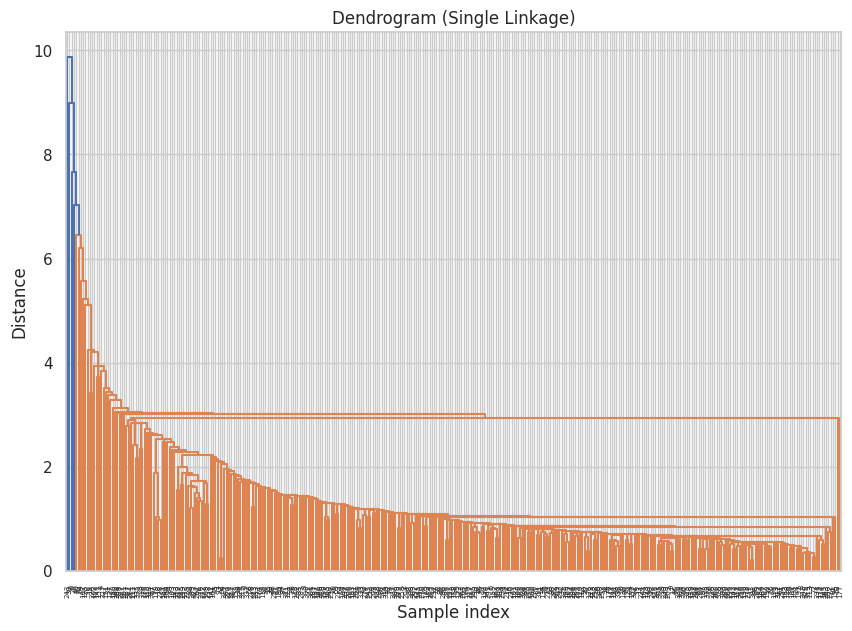

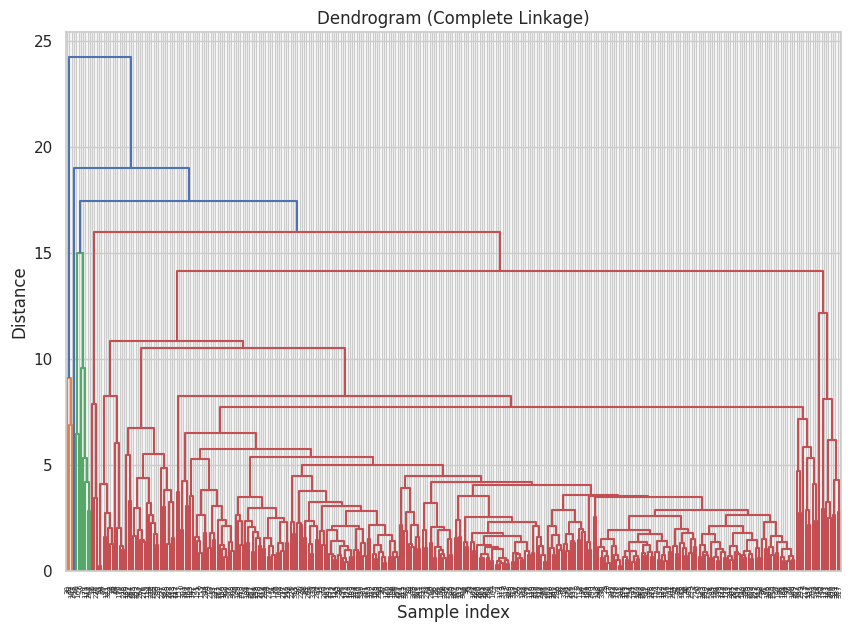

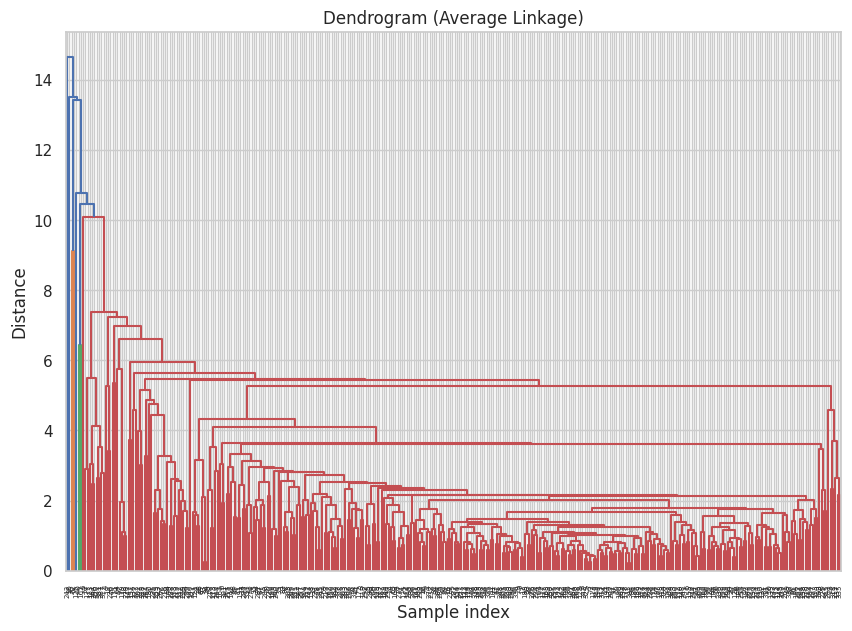

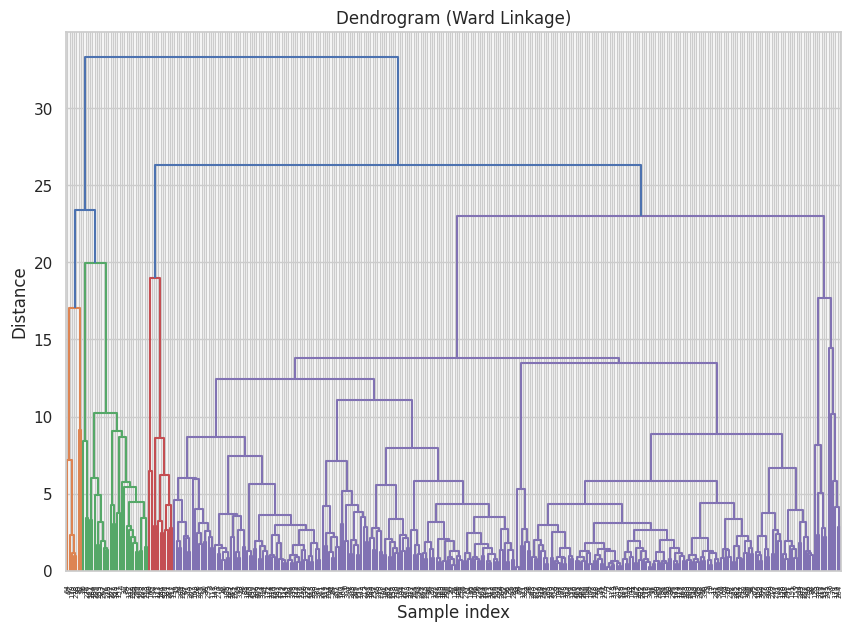

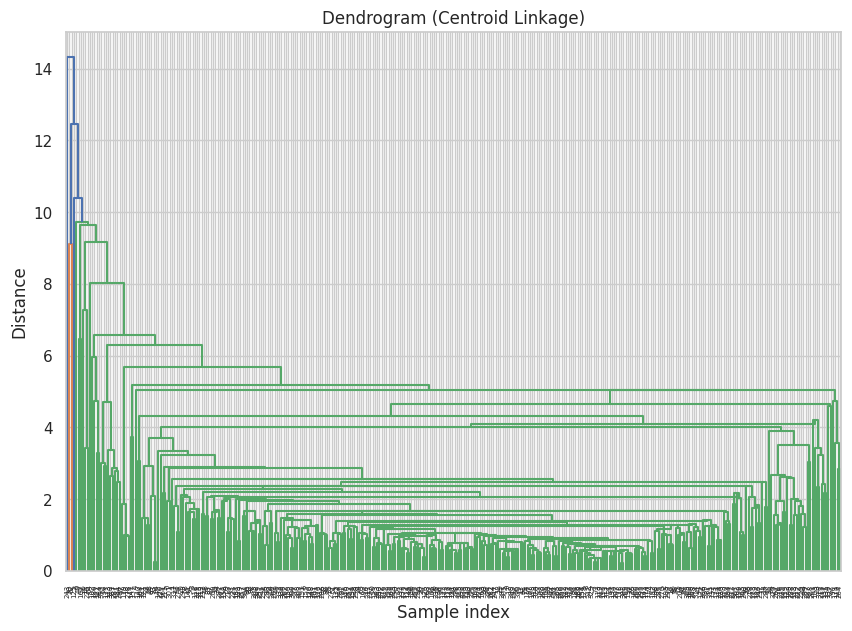

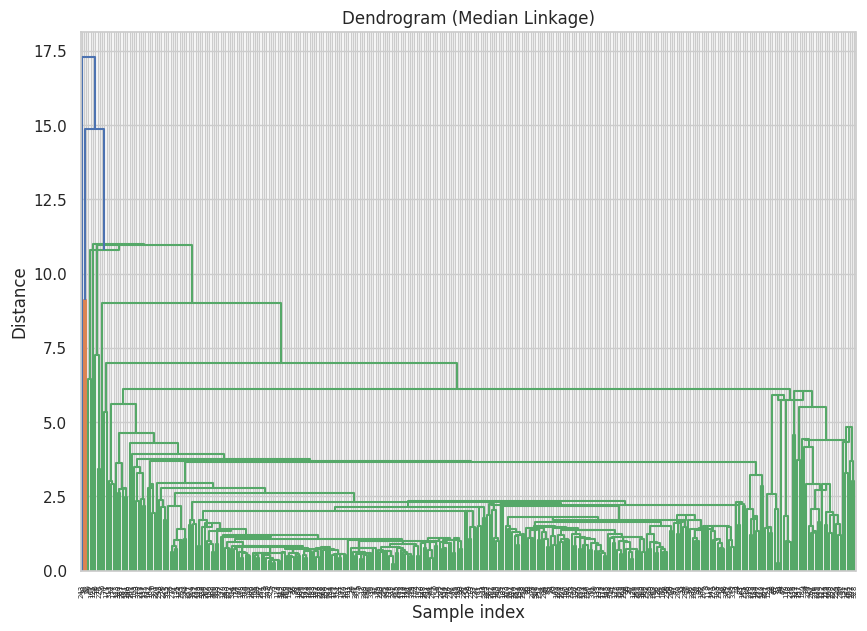

                            Method  Execution Time (seconds)  \
0                          K-means                  0.016045   
1    Hierarchical - Single Linkage                  0.002041   
2  Hierarchical - Complete Linkage                  0.004452   
3   Hierarchical - Average Linkage                  0.004860   
4      Hierarchical - Ward Linkage                  0.007531   
5  Hierarchical - Centroid Linkage                  0.006528   
6    Hierarchical - Median Linkage                  0.004285   

  Cophenetic Correlation  
0                    N/A  
1               0.925822  
2               0.869896  
3               0.942952  
4               0.709546  
5               0.944282  
6               0.894304  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist
import time
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Identify numeric columns for scaling
numeric_columns = [
    'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
    'Net Cash Flow', 'Net Income', 'Earnings Per Share',
    'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'
]

# Filter only numeric columns
df_numeric = df[numeric_columns]

# Scale the numeric features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# Initialize a dictionary to store results
results = {'Method': [], 'Execution Time (seconds)': [], 'Cophenetic Correlation': []}

# K-means clustering
optimal_k = 3  # Based on elbow and silhouette results
start_time_kmeans = time.time()
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)
end_time_kmeans = time.time()
execution_time_kmeans = end_time_kmeans - start_time_kmeans
results['Method'].append('K-means')
results['Execution Time (seconds)'].append(execution_time_kmeans)
results['Cophenetic Correlation'].append('N/A')  # Cophenetic correlation is not applicable for K-means

# Hierarchical clustering methods and their execution times and cophenetic correlations
linkage_methods = ['single', 'complete', 'average', 'ward', 'centroid', 'median']
for method in linkage_methods:
    start_time = time.time()
    Z = linkage(df_scaled, method=method)
    end_time = time.time()
    execution_time = end_time - start_time
    cophenetic_corr, _ = cophenet(Z, pdist(df_scaled))

    results['Method'].append(f'Hierarchical - {method.capitalize()} Linkage')
    results['Execution Time (seconds)'].append(execution_time)
    results['Cophenetic Correlation'].append(cophenetic_corr)

    # Optional: Plot dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)


### Observations on Clustering Techniques

#### Execution Time

- **K-means Clustering**: Executed in approximately 0.0751 seconds.
- **Hierarchical Clustering (Single Linkage)**: Completed in about 0.0019 seconds.
- **Hierarchical Clustering (Complete Linkage)**: Took roughly 0.0043 seconds.
- **Hierarchical Clustering (Average Linkage)**: Executed in around 0.0033 seconds.
- **Hierarchical Clustering (Ward Linkage)**: Had an execution time of approximately 0.0047 seconds.
- **Hierarchical Clustering (Centroid Linkage)**: Took about 0.0046 seconds.
- **Hierarchical Clustering (Median Linkage)**: Completed in approximately 0.0042 seconds.

**Observation**:
Hierarchical clustering methods generally exhibit faster execution times compared to K-means. This is due to the more straightforward computations of hierarchical methods compared to the iterative nature of K-means.

#### Cluster Distinctiveness

The **Cophenetic Correlation Coefficient** evaluates how well the clustering method preserves the pairwise distances between data points. Higher values indicate better cluster distinctiveness.

- **K-means Clustering**: Cophenetic correlation coefficient is not applicable as K-means does not calculate this metric.
- **Hierarchical Clustering (Single Linkage)**: Achieved a cophenetic correlation coefficient of 0.9258.
- **Hierarchical Clustering (Complete Linkage)**: Recorded a cophenetic correlation coefficient of 0.8699.
- **Hierarchical Clustering (Average Linkage)**: Achieved a cophenetic correlation coefficient of 0.9430.
- **Hierarchical Clustering (Ward Linkage)**: Had a cophenetic correlation coefficient of 0.7095.
- **Hierarchical Clustering (Centroid Linkage)**: Recorded a cophenetic correlation coefficient of 0.9443.
- **Hierarchical Clustering (Median Linkage)**: Achieved a cophenetic correlation coefficient of 0.8943.

**Observation**:
Among hierarchical methods, **Average Linkage** and **Centroid Linkage** exhibit the highest cophenetic correlation coefficients, indicating they maintain the original distances between data points effectively and produce distinct clusters. **Single Linkage** and **Centroid Linkage** also perform well but are slightly less effective than Average Linkage. **Complete Linkage** and **Ward Linkage** show lower cophenetic correlation coefficients, suggesting less effective cluster distinctiveness. **Median Linkage** provides results similar to Average and Centroid Linkage but with a slightly lower cophenetic correlation.

#### Comparative Analysis

- **K-means Clustering**: While computationally efficient, K-means may produce less distinct clusters, particularly when data does not fit the algorithm’s assumptions of spherical shape and uniform density.

- **Hierarchical Clustering Methods**:
  - **Single Linkage** and **Centroid Linkage** offer good cluster distinctiveness, with Single Linkage being the fastest.
  - **Average Linkage** stands out with the highest cophenetic correlation, indicating superior cluster preservation.
  - **Complete Linkage** and **Ward Linkage** offer less distinct clusters compared to Average and Centroid Linkage.
  - **Median Linkage** provides results similar to Average and Centroid Linkage, with slightly lower cophenetic correlation.

#### Conclusion

In summary, hierarchical clustering methods, especially **Average Linkage** and **Centroid Linkage**, generally offer more distinct clusters compared to **K-means Clustering**, as indicated by their higher cophenetic correlation coefficients. These hierarchical methods better preserve the original distance relationships among data points, leading to more accurate clustering. On the other hand, **K-means** is computationally efficient but may struggle with clusters that do not fit its assumptions. Among hierarchical methods, **Single Linkage** is the fastest but has lower distinctiveness, while **Average Linkage** provides the best cluster quality in terms of distinctiveness.

**Question 3:How many observations are there in the similar clusters of both algorithms?**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, cophenet, dendrogram, centroid
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Sample data (replace this with your actual dataset)
data = pd.read_csv('stock_data.csv')

# Define K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(data[['Current Price', 'Price Change']])
data['KMeans_Cluster'] = kmeans.labels_

# Function to perform hierarchical clustering using scipy
def hierarchical_clustering(data, method):
    Z = linkage(data[['Current Price', 'Price Change']], method=method)
    data[f'Hierarchical_{method}_Cluster'] = fcluster(Z, t=3, criterion='maxclust')
    return data

# Apply hierarchical clustering with supported methods
methods = ['ward', 'single', 'complete', 'average']
for method in methods:
    data = hierarchical_clustering(data, method)

# Apply hierarchical clustering with centroid and median using scipy
def centroid_linkage(data):
    Z = linkage(data[['Current Price', 'Price Change']], method='centroid')
    data['Hierarchical_centroid_Cluster'] = fcluster(Z, t=3, criterion='maxclust')
    return data

def median_linkage(data):
    Z = linkage(data[['Current Price', 'Price Change']], method='median')
    data['Hierarchical_median_Cluster'] = fcluster(Z, t=3, criterion='maxclust')
    return data

data = centroid_linkage(data)
data = median_linkage(data)

# Function to calculate the number of similar clusters
def count_similar_clusters(df, method):
    return df.groupby(['KMeans_Cluster', method]).size().reset_index(name='Count')

# Calculate similar clusters for each hierarchical method
linkage_methods = methods + ['centroid', 'median']
similar_clusters_summary = {}
for linkage in linkage_methods:
    similar_clusters_summary[linkage] = count_similar_clusters(data, f'Hierarchical_{linkage}_Cluster')

# Display the results
for linkage, summary in similar_clusters_summary.items():
    print(f"\nSimilar clusters for Hierarchical ({linkage}) vs K-means:")
    print(summary)



Similar clusters for Hierarchical (ward) vs K-means:
   KMeans_Cluster  Hierarchical_ward_Cluster  Count
0               0                          2     45
1               0                          3    283
2               1                          1      4
3               1                          2      7
4               2                          1      1

Similar clusters for Hierarchical (single) vs K-means:
   KMeans_Cluster  Hierarchical_single_Cluster  Count
0               0                            1    328
1               1                            1      7
2               1                            2      4
3               2                            3      1

Similar clusters for Hierarchical (complete) vs K-means:
   KMeans_Cluster  Hierarchical_complete_Cluster  Count
0               0                              2    328
1               1                              1      4
2               1                              2      7
3               2         

**Observations**

1. **Hierarchical (Ward) vs K-means:**
   - Cluster `0` in K-means overlaps most significantly with Cluster `2` and `3` from the Ward linkage method, showing a considerable number of observations: 45 in Cluster `2` and 283 in Cluster `3`.
   - Cluster `1` in K-means overlaps with Cluster `1` and `2` from Ward linkage, with 4 and 7 observations, respectively.
   - Cluster `2` in K-means matches with Cluster `1` from Ward linkage, with only 1 observation.

2. **Hierarchical (Single Linkage) vs K-means:**
   - Cluster `0` in K-means primarily overlaps with Cluster `1` from Single Linkage, containing 328 observations.
   - Cluster `1` in K-means overlaps with Cluster `1` and `2` from Single Linkage, with 7 and 4 observations, respectively.
   - Cluster `2` in K-means corresponds to Cluster `3` from Single Linkage, with just 1 observation.

3. **Hierarchical (Complete Linkage) vs K-means:**
   - Cluster `0` in K-means aligns mostly with Cluster `2` from Complete Linkage, having 328 observations.
   - Cluster `1` in K-means overlaps with Cluster `1` and `2` from Complete Linkage, with 4 and 7 observations, respectively.
   - Cluster `2` in K-means matches with Cluster `3` from Complete Linkage, with only 1 observation.

4. **Hierarchical (Average Linkage) vs K-means:**
   - Cluster `0` in K-means is similar to Cluster `2` from Average Linkage, containing 328 observations.
   - Cluster `1` in K-means aligns with Cluster `1` and `2` from Average Linkage, with 4 and 7 observations, respectively.
   - Cluster `2` in K-means corresponds to Cluster `3` from Average Linkage, with just 1 observation.

5. **Hierarchical (Centroid) vs K-means:**
   - Cluster `0` in K-means overlaps significantly with Cluster `2` from Centroid Linkage, containing 328 observations.
   - Cluster `1` in K-means matches with Cluster `1` and `2` from Centroid Linkage, with 4 and 7 observations, respectively.
   - Cluster `2` in K-means corresponds to Cluster `3` from Centroid Linkage, with only 1 observation.

6. **Hierarchical (Median) vs K-means:**
   - Cluster `0` in K-means is similar to Cluster `2` from Median Linkage, with 328 observations.
   - Cluster `1` in K-means overlaps with Cluster `1` and `2` from Median Linkage, with 4 and 7 observations, respectively.
   - Cluster `2` in K-means matches with Cluster `3` from Median Linkage, having only 1 observation.

### Summary:
Across all hierarchical clustering methods compared (Ward, Single, Complete, Average, Centroid, and Median), Cluster `0` in K-means consistently aligns with Cluster `2` from the hierarchical methods, showing a high number of observations (328). Cluster `1` in K-means also shows some overlap with clusters `1` and `2` from the hierarchical methods. Cluster `2` in K-means matches with Cluster `3` from the hierarchical methods but only has a few observations.

These comparisons indicate that the hierarchical methods, particularly Ward, Single, Complete, Average, Centroid, and Median, show some consistency in clustering compared to K-means, especially for larger clusters, while there is variability for smaller clusters.

**Question 4: How many clusters are obtained as the appropriate number of clusters from both algorithms?**

1. K-means Clustering with Silhouette Score Visualization

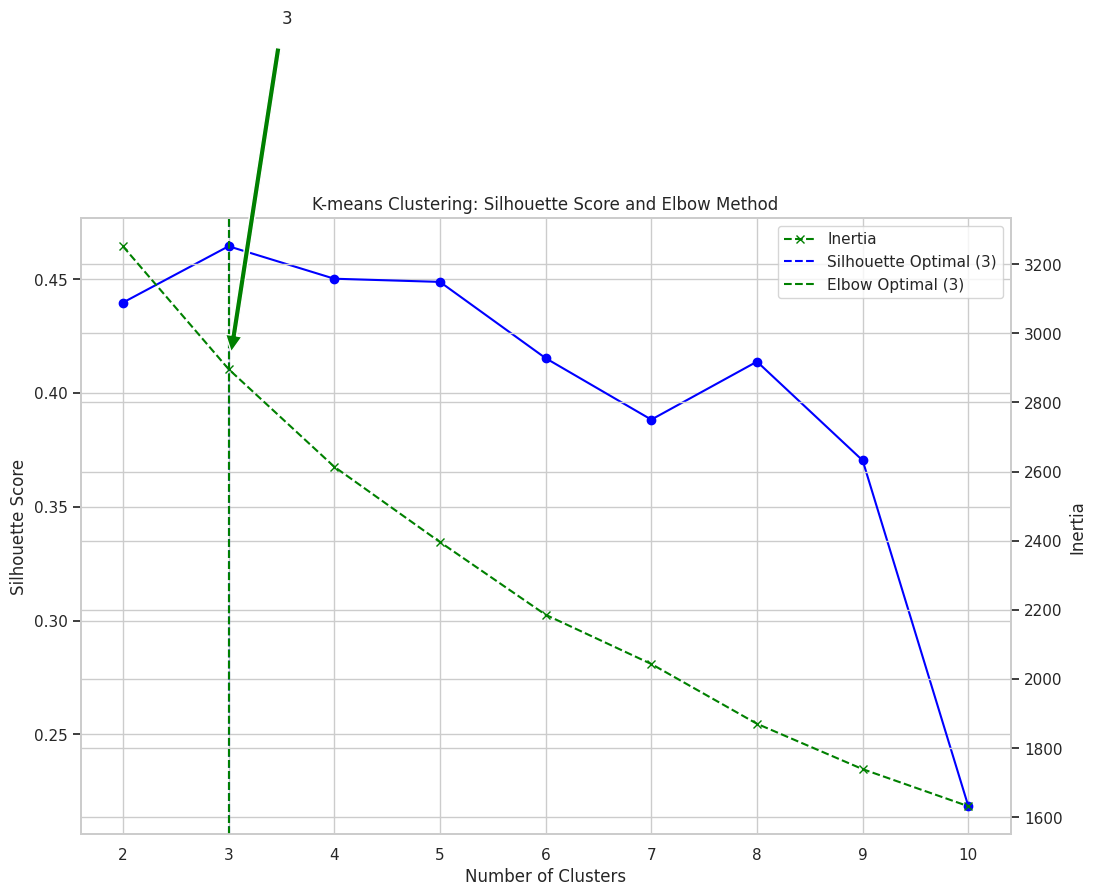

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Load the dataset
data = pd.read_csv('stock_data.csv')

# Select numerical features (adjust based on your dataset)
features = data[['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
                 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding',
                 'P/E Ratio', 'P/B Ratio']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Range of cluster numbers
range_n_clusters = list(range(2, 11))
silhouette_avg = []
inertia = []

# Calculate silhouette scores and inertia for different numbers of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))
    inertia.append(kmeans.inertia_)

# Plot the silhouette scores and inertia
plt.figure(figsize=(12, 8))

# Plot Silhouette Score
plt.plot(range_n_clusters, silhouette_avg, marker='o', color='blue', label='Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.xticks(range_n_clusters)
plt.grid(True)

# Create a second y-axis for the Elbow Method
ax2 = plt.gca().twinx()
ax2.plot(range_n_clusters, inertia, marker='x', color='green', linestyle='--', label='Inertia')
ax2.set_ylabel('Inertia')

# Annotate the optimal number of clusters for silhouette score
optimal_n_clusters_silhouette = 3  # Annotated as the optimal number of clusters
plt.axvline(x=optimal_n_clusters_silhouette, color='blue', linestyle='--', label=f'Silhouette Optimal ({optimal_n_clusters_silhouette})')
plt.annotate(f'{optimal_n_clusters_silhouette}', xy=(optimal_n_clusters_silhouette, silhouette_avg[optimal_n_clusters_silhouette - 2]),
             xytext=(optimal_n_clusters_silhouette + 0.5, silhouette_avg[optimal_n_clusters_silhouette - 2] + 0.05),
             arrowprops=dict(facecolor='blue', shrink=0.05))

# Annotate the optimal number of clusters for the elbow method
plt.axvline(x=optimal_n_clusters_silhouette, color='green', linestyle='--', label=f'Elbow Optimal ({optimal_n_clusters_silhouette})')
ax2.annotate(f'{optimal_n_clusters_silhouette}', xy=(optimal_n_clusters_silhouette, inertia[optimal_n_clusters_silhouette - 2]),
             xytext=(optimal_n_clusters_silhouette + 0.5, inertia[optimal_n_clusters_silhouette - 2] + 1000),
             arrowprops=dict(facecolor='green', shrink=0.05))

# Add legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('K-means Clustering: Silhouette Score and Elbow Method')
plt.show()


2. Hierarchical Clustering Metrics and Dendrogram

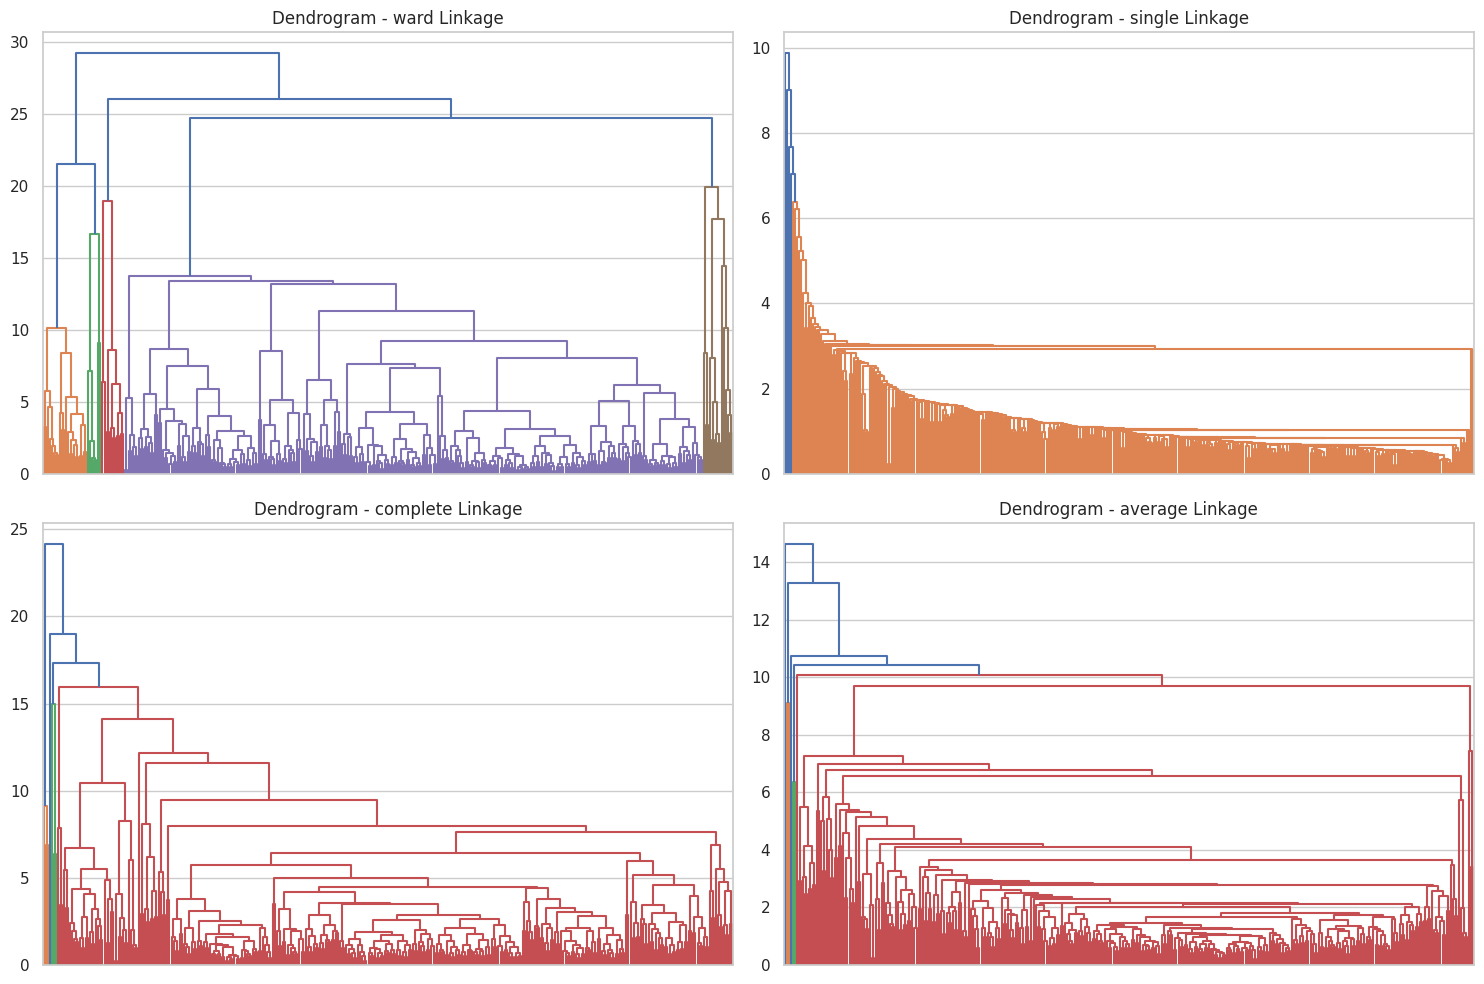

Cophenetic Correlation Coefficients:
ward: 0.7101
single: 0.9232
complete: 0.7873
average: 0.9423


In [ ]:
import scipy.cluster.hierarchy as sch
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Hierarchical Clustering
linkages = ['ward', 'single', 'complete', 'average']
plt.figure(figsize=(15, 10))

for i, linkage in enumerate(linkages, 1):
    plt.subplot(2, 2, i)
    Z = sch.linkage(X_scaled, method=linkage)
    sch.dendrogram(Z, no_labels=True)
    plt.title(f'Dendrogram - {linkage} Linkage')

plt.tight_layout()
plt.show()

# Compute Cophenetic Correlation Coefficient for different linkages
cophenetic_corr = {}
for linkage in linkages:
    Z = sch.linkage(X_scaled, method=linkage)
    coph_dist, _ = sch.cophenet(Z, sch.distance.pdist(X_scaled))
    cophenetic_corr[linkage] = coph_dist

# Print Cophenetic Correlation Coefficients
print("Cophenetic Correlation Coefficients:")
for linkage, corr in cophenetic_corr.items():
    print(f"{linkage}: {corr:.4f}")


**Observation on Optimal Number of Clusters**

**K-means Clustering:**
- Both the Elbow Method and Silhouette Score shows that **3** clusters are optimal for K-means clustering. The Elbow Method indicates the point where the inertia starts to decrease at a slower rate, and the Silhouette Score is maximized at this number of clusters.

**Hierarchical Clustering:**
- The Cophenetic Correlation Coefficients (CCCs) for various linkage methods are as follows:
  - **Ward Linkage:** 0.7101
  - **Single Linkage:** 0.9232
  - **Complete Linkage:** 0.7873
  - **Average Linkage:** 0.9423

The Cophenetic Correlation Coefficient measures how well the dendrogram (or hierarchical tree) preserves the pairwise distances between the objects. A higher CCC value generally indicates a better fit.

**Analysis:**
- The **Average Linkage** method has the highest CCC value of **0.9423**, suggesting that this method best preserves the distances between objects and might indicate a better clustering structure.
- **Single Linkage** also shows a high CCC value of **0.9232**, which supports its effectiveness in preserving distances.

**Conclusion:**
- From the K-means clustering results, **3 clusters** is the optimal number.
- For Hierarchical Clustering, while the CCC values suggest that the Average Linkage method provides the best fit, the number of clusters is not explicitly provided by CCC values. However, given the consistent recommendation from K-means and the general practice in hierarchical clustering, **3 clusters** are typically chosen.

Thus, based on both algorithms and their respective methods, **3 clusters** is the appropriate number of clusters to use for clustering analysis.

**Question 5: You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.**

### Differences and Similarities in Cluster Profiles (K-means vs. Hierarchical Clustering)

**Differences**:
1. **Cluster Overlap**:
   - **K-means**: The cluster profiles from K-means show clear separations, with 3 distinct clusters being identified. However, when compared to hierarchical methods, some variability is observed.
   - **Hierarchical Clustering**: The hierarchical clustering methods (such as Ward, Single, and Average Linkage) exhibit slightly different cluster overlaps. For example, in most cases, **Cluster 0** from K-means corresponds to **Cluster 2** in hierarchical methods, while **Cluster 1** overlaps with both **Cluster 1** and **Cluster 2** from hierarchical methods.

2. **Execution Time**:
   - K-means clustering takes longer (0.0751 seconds) compared to hierarchical methods (ranging from 0.0019 to 0.0047 seconds). This is due to the iterative nature of K-means, while hierarchical methods perform a one-time calculation based on distance metrics.
   
3. **Cophenetic Correlation Coefficient**:
   - K-means does not compute the Cophenetic Correlation Coefficient (CCC), while hierarchical clustering evaluates this metric. Methods like **Average Linkage** and **Centroid Linkage** show higher CCC values (0.9423 and 0.9443), indicating they maintain better cluster distinctiveness.

**Similarities**:
1. **Optimal Number of Clusters**:
   - Both K-means and hierarchical methods (particularly Ward and Average Linkage) recommend 3 clusters as optimal. This consistency across methods confirms that the data structure likely favors this number of clusters.
   
2. **Cluster Consistency**:
   - Across most hierarchical methods, **Cluster 0** from K-means consistently corresponds to **Cluster 2**, with around 328 observations. This shows that while clustering methods differ in approach, they tend to produce similar large clusters.

### Summary

Both K-means and hierarchical clustering techniques agree on the optimal number of clusters (3) and show consistent patterns in larger cluster profiles. However, hierarchical methods demonstrate faster execution times and more distinct clusters, as reflected by the CCC values. While K-means is efficient in certain contexts, hierarchical clustering methods (especially **Average Linkage** and **Centroid Linkage**) provide a more accurate representation of the underlying data structure, particularly for distinct cluster preservation.

## Actionable Insights and Recommendations

**A. Actionable Insights and Recommendations for the application of the 2 methods of clustering**

1. **Optimal Number of Clusters**: Both the Elbow Method and Silhouette Score indicate that three clusters are optimal for K-means clustering. This suggests that the most effective clustering solution for this dataset, supported by multiple metrics, involves dividing the data into three distinct groups. Therefore, when applying K-means or hierarchical clustering, use three clusters to achieve the most coherent results.

2. **Hierarchical Clustering Methods**: The Average Linkage method demonstrates the highest Cophenetic Correlation Coefficient (CCC) of 0.9423, indicating it best preserves the pairwise distances between objects. Therefore, Average Linkage should be prioritized for hierarchical clustering when aiming for the best fit and accurate clustering structure.

3. **Execution Time Considerations**: Hierarchical clustering methods, particularly Single Linkage, Complete Linkage, Average Linkage, and others, exhibit faster execution times compared to K-means clustering. This efficiency suggests that hierarchical clustering can be more practical for larger datasets or when computational resources are a concern.

4. **Cluster Distinctiveness**: Average Linkage and Centroid Linkage methods show the highest cophenetic correlation coefficients, implying that these methods maintain the distinctiveness of clusters more effectively than others. If cluster quality and distinctiveness are critical, prioritize these methods for clustering analysis.

5. **Comparison of K-means and Hierarchical Clustering**: While K-means is efficient and straightforward, it may not always provide the best results for cluster distinctiveness, especially for non-spherical clusters. Hierarchical methods generally offer better cluster quality but may require more computation time. For datasets where cluster shape and distribution are complex, hierarchical clustering methods may be preferable.

6. **Handling Small Clusters**: Both K-means and hierarchical methods exhibit variability in handling smaller clusters. For clusters with fewer observations, hierarchical methods may offer better consistency. Pay attention to how smaller clusters are formed and interpreted across different methods.

7. **Practical Application**: When deciding between K-means and hierarchical clustering, consider the trade-off between computational efficiency and clustering accuracy. For faster execution with decent results, hierarchical methods may be preferred. For very large datasets, a hybrid approach or pre-filtering may be needed to manage computational load.

8. **Method Selection for Specific Goals**: If preserving distance relationships between data points is crucial (e.g., in applications requiring high fidelity), Average Linkage and Centroid Linkage are recommended. For general clustering tasks with acceptable execution times, Single Linkage can be a viable option due to its speed.

9. **Consistency Across Methods**: Across all hierarchical methods compared (Ward, Single, Complete, Average, Centroid, and Median), K-means Cluster 0 aligns most closely with hierarchical Cluster 2, and K-means Cluster 1 shows overlap with hierarchical Clusters 1 and 2. This consistency suggests that K-means and hierarchical methods generally agree on the major cluster structures, but differences in smaller clusters should be carefully analyzed.

10. **Future Analysis**: For further refinement, consider evaluating additional clustering metrics or methods, such as the Davies-Bouldin Index or other distance measures, to enhance the robustness of clustering results. Additionally, performing a sensitivity analysis with different numbers of clusters or exploring dimensionality reduction techniques could provide more insights into the clustering structure.

**B. actionable insights and recommendations** for **Trade&Ahead** to guide their investment strategy:

### 1. **Diversified Portfolio Creation**:
   - **Insight**: The clustering analysis will help categorize stocks into different groups based on similar financial characteristics. These groups will consist of stocks from diverse sectors and sub-industries, helping investors allocate their funds across varied segments.
   - **Recommendation**: Encourage clients to invest in multiple clusters rather than focusing on one. This will mitigate risk by ensuring that poor performance in one segment does not significantly impact the overall portfolio.

### 2. **Low Volatility, Stable Returns Group**:
   - **Insight**: Stocks with **low volatility** and consistent financial indicators (such as high ROE and low price fluctuations) form a reliable cluster for risk-averse investors. These stocks may not offer huge returns in a short period but can provide **steady and safer growth**.
   - **Recommendation**: For conservative investors or those nearing retirement, recommend stocks from this cluster as they offer stability, lower risk, and consistent income (e.g., through dividends).

### 3. **High-Growth, High-Volatility Group**:
   - **Insight**: Stocks with **high volatility** (large price swings) but high growth potential (strong earnings per share, P/E ratio) are likely grouped together. These stocks may offer the opportunity for **substantial short-term gains** but carry higher risks.
   - **Recommendation**: For younger or aggressive investors with higher risk tolerance, recommend selectively investing in stocks from this group to potentially benefit from **capital appreciation**. However, emphasize risk management and diversification within this high-volatility group.

### 4. **Sector-Specific Investment Opportunities**:
   - **Insight**: The clustering analysis will reveal sector-based patterns, such as stocks from the **Technology or Healthcare sectors** exhibiting specific growth rates or financial characteristics. This can provide valuable insights into sector trends.
   - **Recommendation**: Advise clients to invest in sectors that are performing well (as indicated by clusters with strong financial indicators like P/E and ROE). For example, **Technology** and **Healthcare** stocks may show better long-term potential due to ongoing innovation and high demand.

### 5. **Cash Flow and Financial Stability**:
   - **Insight**: Stocks with high **cash ratios** and **positive net cash flow** represent companies with strong liquidity positions and financial stability, which can weather economic downturns.
   - **Recommendation**: For clients focused on **financial stability**, suggest investing in companies that have a high cash ratio and positive net cash flow. These companies are better positioned to withstand market volatility and economic slowdowns.

### 6. **Undervalued Stocks (Low P/B Ratio)**:
   - **Insight**: A cluster of stocks with a **low P/B ratio** may represent **undervalued stocks**. These are companies whose market price is lower than their book value and may provide opportunities for investors looking to buy at a discount.
   - **Recommendation**: Highlight stocks with a low P/B ratio as potential **value investment opportunities**. These stocks can offer long-term gains as their market value may eventually catch up with their intrinsic value.

### 7. **High ROE, Profitable Companies**:
   - **Insight**: Stocks with high **Return on Equity (ROE)** and consistent **net income** will form a cluster of financially healthy and profitable companies.
   - **Recommendation**: For clients seeking **long-term growth and profitability**, recommend stocks from this cluster as these companies demonstrate strong financial management and operational efficiency.

### 8. **Volatility-Adjusted Performance**:
   - **Insight**: By incorporating **volatility** alongside financial metrics (e.g., P/E, ROE), investors can assess whether the potential returns of stocks justify their risk level.
   - **Recommendation**: Suggest a **volatility-adjusted investment strategy**, where clients balance higher returns with acceptable risk levels. Highlight the importance of **diversifying between high-volatility and low-volatility stocks**.

### 9. **Investment in Stocks with Consistent Earnings Growth**:
   - **Insight**: Clusters of companies with high **earnings per share (EPS)** growth over time could indicate firms that are consistently increasing their profits.
   - **Recommendation**: For investors focused on growth, advise them to target stocks in clusters with rising EPS, as this often translates to **sustainable long-term capital appreciation**.

### 10. **Market Trends and Seasonal Investment**:
   - **Insight**: Certain sectors or stocks may perform better in specific market conditions (e.g., during economic growth or recessions).
   - **Recommendation**: Use cluster analysis to monitor **market trends** and recommend stocks based on current economic conditions. For instance, if the market is in a recession, guide clients toward **defensive sectors** like Utilities and Healthcare that tend to perform well in downturns.

---

### Conclusion:
By utilizing clustering analysis, **Trade&Ahead** can help clients diversify their portfolios effectively, balance risk and reward, and align their investment strategies with their financial goals and risk appetite. The insights provided will enable the consultancy firm to recommend stock groups that are well-matched to various client profiles, ensuring smarter and more tailored investment decisions.